In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
pip install pmdarima

In [161]:
import pandas as pd
import numpy as np
from numpy import split
from numpy import array
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn  as sns
import datetime
import time
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
import datetime as dt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import statsmodels.tsa.arima.model as ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import statsmodels.tsa.api as smts
import statsmodels.tsa.stattools as smtst
from statsmodels.stats.diagnostic import acorr_ljungbox
import tqdm
from itertools import product
from pmdarima.arima.utils import ndiffs
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn import metrics
plt.style.use(style = 'seaborn')
%matplotlib inline

<ipython-input-161-1328521656c6>:51: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


**DATA EXPLORATION AND VISUALISATION**

In [36]:
temp = pd.read_csv('/content/drive/MyDrive/DS Project/Data/temperature_nsw.csv')

In [37]:
temp.shape

(247646, 3)

In [38]:
temp.describe()

LOCATION    TEMPERATURE
count  247646.0  247646.000000
mean    94766.0      16.518476
std         0.0      87.923650
min     94766.0   -9999.000000
25%     94766.0      13.300000
50%     94766.0      17.600000
75%     94766.0      21.200000
max     94766.0      44.700000

In [39]:
temp.head()

DATETIME  LOCATION  TEMPERATURE
0  2010-01-01 00:00:00   94766.0         23.1
1  2010-01-01 00:01:00   94766.0         23.1
2  2010-01-01 00:30:00   94766.0         22.9
3  2010-01-01 00:50:00   94766.0         22.7
4  2010-01-01 01:00:00   94766.0         22.6

In [40]:
temp[temp.isna().any(axis=1)]

Empty DataFrame
Columns: [DATETIME, LOCATION, TEMPERATURE]
Index: []

In [41]:
temp1 = temp.loc[temp['TEMPERATURE']!=-9999.0]

In [42]:
temp1.shape

(247627, 3)

In [43]:
temp1['DATETIME'] = pd.to_datetime(temp1['DATETIME'])

<ipython-input-43-3f77958529ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['DATETIME'] = pd.to_datetime(temp1['DATETIME'])


In [44]:
temp1['Date'] = pd.to_datetime(temp1['DATETIME'],format='%Y-%m-%d').dt.date
temp1['Time'] = pd.to_datetime(temp1['DATETIME'],format ='%H:%M:%S').dt.time
temp1['Date'] = pd.to_datetime(temp1['Date'],format='%Y-%m-%d')
temp1['Time'] = pd.to_datetime(temp1['Time'],format ='%H:%M:%S')

<ipython-input-44-de800551b7f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Date'] = pd.to_datetime(temp1['DATETIME'],format='%Y-%m-%d').dt.date
<ipython-input-44-de800551b7f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Time'] = pd.to_datetime(temp1['DATETIME'],format ='%H:%M:%S').dt.time
<ipython-input-44-de800551b7f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

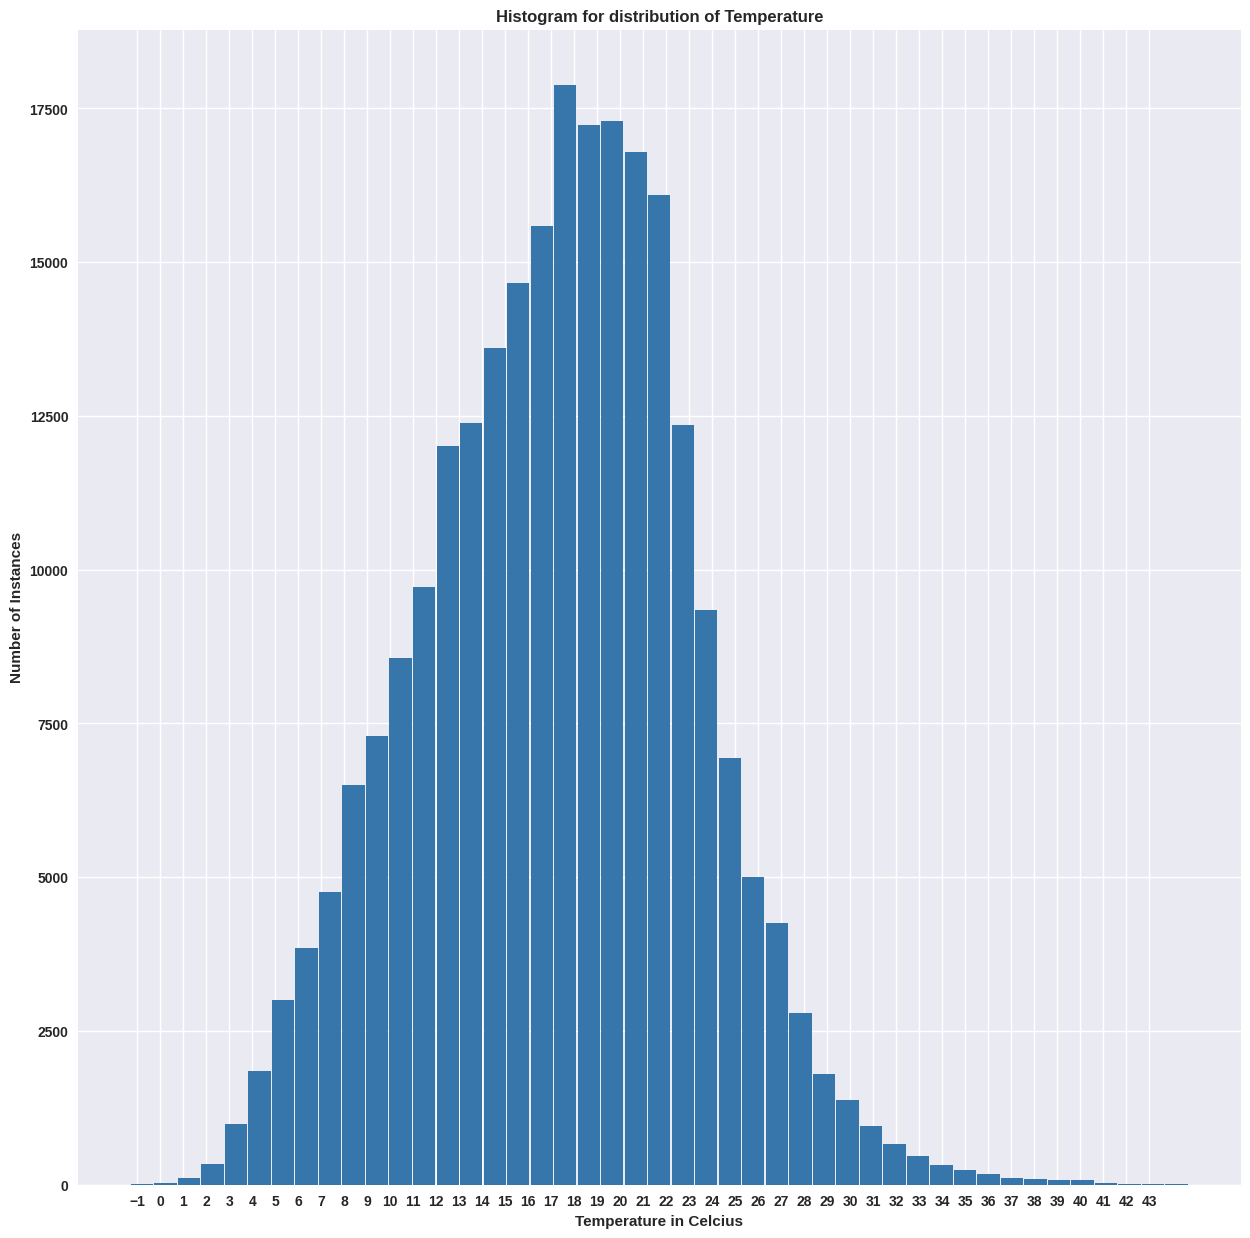

In [45]:
plt.figure(figsize=(15,15))
plt.hist(temp1['TEMPERATURE'], bins = len(np.arange(int(temp1['TEMPERATURE'].min()), int(temp1['TEMPERATURE'].max()), step=1)), rwidth = 0.95,color = '#3776ab')
plt.xlabel('Temperature in Celcius',fontweight='bold')
plt.xticks(np.arange(int(temp1['TEMPERATURE'].min()), int(temp1['TEMPERATURE'].max()), step=1),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Histogram for distribution of Temperature',fontweight='bold')
plt.ylabel('Number of Instances',fontweight='bold')
plt.show()

In [46]:
temp = temp1

In [47]:
mask = (temp['Date'] > '2016-12-31') & (temp['Date'] < '2018-01-01')
df17 = temp.loc[mask]
df17['Date'] = pd.to_datetime(df17['Date'],format='%Y-%m-%d')
mask = (temp['Date'] > '2017-12-31') & (temp['Date'] < '2019-01-01')
df18 = temp.loc[mask]
df18['Date'] = pd.to_datetime(df18['Date'],format='%Y-%m-%d')
mask = (temp['Date'] > '2018-12-31') & (temp['Date'] < '2020-01-01')
df19 = temp.loc[mask]
df19['Date'] = pd.to_datetime(df19['Date'],format='%Y-%m-%d')
mask = (temp['Date'] > '2019-12-31') & (temp['Date'] < '2021-01-01')
df20 = temp.loc[mask]
df20['Date'] = pd.to_datetime(df20['Date'],format='%Y-%m-%d')
mask = (temp['Date'] > '2020-12-31') & (temp['Date'] < '2022-01-01')
df21 = temp.loc[mask]
df21['Date'] = pd.to_datetime(df21['Date'],format='%Y-%m-%d')
mask = (temp['Date'] > '2021-12-31') & (temp['Date'] < '2023-01-01')
df22 = temp.loc[mask]

<ipython-input-47-abef36c39fa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17['Date'] = pd.to_datetime(df17['Date'],format='%Y-%m-%d')
<ipython-input-47-abef36c39fa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['Date'] = pd.to_datetime(df18['Date'],format='%Y-%m-%d')
<ipython-input-47-abef36c39fa3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

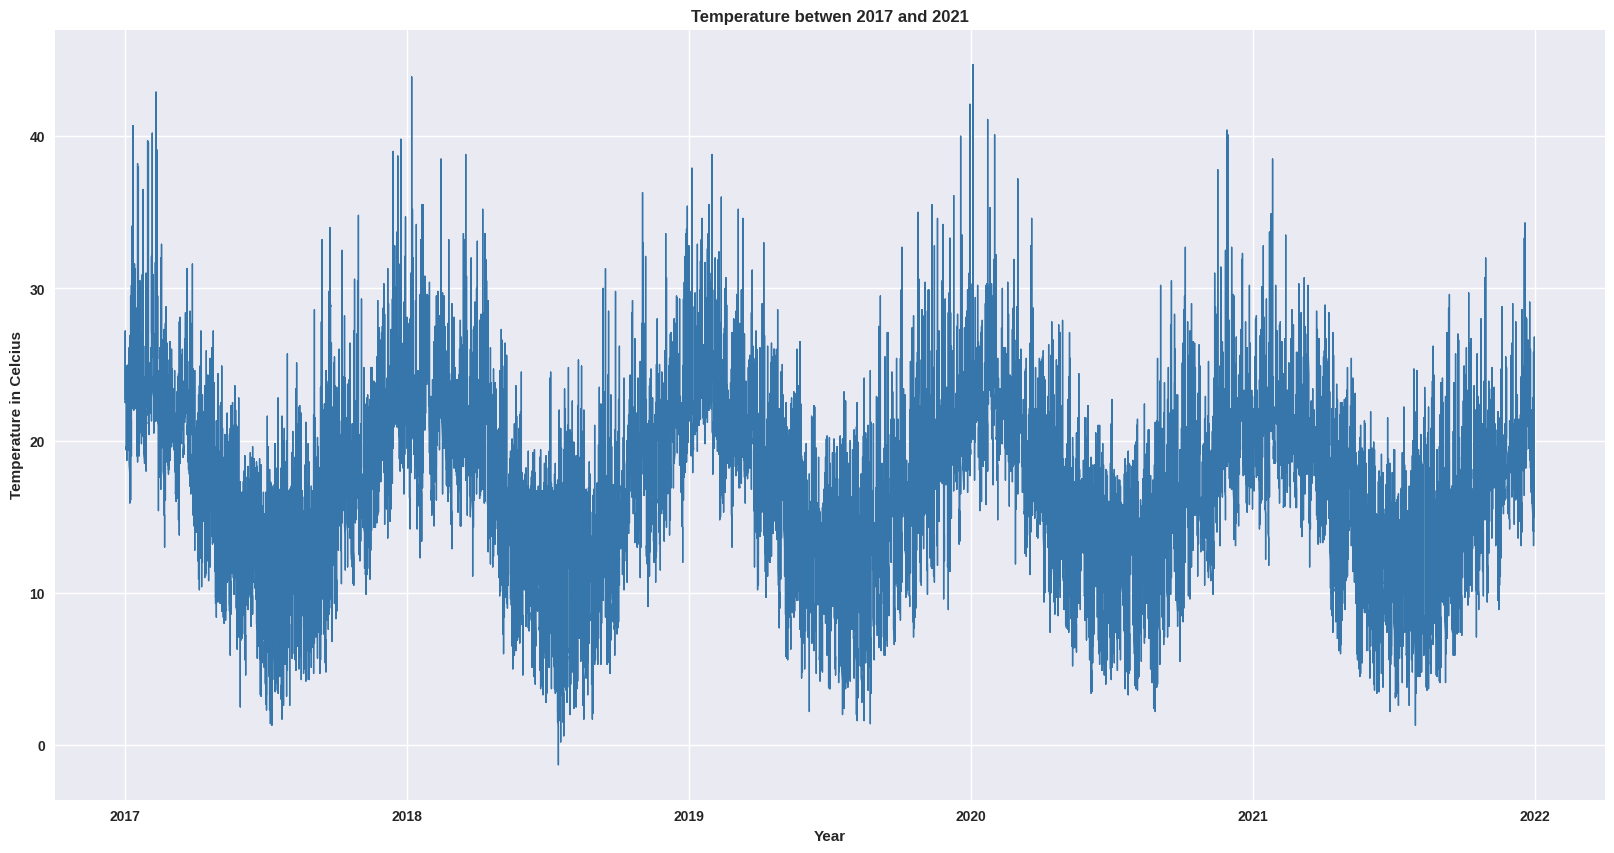

In [48]:
plt.figure(figsize=(20,10))
plt.plot('Date', 'TEMPERATURE',color ='#3776ab',linewidth = 1,data = df17)
plt.plot('Date', 'TEMPERATURE',color ='#3776ab',linewidth = 1,data = df18)
plt.plot('Date', 'TEMPERATURE',color ='#3776ab',linewidth = 1,data = df19)
plt.plot('Date', 'TEMPERATURE',color ='#3776ab',linewidth = 1,data = df20)
plt.plot('Date', 'TEMPERATURE',color ='#3776ab',linewidth = 1,data = df21)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Temperature in Celcius',fontweight='bold')
plt.title('Temperature betwen 2017 and 2021',fontweight='bold')
plt.show()

In [49]:
#temp1.to_csv('/content/drive/MyDrive/DS Project/Data/temp.csv')

In [50]:
dem = pd.read_csv('/content/drive/MyDrive/DS Project/Data/totaldemand_nsw.csv')
dem

DATETIME REGIONID  TOTALDEMAND
0        2010-01-01 00:00:00     NSW1      7997.41
1        2010-01-01 00:05:00     NSW1      7946.51
2        2010-01-01 00:10:00     NSW1      7921.55
3        2010-01-01 00:15:00     NSW1      7837.84
4        2010-01-01 00:20:00     NSW1      7781.11
...                      ...      ...          ...
1323393  2022-07-31 23:40:00     NSW1      8180.34
1323394  2022-07-31 23:45:00     NSW1      8237.50
1323395  2022-07-31 23:50:00     NSW1      8109.83
1323396  2022-07-31 23:55:00     NSW1      8044.52
1323397  2022-08-01 00:00:00     NSW1      8027.28

[1323398 rows x 3 columns]

In [51]:
dem.shape

(1323398, 3)

In [52]:
dem.describe()

TOTALDEMAND
count  1.323398e+06
mean   8.067966e+03
std    1.308206e+03
min    4.286190e+03
25%    7.097480e+03
50%    7.996510e+03
75%    8.914310e+03
max    1.464883e+04

In [53]:
dem['DATETIME'] = pd.to_datetime(dem['DATETIME'])
dem['Date'] = pd.to_datetime(dem['DATETIME'],format='%y-%m-%d').dt.date
dem['Date'] = pd.to_datetime(dem['Date'],format='%Y-%m-%d')

In [54]:
dem.dtypes

DATETIME       datetime64[ns]
REGIONID               object
TOTALDEMAND           float64
Date           datetime64[ns]
dtype: object

In [55]:
dem[dem.isna().any(axis=1)]

Empty DataFrame
Columns: [DATETIME, REGIONID, TOTALDEMAND, Date]
Index: []

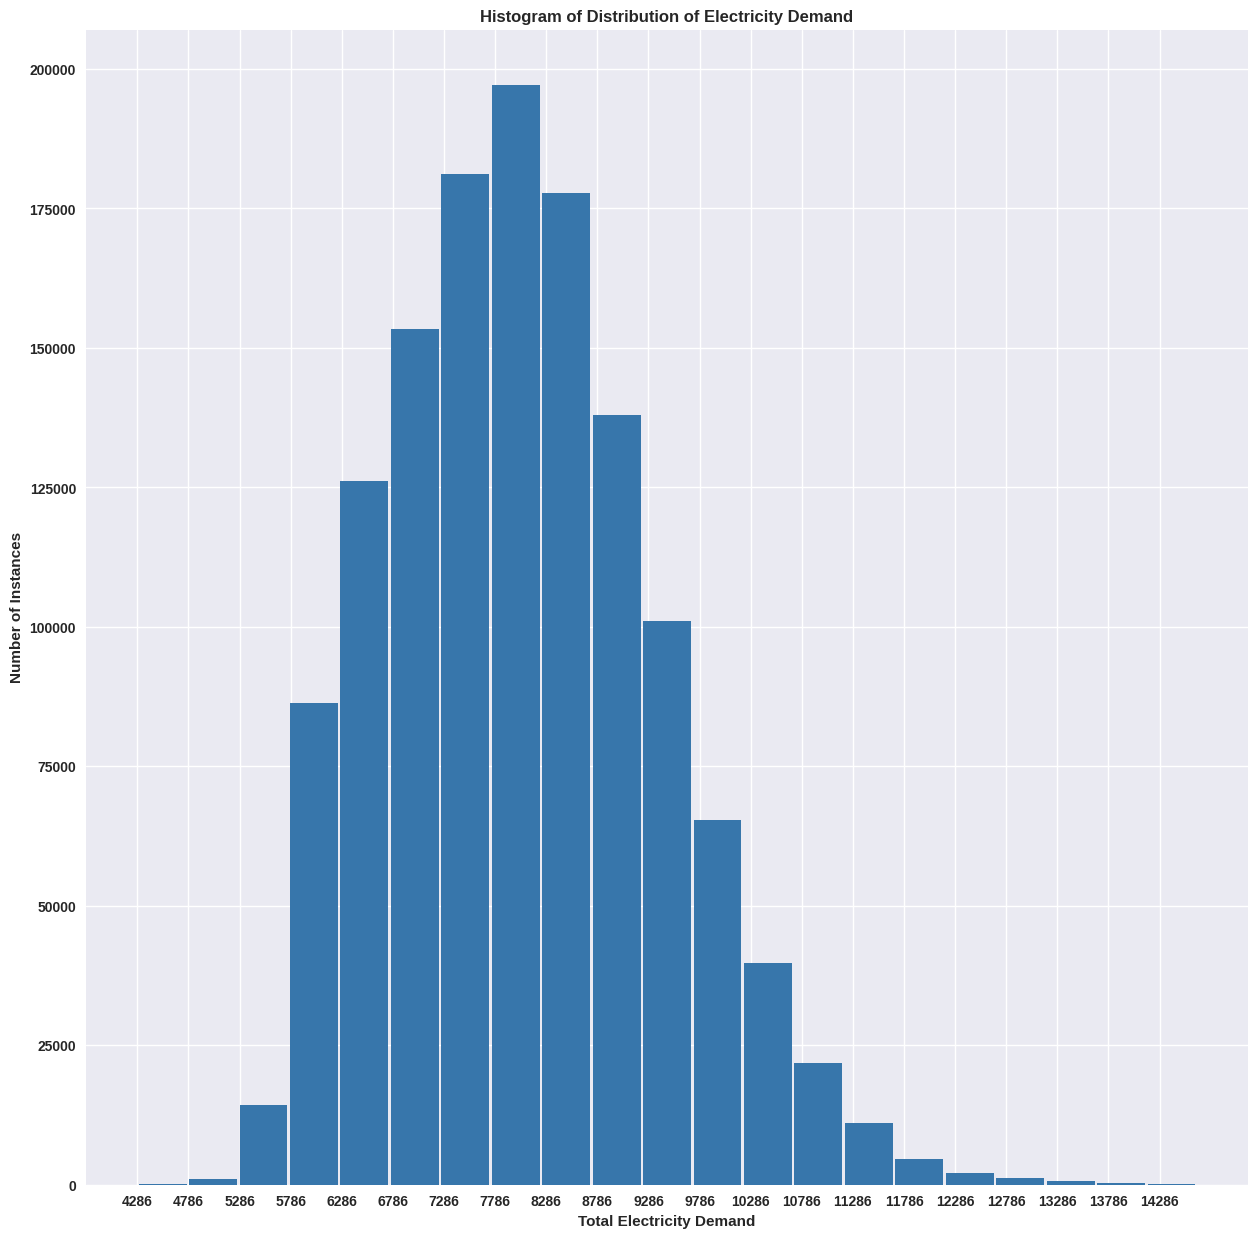

In [56]:
plt.figure(figsize=(15,15))
plt.hist(dem['TOTALDEMAND'], bins = len(np.arange(int(dem['TOTALDEMAND'].min()), int(dem['TOTALDEMAND'].max()), step=500)), rwidth = 0.95,color = '#3776ab')
plt.xticks(np.arange(int(dem['TOTALDEMAND'].min()), int(dem['TOTALDEMAND'].max()), step=500),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Histogram of Distribution of Electricity Demand',fontweight='bold')
plt.xlabel('Total Electricity Demand',fontweight='bold')
plt.ylabel('Number of Instances',fontweight='bold')
plt.show()

In [57]:
mask = (dem['Date'] > '2016-12-31') & (dem['Date'] < '2018-01-01')
df17 = dem.loc[mask]
df17['Date'] = pd.to_datetime(df17['Date'],format='%Y-%m-%d')
mask = (dem['Date'] > '2017-12-31') & (dem['Date'] < '2019-01-01')
df18 = dem.loc[mask]
df18['Date'] = pd.to_datetime(df18['Date'],format='%Y-%m-%d')
mask = (dem['Date'] > '2018-12-31') & (dem['Date'] < '2020-01-01')
df19 = dem.loc[mask]
df19['Date'] = pd.to_datetime(df19['Date'],format='%Y-%m-%d')
mask = (dem['Date'] > '2019-12-31') & (dem['Date'] < '2021-01-01')
df20 = dem.loc[mask]
df20['Date'] = pd.to_datetime(df20['Date'],format='%Y-%m-%d')
mask = (dem['Date'] > '2020-12-31') & (dem['Date'] < '2022-01-01')
df21 = dem.loc[mask]
df21['Date'] = pd.to_datetime(df21['Date'],format='%Y-%m-%d')
mask = (dem['Date'] > '2021-12-31') & (dem['Date'] < '2023-01-01')
df22 = dem.loc[mask]

<ipython-input-57-c18d1a804efc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17['Date'] = pd.to_datetime(df17['Date'],format='%Y-%m-%d')
<ipython-input-57-c18d1a804efc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['Date'] = pd.to_datetime(df18['Date'],format='%Y-%m-%d')
<ipython-input-57-c18d1a804efc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

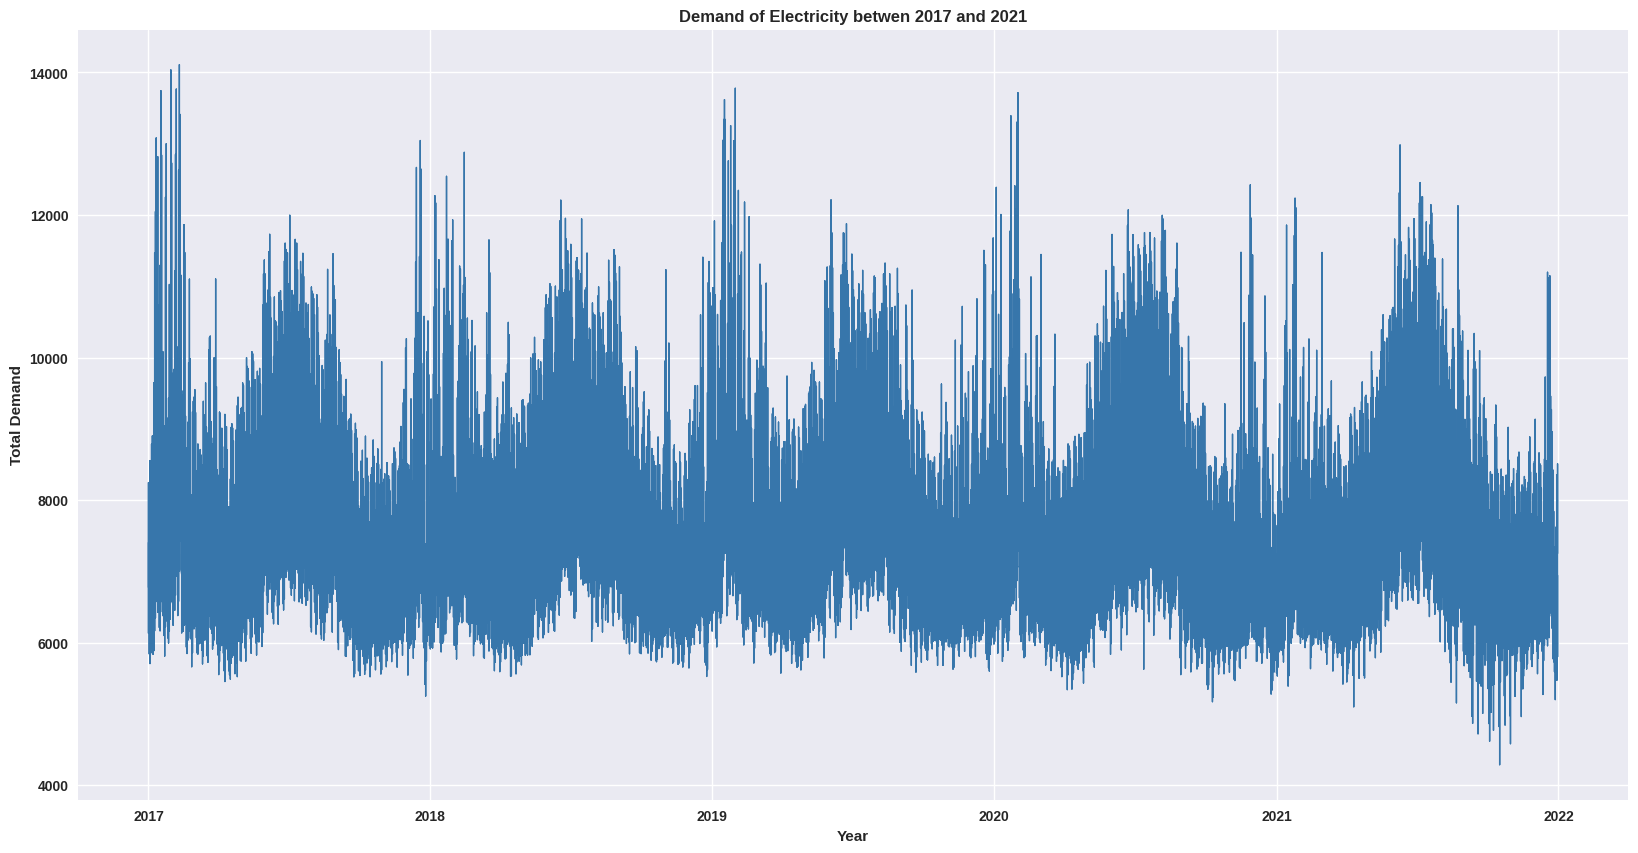

In [58]:
plt.figure(figsize=(20,10))
plt.plot('Date', 'TOTALDEMAND',color ='#3776ab',linewidth = 1,data = df17)
plt.plot('Date', 'TOTALDEMAND',color ='#3776ab',linewidth = 1,data = df18)
plt.plot('Date', 'TOTALDEMAND',color ='#3776ab',linewidth = 1,data = df19)
plt.plot('Date', 'TOTALDEMAND',color ='#3776ab',linewidth = 1,data = df20)
plt.plot('Date', 'TOTALDEMAND',color ='#3776ab',linewidth = 1,data = df21)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Total Demand',fontweight='bold')
plt.title('Demand of Electricity betwen 2017 and 2021',fontweight='bold')
plt.show()

In [59]:
fo = pd.read_csv('/content/drive/MyDrive/DS Project/Data/forecastdemand_nsw.csv')
fo

DATETIME REGIONID  FORECASTDEMAND  PREDISPATCHSEQNO  \
0         2010-01-01 00:00:00     NSW1         7832.04        2009123018   
1         2010-01-01 00:00:00     NSW1         7832.04        2009123019   
2         2010-01-01 00:00:00     NSW1         7832.03        2009123020   
3         2010-01-01 00:00:00     NSW1         7832.03        2009123021   
4         2010-01-01 00:00:00     NSW1         7830.96        2009123022   
...                       ...      ...             ...               ...   
11619498  2022-08-01 00:00:00     NSW1         8227.36        2022073136   
11619499  2022-08-01 00:00:00     NSW1         8175.04        2022073137   
11619500  2022-08-01 00:00:00     NSW1         8145.10        2022073138   
11619501  2022-08-01 00:00:00     NSW1         8136.92        2022073139   
11619502  2022-08-01 00:00:00     NSW1         8157.87        2022073140   

          PERIODID          LASTCHANGED  
0               71  2009-12-30 12:31:49  
1               70  2009-12-30 13:01:43  
2               69  2009-12-30 13:31:36  
3               68  2009-12-30 14:01:44  
4               67  2009-12-30 14:31:35  
...            ...                  ...  
11619498         5  2022-07-31 21:32:14  
11619499         4  2022-07-31 22:01:54  
11619500         3  2022-07-31 22:32:00  
11619501         2  2022-07-31 23:01:49  
11619502         1  2022-07-31 23:31:52  

[11619503 rows x 6 columns]

In [60]:
fo.shape

(11619503, 6)

In [61]:
fo.describe()

FORECASTDEMAND  PREDISPATCHSEQNO      PERIODID
count    1.161950e+07      1.161950e+07  1.161950e+07
mean     8.044976e+03      2.015718e+09  2.999162e+01
std      1.326532e+03      3.667742e+06  1.870715e+01
min      4.317310e+03      2.009123e+09  1.000000e+00
25%      7.049500e+03      2.012123e+09  1.400000e+01
50%      7.978180e+03      2.015122e+09  2.800000e+01
75%      8.908280e+03      2.019051e+09  4.400000e+01
max      1.473666e+04      2.022073e+09  7.900000e+01

In [62]:
fo['DATETIME'] = pd.to_datetime(fo['DATETIME'])
fo['LASTCHANGED'] = pd.to_datetime(fo['LASTCHANGED'])

In [63]:
fo.dtypes

DATETIME            datetime64[ns]
REGIONID                    object
FORECASTDEMAND             float64
PREDISPATCHSEQNO             int64
PERIODID                     int64
LASTCHANGED         datetime64[ns]
dtype: object

In [64]:
fo[fo.isna().any(axis=1)]

Empty DataFrame
Columns: [DATETIME, REGIONID, FORECASTDEMAND, PREDISPATCHSEQNO, PERIODID, LASTCHANGED]
Index: []

In [65]:
f = pd.merge(temp,dem, on='DATETIME')
df = pd.merge(f,fo, on='DATETIME')
df

DATETIME  LOCATION  TEMPERATURE     Date_x       Time REGIONID_x  \
0        2010-01-01   94766.0         23.1 2010-01-01 1900-01-01       NSW1   
1        2010-01-01   94766.0         23.1 2010-01-01 1900-01-01       NSW1   
2        2010-01-01   94766.0         23.1 2010-01-01 1900-01-01       NSW1   
3        2010-01-01   94766.0         23.1 2010-01-01 1900-01-01       NSW1   
4        2010-01-01   94766.0         23.1 2010-01-01 1900-01-01       NSW1   
...             ...       ...          ...        ...        ...        ...   
11584028 2022-08-01   94766.0         12.1 2022-08-01 1900-01-01       NSW1   
11584029 2022-08-01   94766.0         12.1 2022-08-01 1900-01-01       NSW1   
11584030 2022-08-01   94766.0         12.1 2022-08-01 1900-01-01       NSW1   
11584031 2022-08-01   94766.0         12.1 2022-08-01 1900-01-01       NSW1   
11584032 2022-08-01   94766.0         12.1 2022-08-01 1900-01-01       NSW1   

          TOTALDEMAND     Date_y REGIONID_y  FORECASTDEMAND  PREDISPATCHSEQNO  \
0             7997.41 2010-01-01       NSW1         7832.04        2009123018   
1             7997.41 2010-01-01       NSW1         7832.04        2009123019   
2             7997.41 2010-01-01       NSW1         7832.03        2009123020   
3             7997.41 2010-01-01       NSW1         7832.03        2009123021   
4             7997.41 2010-01-01       NSW1         7830.96        2009123022   
...               ...        ...        ...             ...               ...   
11584028      8027.28 2022-08-01       NSW1         8227.36        2022073136   
11584029      8027.28 2022-08-01       NSW1         8175.04        2022073137   
11584030      8027.28 2022-08-01       NSW1         8145.10        2022073138   
11584031      8027.28 2022-08-01       NSW1         8136.92        2022073139   
11584032      8027.28 2022-08-01       NSW1         8157.87        2022073140   

          PERIODID         LASTCHANGED  
0               71 2009-12-30 12:31:49  
1               70 2009-12-30 13:01:43  
2               69 2009-12-30 13:31:36  
3               68 2009-12-30 14:01:44  
4               67 2009-12-30 14:31:35  
...            ...                 ...  
11584028         5 2022-07-31 21:32:14  
11584029         4 2022-07-31 22:01:54  
11584030         3 2022-07-31 22:32:00  
11584031         2 2022-07-31 23:01:49  
11584032         1 2022-07-31 23:31:52  

[11584033 rows x 13 columns]

In [66]:
df['Date'] = pd.to_datetime(df['DATETIME'],format='%y-%m-%d').dt.date
df['Time'] = pd.to_datetime(df['DATETIME'],format ='%H:%M:%S').dt.time
df['Diff'] = df["FORECASTDEMAND"]- df['TOTALDEMAND']
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'],format ='%H:%M:%S')

In [67]:
ndf=df.groupby(['Date','Time'])[['TEMPERATURE','FORECASTDEMAND','TOTALDEMAND','Diff']].mean().reset_index()
ndf['Day of Week'] = ndf['Date'].dt.day_name()
ndf['Month'] = ndf['Date'].dt.strftime('%b')
ndf

Date                Time  TEMPERATURE  FORECASTDEMAND  \
0      2010-01-01 1900-01-01 00:00:00         23.1     7825.092754   
1      2010-01-01 1900-01-01 00:30:00         22.9     7682.062714   
2      2010-01-01 1900-01-01 01:00:00         22.6     7431.655915   
3      2010-01-01 1900-01-01 01:30:00         22.5     7086.970417   
4      2010-01-01 1900-01-01 02:00:00         22.5     6753.418630   
...           ...                 ...          ...             ...   
216132 2022-07-31 1900-01-01 22:00:00         14.0     9282.487761   
216133 2022-07-31 1900-01-01 22:30:00         13.2     8999.193676   
216134 2022-07-31 1900-01-01 23:00:00         13.3     8719.393043   
216135 2022-07-31 1900-01-01 23:30:00         12.7     8470.453000   
216136 2022-08-01 1900-01-01 00:00:00         12.1     8231.479437   

        TOTALDEMAND        Diff Day of Week Month  
0           7997.41 -172.317246      Friday   Jan  
1           7683.34   -1.277286      Friday   Jan  
2           7270.08  161.575915      Friday   Jan  
3           6961.98  124.990417      Friday   Jan  
4           6675.59   77.828630      Friday   Jan  
...             ...         ...         ...   ...  
216132      9009.20  273.287761      Sunday   Jul  
216133      8700.90  298.293676      Sunday   Jul  
216134      8378.96  340.433043      Sunday   Jul  
216135      8289.80  180.653000      Sunday   Jul  
216136      8027.28  204.199437      Monday   Aug  

[216137 rows x 8 columns]

In [68]:
ndf.dtypes

Date              datetime64[ns]
Time              datetime64[ns]
TEMPERATURE              float64
FORECASTDEMAND           float64
TOTALDEMAND              float64
Diff                     float64
Day of Week               object
Month                     object
dtype: object

In [69]:
#ndf.to_csv('/content/drive/MyDrive/DS Project/Data/final.csv')
df = pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/final.csv')
df

Unnamed: 0        Date                 Time  TEMPERATURE  \
0                0  2010-01-01  1900-01-01 00:00:00         23.1   
1                1  2010-01-01  1900-01-01 00:30:00         22.9   
2                2  2010-01-01  1900-01-01 01:00:00         22.6   
3                3  2010-01-01  1900-01-01 01:30:00         22.5   
4                4  2010-01-01  1900-01-01 02:00:00         22.5   
...            ...         ...                  ...          ...   
216132      216132  2022-07-31  1900-01-01 22:00:00         14.0   
216133      216133  2022-07-31  1900-01-01 22:30:00         13.2   
216134      216134  2022-07-31  1900-01-01 23:00:00         13.3   
216135      216135  2022-07-31  1900-01-01 23:30:00         12.7   
216136      216136  2022-08-01  1900-01-01 00:00:00         12.1   

        FORECASTDEMAND  TOTALDEMAND        Diff Day of Week Month  
0          7825.092754      7997.41 -172.317246      Friday   Jan  
1          7682.062714      7683.34   -1.277286      Friday   Jan  
2          7431.655915      7270.08  161.575915      Friday   Jan  
3          7086.970417      6961.98  124.990417      Friday   Jan  
4          6753.418630      6675.59   77.828630      Friday   Jan  
...                ...          ...         ...         ...   ...  
216132     9282.487761      9009.20  273.287761      Sunday   Jul  
216133     8999.193676      8700.90  298.293676      Sunday   Jul  
216134     8719.393043      8378.96  340.433043      Sunday   Jul  
216135     8470.453000      8289.80  180.653000      Sunday   Jul  
216136     8231.479437      8027.28  204.199437      Monday   Aug  

[216137 rows x 9 columns]

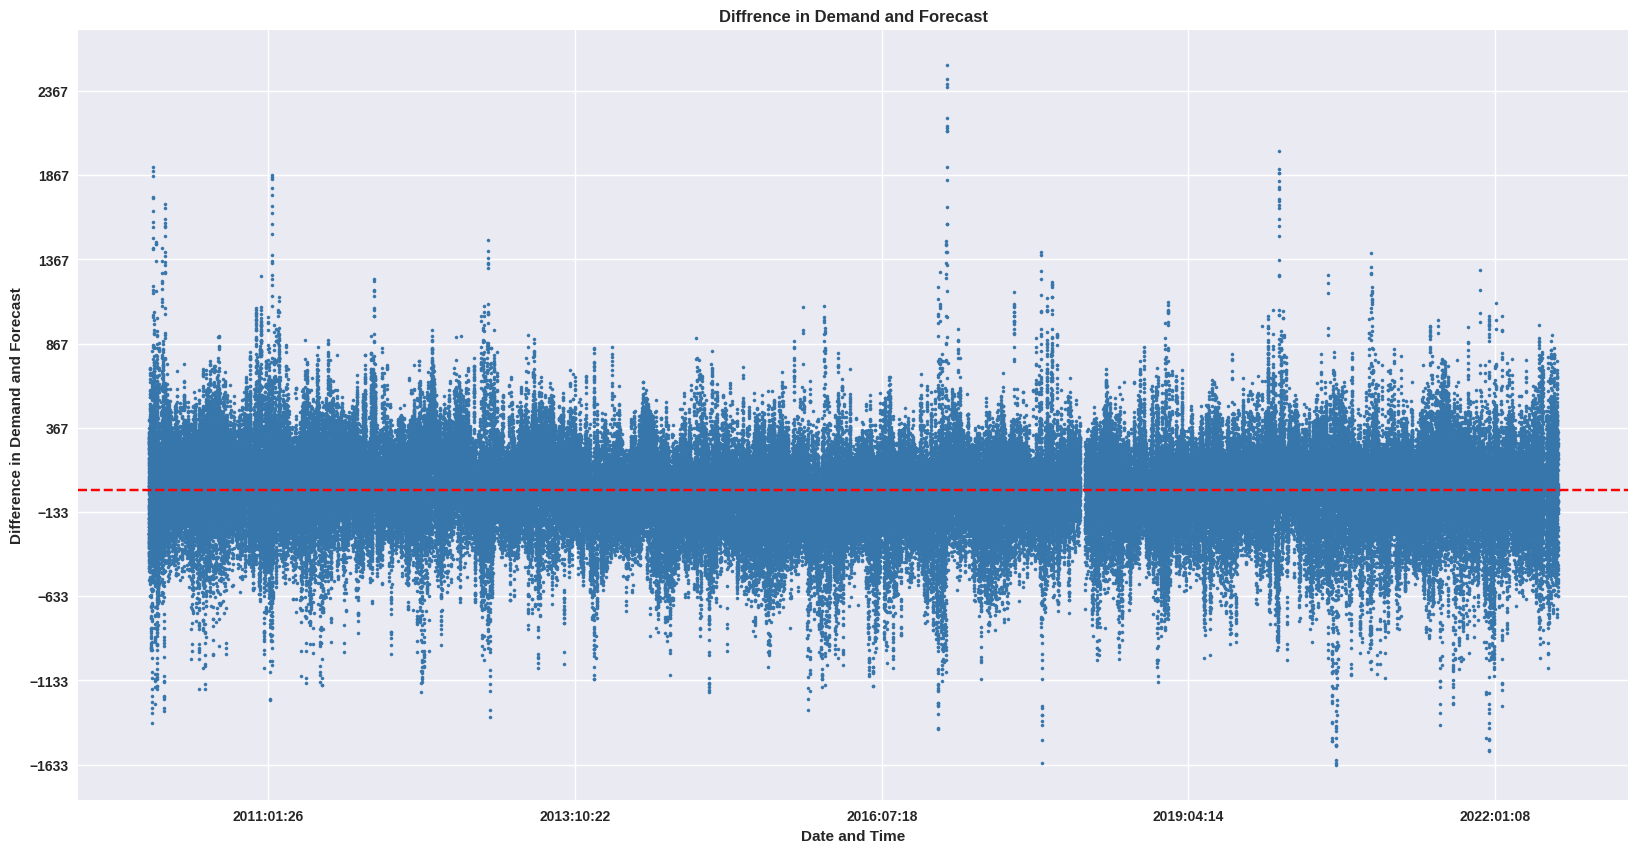

In [70]:
x = matplotlib.dates.date2num(df['Date'])
formatter = matplotlib.dates.DateFormatter('%Y:%m:%d')
figure = plt.figure(figsize=(20,10))
axes = figure.add_subplot(1, 1, 1)
plt.axhline(y = 0, color = 'r',linestyle = 'dashed')
axes.xaxis.set_major_formatter(formatter)
plt.title('Diffrence in Demand and Forecast',fontweight='bold')
plt.yticks(np.arange(int(df['Diff'].min()), int(df['Diff'].max()), step=500),fontweight='bold')
plt.xticks(fontweight='bold')
plt.xlabel('Date and Time',fontweight='bold')
plt.ylabel('Difference in Demand and Forecast',fontweight='bold')
plt.setp(axes.get_xticklabels(), rotation = 0)
axes.scatter(x, df['Diff'], s= 5, alpha = 1,color = '#3776ab')
plt.show()

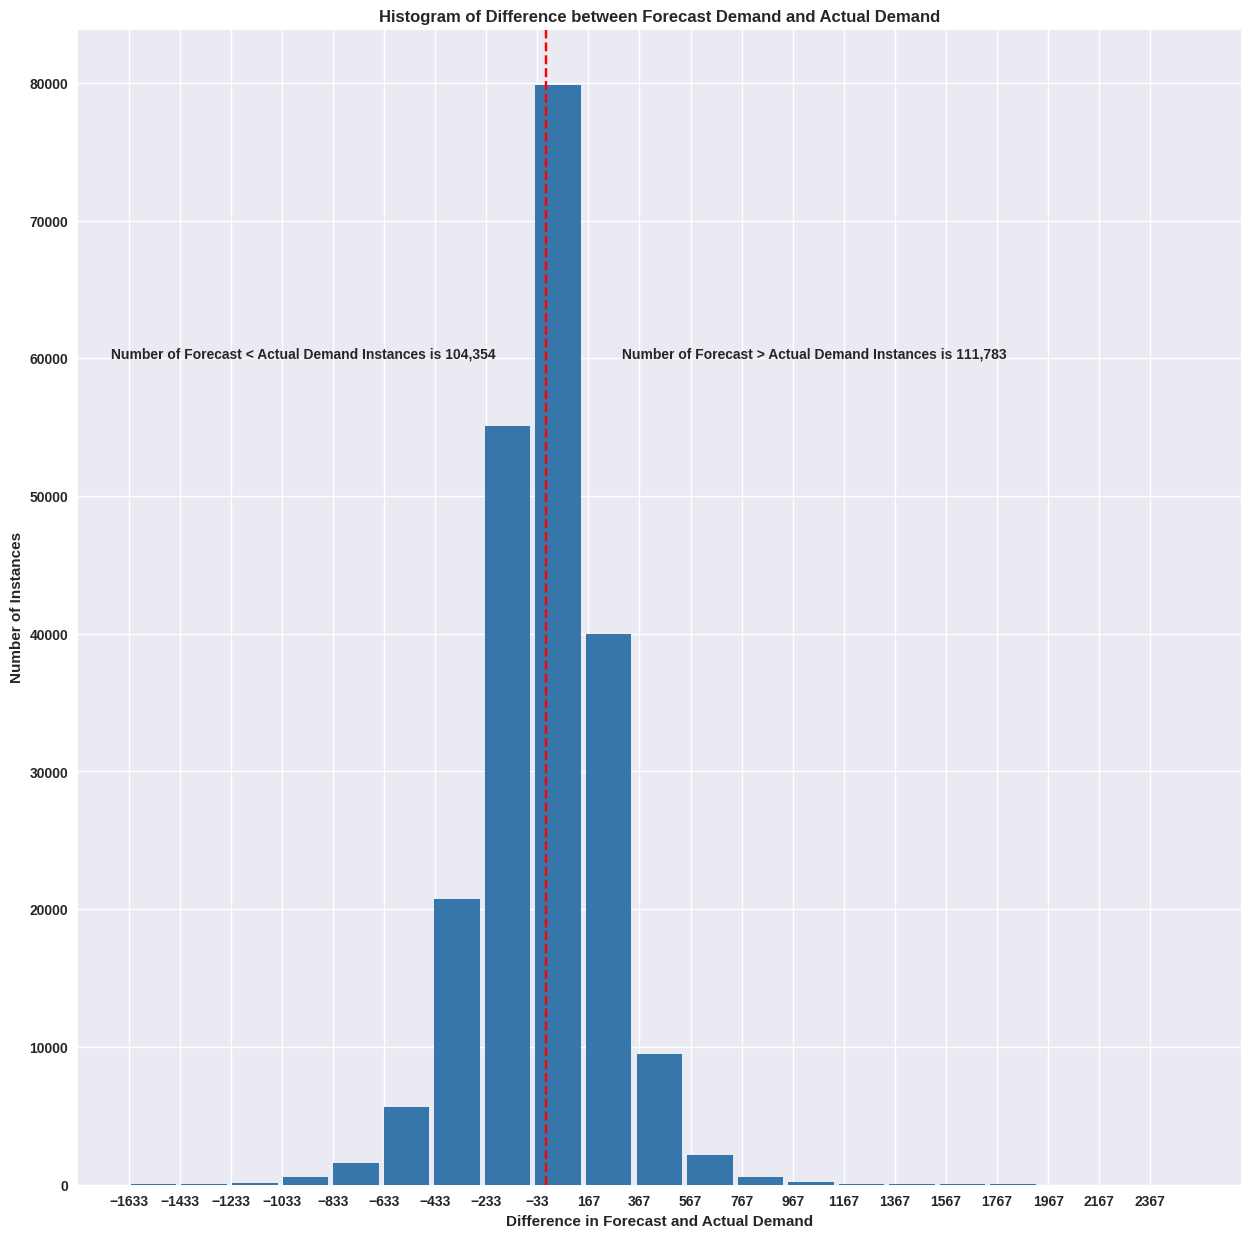

In [71]:
plt.figure(figsize=(15,15))
plt.hist(df['Diff'], bins = len(np.arange(int(df['Diff'].min()), int(df['Diff'].max()), step=200)), rwidth = 0.9,color = '#3776ab')
plt.xticks(np.arange(int(df['Diff'].min()), int(df['Diff'].max()), step=200),fontweight='bold')
plt.yticks(fontweight='bold')
plt.text(300,60000,'Number of Forecast > Actual Demand Instances is 111,783',fontweight='bold',fontsize = 10)
plt.text(-1700,60000,'Number of Forecast < Actual Demand Instances is 104,354',fontweight='bold',fontsize = 10)
plt.axvline(x = 0, color = 'r',linestyle = 'dashed')
plt.title('Histogram of Difference between Forecast Demand and Actual Demand',fontweight='bold')
plt.xlabel('Difference in Forecast and Actual Demand',fontweight='bold')
plt.ylabel('Number of Instances',fontweight='bold')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

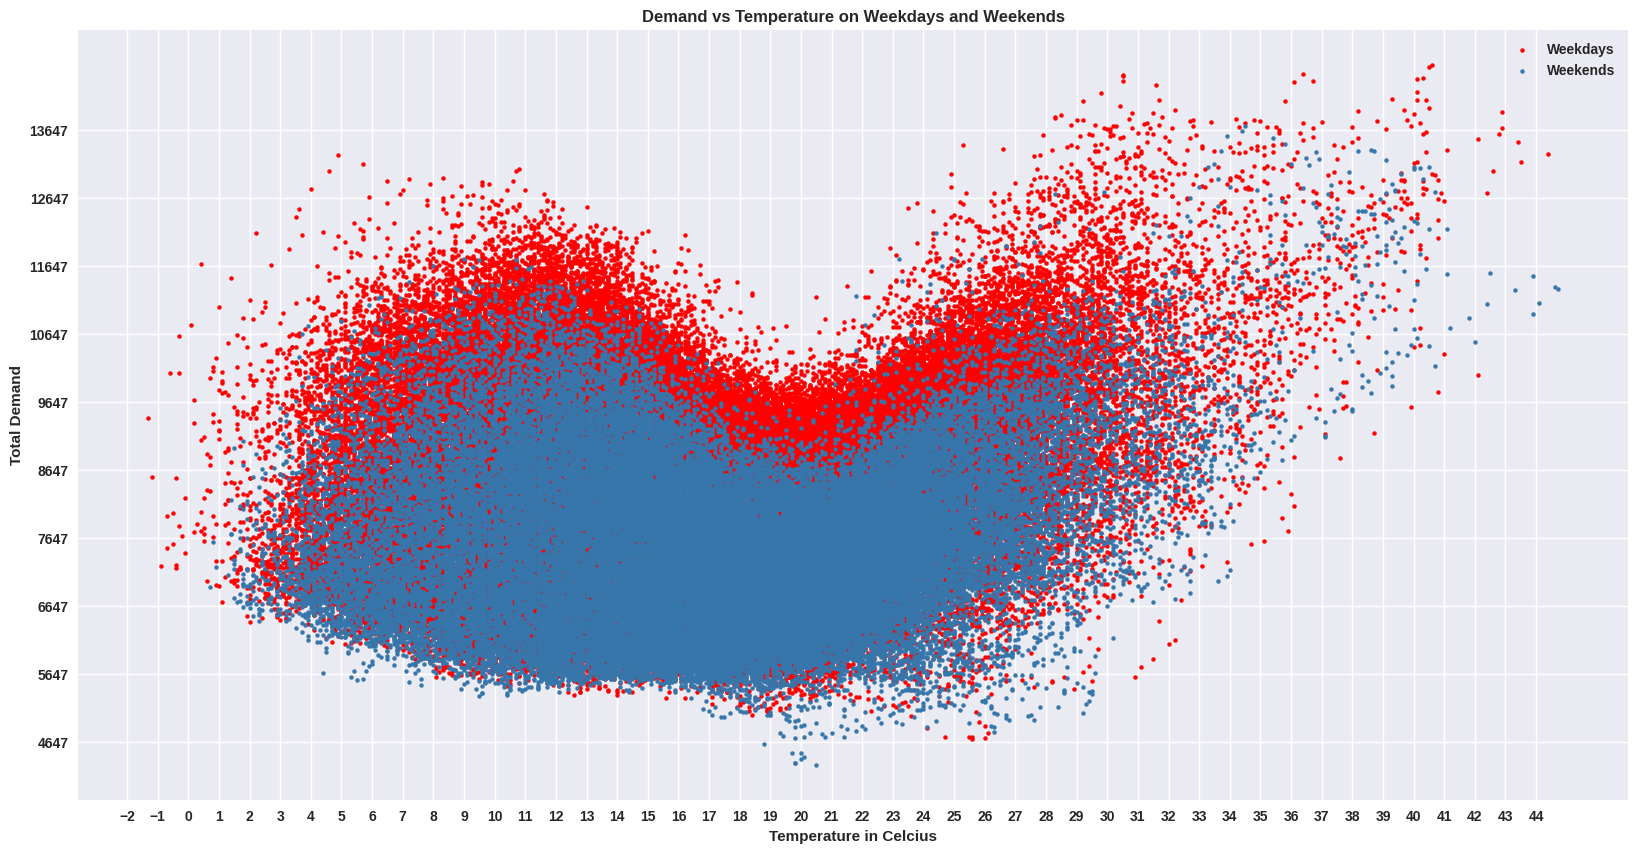

In [72]:
dfw = df.loc[df['Day of Week'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
dfe = df.loc[df['Day of Week'].isin(['Saturday','Sunday'])]
plt.figure(figsize=(20,10))
plt.scatter(dfw["TEMPERATURE"],dfw["TOTALDEMAND"], color ='r',s = 8,label = 'Weekdays')
plt.scatter(dfe["TEMPERATURE"],dfe["TOTALDEMAND"], color = '#3776ab', s =8,label ='Weekends')
plt.xticks(np.arange(int(dfw['TEMPERATURE'].min())-1, int(dfe['TEMPERATURE'].max())+1, step=1),fontweight='bold')
plt.yticks(np.arange(int(dfw['TOTALDEMAND'].min())-50, int(dfw['TOTALDEMAND'].max())-50, step=1000),fontweight='bold')
plt.title('Demand vs Temperature on Weekdays and Weekends',fontweight='bold')
plt.xlabel('Temperature in Celcius',fontweight='bold')
plt.ylabel('Total Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show

In [73]:
dday=df.groupby('Day of Week')[['FORECASTDEMAND','TOTALDEMAND','Diff']].mean().reset_index()
new_index = [1, 5, 6, 4, 0, 2,3 ]
dday = dday.reindex(new_index)
dday

Day of Week  FORECASTDEMAND  TOTALDEMAND       Diff
1      Monday     8191.019659  8189.885362   1.134297
5     Tuesday     8331.724915  8316.454008  15.270907
6   Wednesday     8293.608666  8277.034632  16.574035
4    Thursday     8300.090379  8301.611477  -1.521098
0      Friday     8250.291918  8253.423106  -3.131188
2    Saturday     7663.926185  7674.196304 -10.270119
3      Sunday     7442.041144  7469.318804 -27.277660

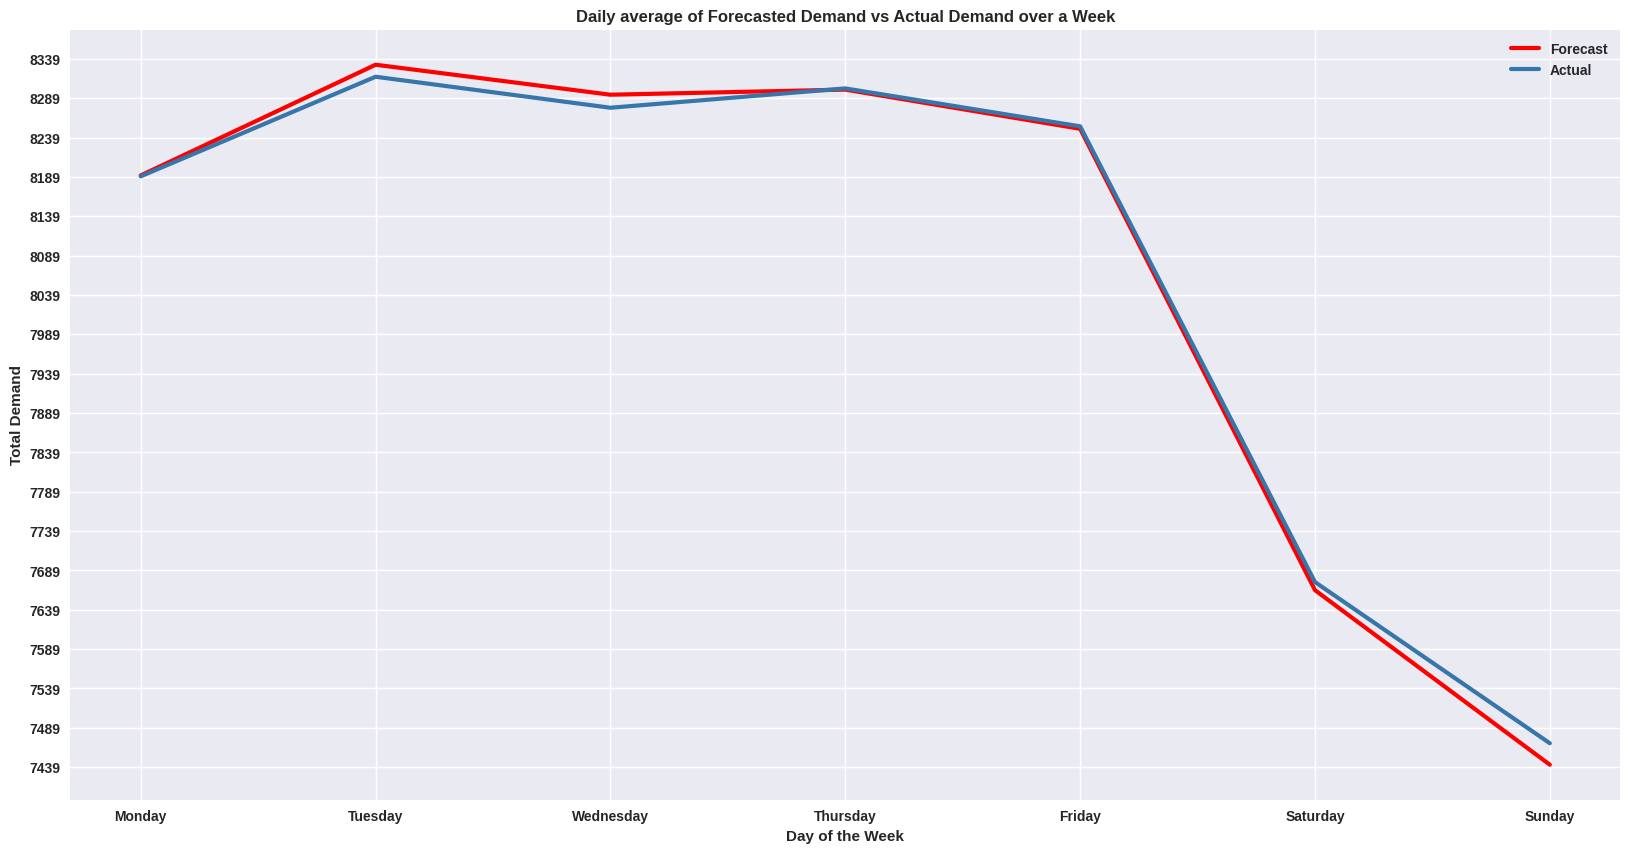

In [74]:
plt.figure(figsize=(20,10))
plt.plot('Day of Week', 'FORECASTDEMAND',color ='r', label ='Forecast',linewidth =3,data = dday)
plt.plot('Day of Week', 'TOTALDEMAND',color = '#3776ab', label ='Actual',linewidth = 3,data = dday)
plt.xticks(fontweight='bold')
plt.yticks(np.arange(int(dday['FORECASTDEMAND'].min())-3, int(dday['FORECASTDEMAND'].max())+47, step=50),fontweight='bold')
plt.title('Daily average of Forecasted Demand vs Actual Demand over a Week',fontweight='bold')
plt.xlabel('Day of the Week',fontweight='bold')
plt.ylabel('Total Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()

In [75]:
dmon=df.groupby('Month')[['FORECASTDEMAND','TOTALDEMAND','Diff']].mean().reset_index()
new_index = [4,3,7,0,8,6,5,1,11,10,9,2 ]
dmon = dmon.reindex(new_index)
dmon

Month  FORECASTDEMAND  TOTALDEMAND       Diff
4    Jan     8251.065917  8291.719975 -40.654058
3    Feb     8283.222166  8273.975078   9.247088
7    Mar     7898.742801  7887.906912  10.835889
0    Apr     7509.588153  7517.379648  -7.791495
8    May     8112.324237  8109.483941   2.840295
6    Jun     8800.769534  8799.549310   1.220224
5    Jul     8919.071981  8888.325113  30.746868
1    Aug     8474.940581  8465.578510   9.362071
11   Sep     7714.481864  7700.998227  13.483637
10   Oct     7431.954271  7424.176594   7.777677
9    Nov     7628.773198  7639.142347 -10.369149
2    Dec     7689.377004  7731.316805 -41.939801

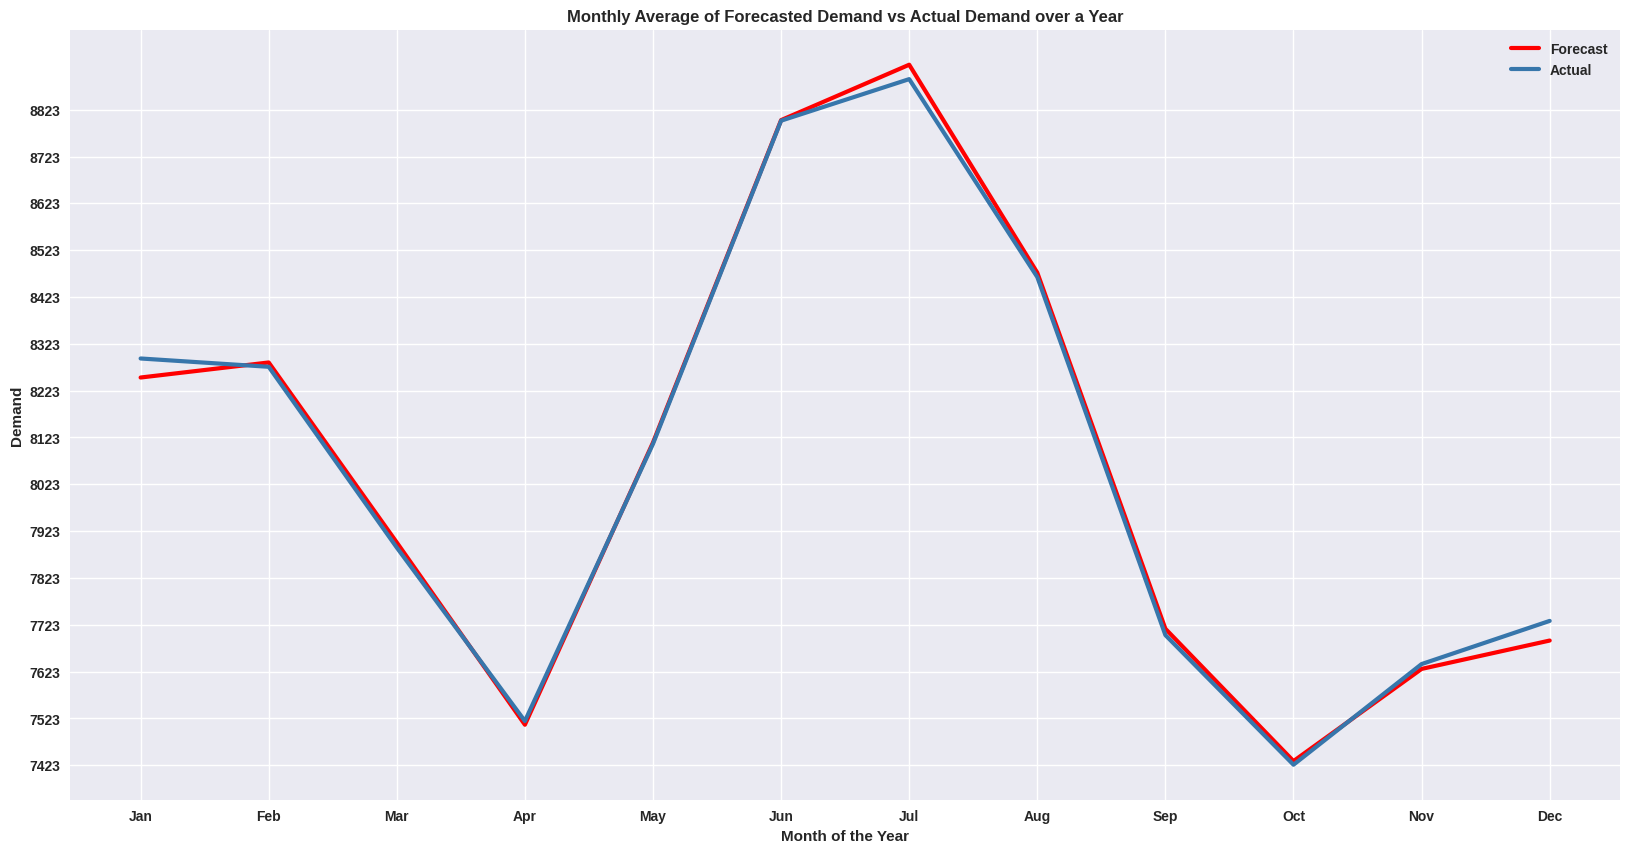

In [76]:
plt.figure(figsize=(20,10))
plt.plot('Month', 'FORECASTDEMAND',color ='r', label ='Forecast',linewidth =3,data = dmon)
plt.plot('Month', 'TOTALDEMAND',color = '#3776ab', label ='Actual',linewidth = 3,data = dmon)
plt.xticks(fontweight='bold')
plt.yticks(np.arange(int(dmon['FORECASTDEMAND'].min())-8, int(dmon['FORECASTDEMAND'].max())-8, step=100),fontweight='bold')
plt.xlabel('Month of the Year',fontweight='bold')
plt.ylabel('Diffrence in Forecast and Demand',fontweight='bold')
plt.title('Monthly Average of Forecasted Demand vs Actual Demand over a Year',fontweight='bold')
plt.xlabel('Month of the Year')
plt.ylabel('Demand')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()

In [77]:
tdif=df.groupby('TEMPERATURE')[['Diff','FORECASTDEMAND','TOTALDEMAND']].mean().reset_index()
tdif

TEMPERATURE        Diff  FORECASTDEMAND  TOTALDEMAND
0           -1.3 -415.090000     8999.890000      9414.98
1           -1.2 -470.598000     8070.072000      8540.67
2           -0.9 -139.262000     7099.958000      7239.22
3           -0.7 -333.274000     7404.016000      7737.29
4           -0.6 -174.862857     9901.817143     10076.68
..           ...         ...             ...          ...
622         43.9  336.003469    11833.983469     11497.98
623         44.1 -475.675625    10631.554375     11107.23
624         44.4 -961.564694    12337.355306     13298.92
625         44.6 -215.079000    11129.351000     11344.43
626         44.7 -402.942653    10910.437347     11313.38

[627 rows x 4 columns]

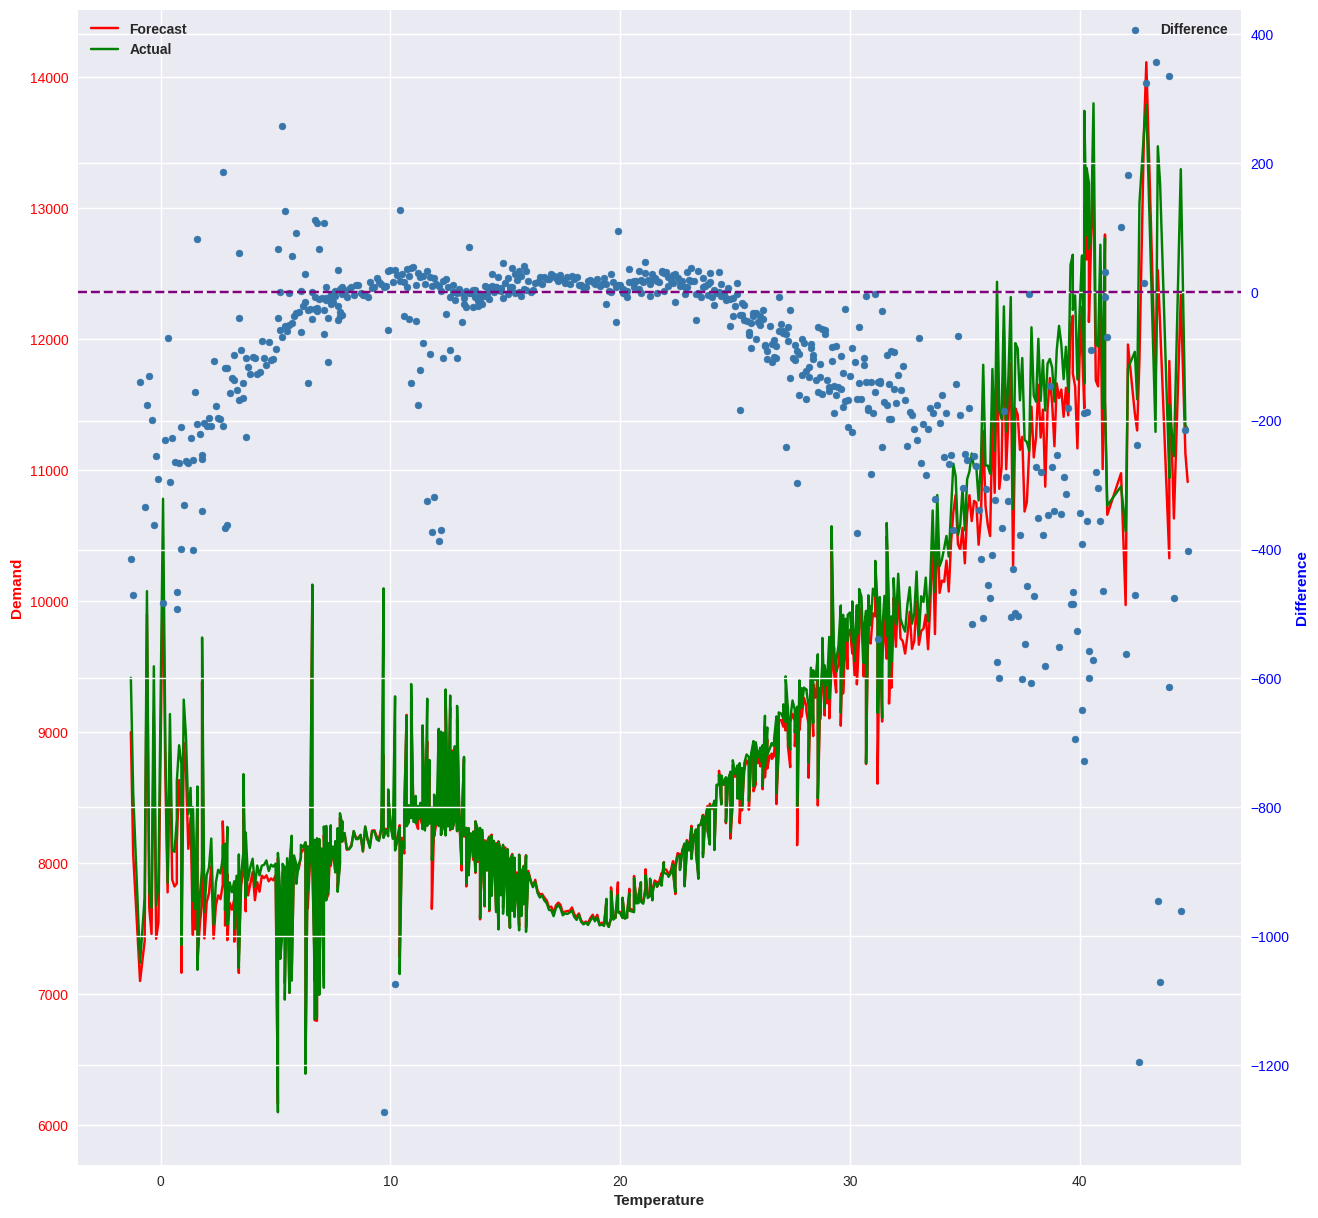

In [78]:
fig, ax1 = plt.subplots(figsize=(15,15))
ax2 = ax1.twinx()
ax1.plot('TEMPERATURE', 'FORECASTDEMAND', color = 'red',label = 'Forecast', data = tdif)
ax1.plot('TEMPERATURE', 'TOTALDEMAND', color = 'green',label = 'Actual',data = tdif)
legend_properties = {'weight':'bold'}
ax1.legend(prop = legend_properties)
ax2.scatter('TEMPERATURE', 'Diff', color = '#3776ab',s = 25,data = tdif, label ='Difference')
ax2.legend(prop = legend_properties)
plt.axhline(y = 0, color = 'purple',linestyle = 'dashed')
ax1.set_xlabel("Temperature",fontweight='bold' )
ax1.set_ylabel("Demand", color='red',fontweight='bold')
ax1.tick_params(axis="y", labelcolor='red')
ax2.set_ylabel("Difference", color='blue',fontweight='bold')
ax2.tick_params(axis="y", labelcolor='blue')

**REGRESSION ANALYSIS**


In [79]:
na = pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/final.csv')

In [80]:
na['Date'] = pd.to_datetime(na['Date'],format='%Y-%m-%d')
na['Time'] = pd.to_datetime(na['Time']).dt.time
na['Time'] = pd.to_datetime(na['Time'],format ='%H:%M:%S')

In [81]:
year = pd.DataFrame(na.groupby('Date')['FORECASTDEMAND','TEMPERATURE','TOTALDEMAND'].mean())
df = year.reset_index()
df

<ipython-input-81-e8c601d75336>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year = pd.DataFrame(na.groupby('Date')['FORECASTDEMAND','TEMPERATURE','TOTALDEMAND'].mean())


Date  FORECASTDEMAND  TEMPERATURE  TOTALDEMAND
0    2010-01-01     7722.720736    25.185417  7795.355000
1    2010-01-02     7804.613175    24.795833  8006.835000
2    2010-01-03     7491.520488    19.462500  7390.398750
3    2010-01-04     8592.014274    20.847917  8235.844167
4    2010-01-05     8907.999454    22.660417  8823.863333
...         ...             ...          ...          ...
4552 2022-07-28     8752.042205    12.420833  8713.980833
4553 2022-07-29     9051.648260    11.479167  8825.371458
4554 2022-07-30     8630.231246     8.725000  8590.743125
4555 2022-07-31     8543.443221    10.525000  8699.208125
4556 2022-08-01     8231.479437    12.100000  8027.280000

[4557 rows x 4 columns]

In [82]:
fut = pd.DataFrame({'Date':pd.date_range('2022-08-02', periods =7)})
fut['FORECASTDEMAND'] = np.nan
fut["TEMPERATURE"] = [19.7,24,21.4,22.8,19.5,18.8,18.4]
fut['TOTALDEMAND'] = np.nan
df = pd.concat([df,fut])
df = df.reset_index()
del df['index']
df['Day of Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.strftime('%b')
df

Date  FORECASTDEMAND  TEMPERATURE  TOTALDEMAND Day of Week Month
0    2010-01-01     7722.720736    25.185417  7795.355000      Friday   Jan
1    2010-01-02     7804.613175    24.795833  8006.835000    Saturday   Jan
2    2010-01-03     7491.520488    19.462500  7390.398750      Sunday   Jan
3    2010-01-04     8592.014274    20.847917  8235.844167      Monday   Jan
4    2010-01-05     8907.999454    22.660417  8823.863333     Tuesday   Jan
...         ...             ...          ...          ...         ...   ...
4559 2022-08-04             NaN    21.400000          NaN    Thursday   Aug
4560 2022-08-05             NaN    22.800000          NaN      Friday   Aug
4561 2022-08-06             NaN    19.500000          NaN    Saturday   Aug
4562 2022-08-07             NaN    18.800000          NaN      Sunday   Aug
4563 2022-08-08             NaN    18.400000          NaN      Monday   Aug

[4564 rows x 6 columns]

In [83]:
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(df[['Day of Week', 'Month']]).toarray())
df = df.join(enc_data)
df

Date  FORECASTDEMAND  TEMPERATURE  TOTALDEMAND Day of Week Month  \
0    2010-01-01     7722.720736    25.185417  7795.355000      Friday   Jan   
1    2010-01-02     7804.613175    24.795833  8006.835000    Saturday   Jan   
2    2010-01-03     7491.520488    19.462500  7390.398750      Sunday   Jan   
3    2010-01-04     8592.014274    20.847917  8235.844167      Monday   Jan   
4    2010-01-05     8907.999454    22.660417  8823.863333     Tuesday   Jan   
...         ...             ...          ...          ...         ...   ...   
4559 2022-08-04             NaN    21.400000          NaN    Thursday   Aug   
4560 2022-08-05             NaN    22.800000          NaN      Friday   Aug   
4561 2022-08-06             NaN    19.500000          NaN    Saturday   Aug   
4562 2022-08-07             NaN    18.800000          NaN      Sunday   Aug   
4563 2022-08-08             NaN    18.400000          NaN      Monday   Aug   

        0    1    2    3  ...    9   10   11   12   13   14   15   16   17  \
0     1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4559  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4560  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4561  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4562  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4563  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       18  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
4559  0.0  
4560  0.0  
4561  0.0  
4562  0.0  
4563  0.0  

[4564 rows x 25 columns]

In [84]:
qw = df.head(4557)

**POLYNOMIAL REGRESSION FOR DAILY DEMAND**

**POLYNOMIAL REGRESSION WITH ALL FEATURES**

In [85]:
x = qw[['TEMPERATURE',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = qw['TOTALDEMAND'].values

In [86]:
n = range(1,3)
alv = []
for i in n:
   print('The Polynomial is',i)
   poly_model = PolynomialFeatures(degree=i)

   poly_x_values = poly_model.fit_transform(x)
   poly_model.fit(poly_x_values, y)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   scores = cross_val_score(regression_model, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')
   s = scores.mean()
   s = abs(s)
   alv.append([i,s])
rt = pd.DataFrame(alv)
rt.columns = ['Polynominal', 'RMSE']
rt

The Polynomial is 1
The Polynomial is 2


Polynominal        RMSE
0            1  594.216092
1            2  470.356679

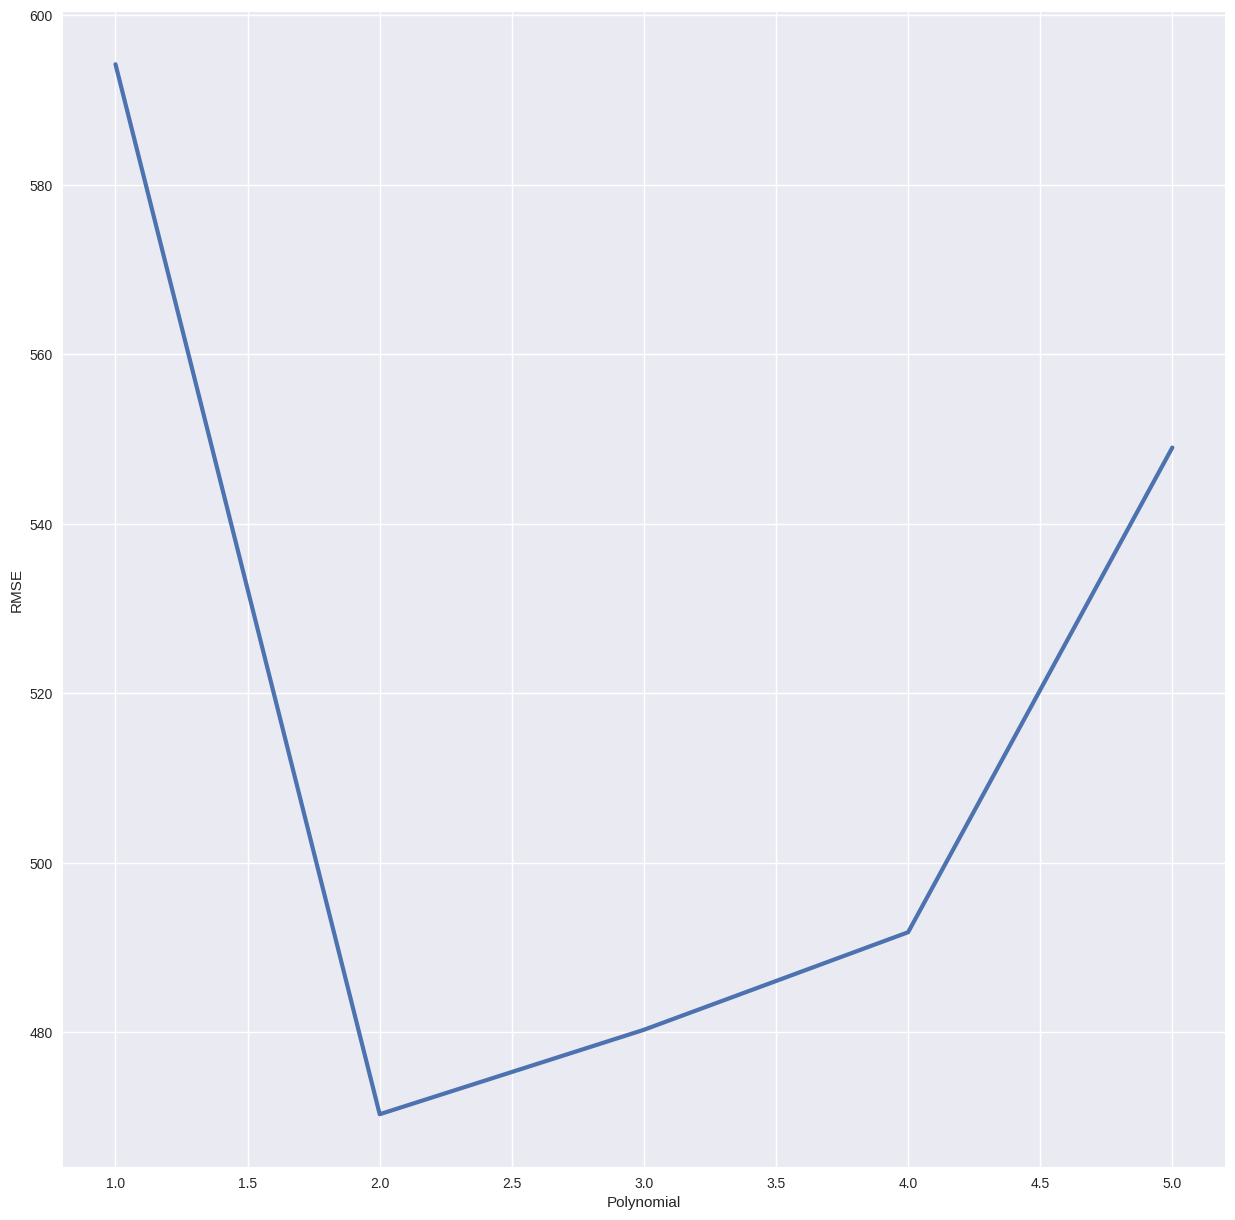

In [87]:
#rt.to_csv(r'/content/drive/MyDrive/DS Project/Data/polynomial.csv')
rt =pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/polynomial.csv')
plt.figure(figsize=(15,15))
plt.plot(rt['Polynominal'],rt['RMSE'], linewidth = 3)
plt.xlabel('Polynomial')
plt.ylabel('RMSE')
plt.show()

In [88]:
poly_model = PolynomialFeatures(degree=2)
poly_x_values = poly_model.fit_transform(x)
poly_model.fit(poly_x_values, y)
lm = LinearRegression()
lm.fit(poly_x_values, y)
ypred = lm.predict(poly_x_values,)
s = abs(cross_val_score(lm, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')).mean()
f = abs(cross_val_score(lm, poly_x_values, y, cv=10, scoring='neg_mean_absolute_error')).mean()
m = (mean_absolute_percentage_error(y,ypred))*100
r = lm.score(poly_x_values, y,)
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 470.35667869009694
MAE 387.9181047218376
MAPE 4.433040553470591
R2 0.6828379904716312


In [89]:
len(lm.coef_)

231

In [90]:
np.count_nonzero(lm.coef_)

162

In [91]:
lm.intercept_

17429708275412.975

In [92]:
mask = (qw['Date'] > '2021-08-01') & (qw['Date'] < '2022-08-02')
pol = qw.loc[mask]

In [93]:
x = pol[['TEMPERATURE',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = pol['TOTALDEMAND'].values

In [94]:
poly_model = PolynomialFeatures(degree=2)
poly_x_values = poly_model.fit_transform(x)
lm = LinearRegression()
lm.fit(poly_x_values, y)
pyfut = lm.predict(poly_x_values)
pol['poly'] = pyfut
pol

<ipython-input-94-56f394212b75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pol['poly'] = pyfut


Date  FORECASTDEMAND  TEMPERATURE  TOTALDEMAND Day of Week Month  \
4199 2021-08-02     8329.244582    11.727083  8090.591458      Monday   Aug   
4200 2021-08-03     8302.990885    14.285417  8081.596875     Tuesday   Aug   
4201 2021-08-04     8628.430746    11.516667  8451.799375   Wednesday   Aug   
4202 2021-08-05     8427.555577    12.268750  8232.330625    Thursday   Aug   
4203 2021-08-06     8156.890909    12.085417  8027.922500      Friday   Aug   
...         ...             ...          ...          ...         ...   ...   
4552 2022-07-28     8752.042205    12.420833  8713.980833    Thursday   Jul   
4553 2022-07-29     9051.648260    11.479167  8825.371458      Friday   Jul   
4554 2022-07-30     8630.231246     8.725000  8590.743125    Saturday   Jul   
4555 2022-07-31     8543.443221    10.525000  8699.208125      Sunday   Jul   
4556 2022-08-01     8231.479437    12.100000  8027.280000      Monday   Aug   

        0    1    2    3  ...   10   11   12   13   14   15   16   17   18  \
4199  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4200  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4201  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4202  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4203  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4552  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4553  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4554  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4555  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4556  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

             poly  
4199  8112.371094  
4200  7512.746094  
4201  8280.871094  
4202  8038.871094  
4203  7922.871094  
...           ...  
4552  9002.371094  
4553  9018.621094  
4554  8844.371094  
4555  8508.246094  
4556  8015.433594  

[358 rows x 26 columns]

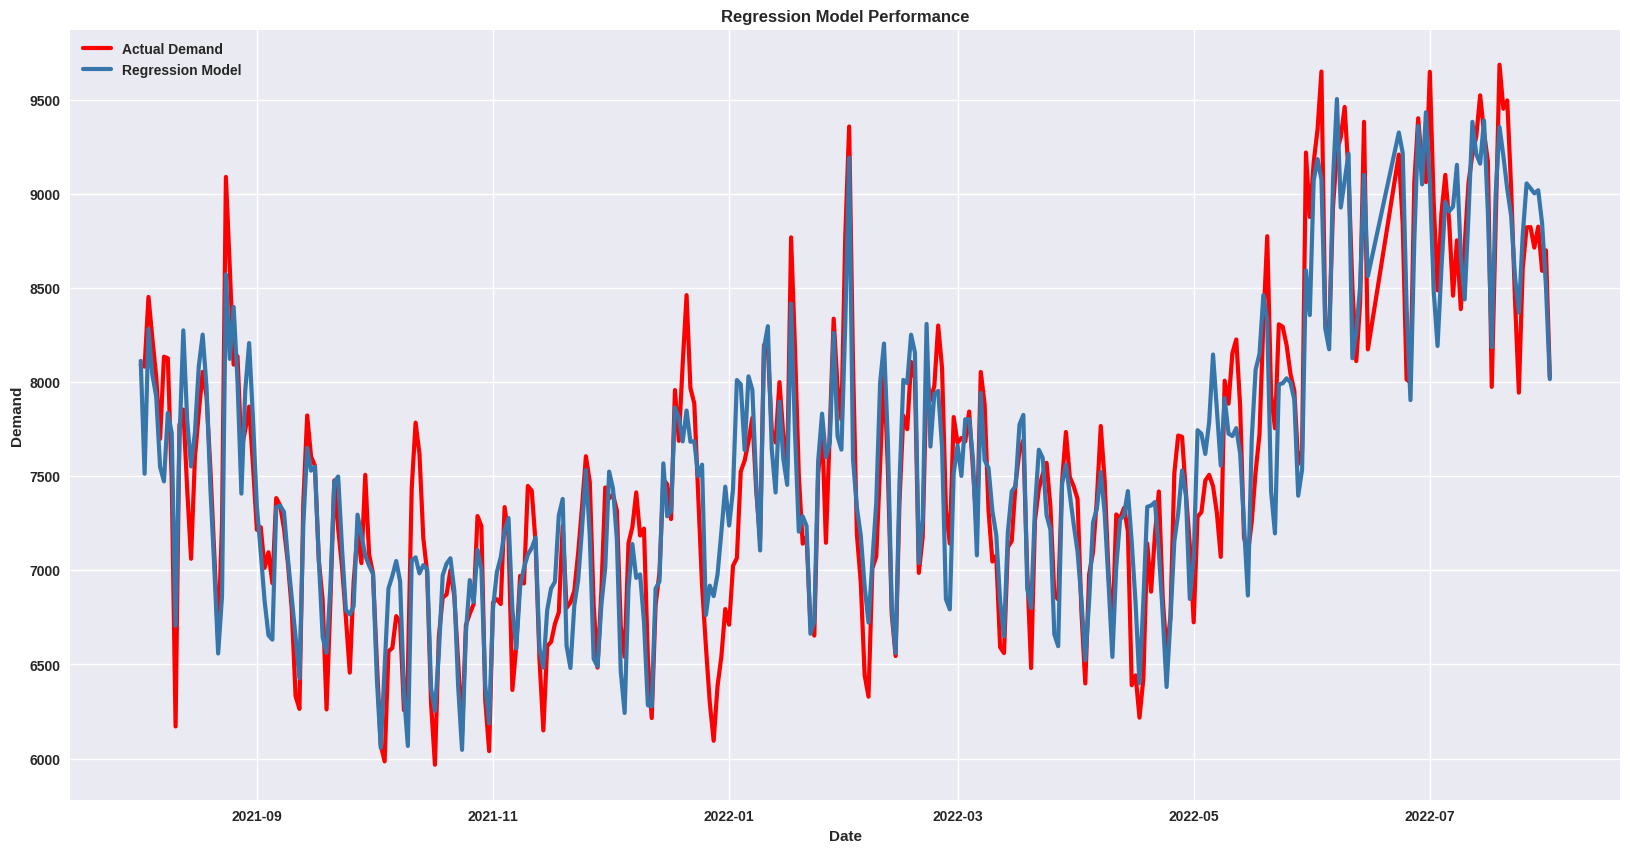

In [95]:
plt.figure(figsize=(20, 10))
plt.plot(pol['Date'], pol['TOTALDEMAND'], label = "Actual Demand", color = 'r', linewidth = 3)
plt.plot(pol['Date'], pol['poly'], label = "Regression Model", color = '#3776ab', linewidth = 3)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Regression Model Performance',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()

**Prediciting Future Demand**

In [96]:
asd = df.tail(7)
x = asd[['TEMPERATURE',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values

In [97]:
poly_model = PolynomialFeatures(degree=2)
poly_x_values = poly_model.fit_transform(x)
yfut = lm.predict(poly_x_values)
yfut

array([6739.87109375, 6696.37109375, 6840.87109375, 6495.37109375,
       6470.87109375, 6259.87109375, 6847.99609375])

**POLYNOMIAL REGRESSION WITH TEMPERATURE AND MONTHS OF THE YEAR**

In [98]:
x = qw[['TEMPERATURE',7,8,9,10,11,12,13,14,15,16,17,18]].values
y = qw['TOTALDEMAND'].values

In [99]:
n = range(1,3)
alv = []
for i in n:
   print('The Polynomial is',i)
   poly_model = PolynomialFeatures(degree=i)

   poly_x_values = poly_model.fit_transform(x)
   poly_model.fit(poly_x_values, y)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   scores = cross_val_score(regression_model, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')
   s = scores.mean()
   s = abs(s)
   alv.append([i,s])
rt = pd.DataFrame(alv)
rt.columns = ['Polynominal', 'RMSE']
rt

The Polynomial is 1
The Polynomial is 2


Polynominal        RMSE
0            1  679.325605
1            2  712.561066

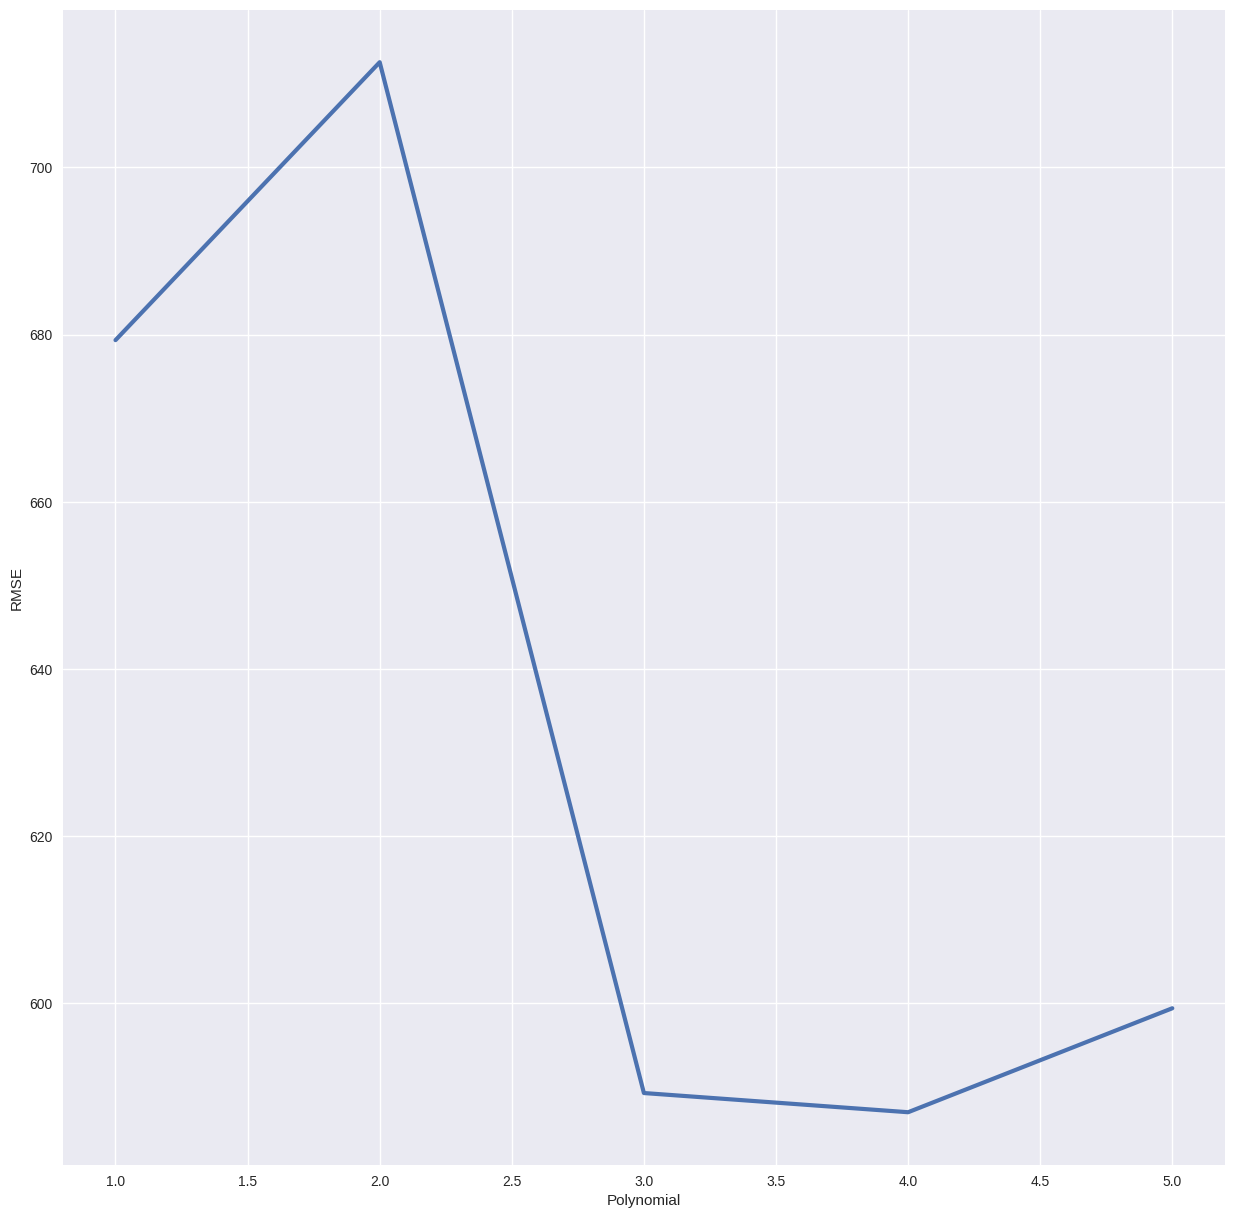

In [100]:
#rt.to_csv(r'/content/drive/MyDrive/DS Project/Data/polynomial2.csv')
rt =pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/polynomial2.csv')
plt.figure(figsize=(15,15))
plt.plot(rt['Polynominal'],rt['RMSE'], linewidth = 3)
plt.xlabel('Polynomial')
plt.ylabel('RMSE')
plt.show()

In [101]:
poly_model = PolynomialFeatures(degree=4)
poly_x_values = poly_model.fit_transform(x)
poly_model.fit(poly_x_values, y)
lm = LinearRegression()
lm.fit(poly_x_values, y)
ypred = lm.predict(poly_x_values)
s = abs(cross_val_score(lm, poly_x_values, y, cv= 5, scoring='neg_root_mean_squared_error')).mean()
f = abs(cross_val_score(lm, poly_x_values, y, cv= 5, scoring='neg_mean_absolute_error')).mean()
m = (mean_absolute_percentage_error(y,ypred))*100
r = lm.score(poly_x_values, y,)
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 613.6433402443633
MAE 501.5424854398467
MAPE 5.6390709000976775
R2 0.5286815929154411


In [102]:
len(lm.coef_)

2380

In [103]:
np.count_nonzero(lm.coef_)

145

In [104]:
lm.intercept_

-10470.572949230002

**POLYNOMIAL REGRESSION WITH TEMPERATURE AND DAYS OF THE WEEK**

In [105]:
x = qw[['TEMPERATURE',0,1,2,3,4,5,6]].values
y = qw['TOTALDEMAND'].values

In [106]:
n = range(1,3)
alv = []
for i in n:
   print('The Polynomial is',i)
   poly_model = PolynomialFeatures(degree=i)

   poly_x_values = poly_model.fit_transform(x)
   poly_model.fit(poly_x_values, y)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   scores = cross_val_score(regression_model, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')
   s = scores.mean()
   s = abs(s)
   alv.append([i,s])
rt = pd.DataFrame(alv)
rt.columns = ['Polynominal', 'RMSE']
rt

The Polynomial is 1
The Polynomial is 2


Polynominal        RMSE
0            1  749.466025
1            2  533.588572

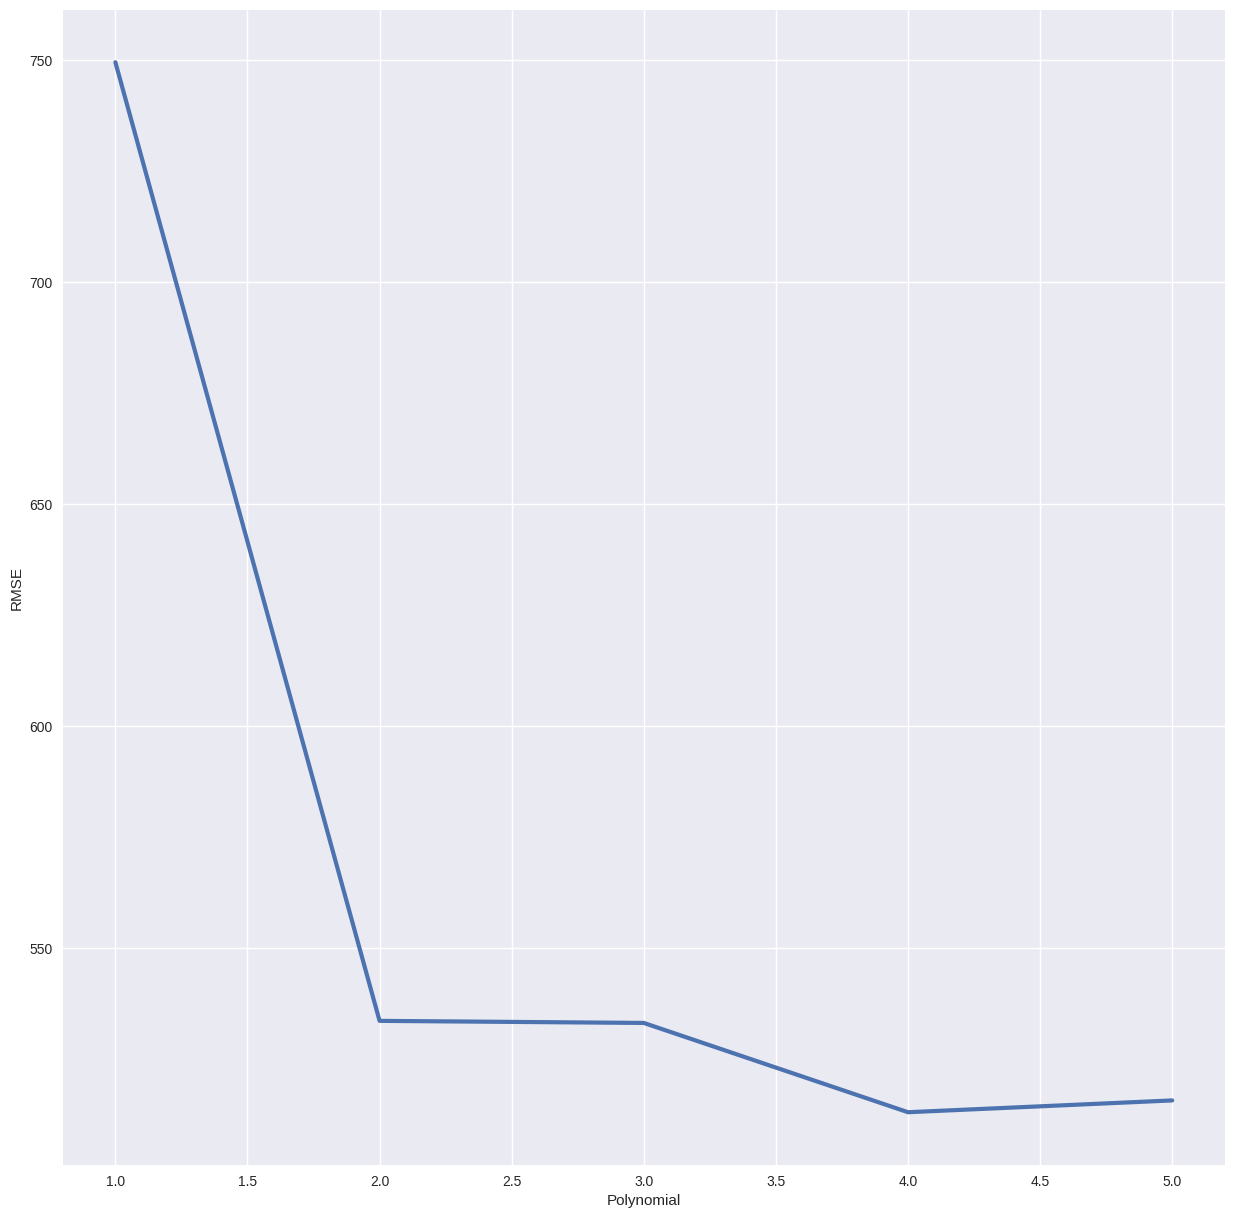

In [107]:
#rt.to_csv(r'/content/drive/MyDrive/DS Project/Data/polynomial3.csv')
rt =pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/polynomial3.csv')
plt.figure(figsize=(15,15))
plt.plot(rt['Polynominal'],rt['RMSE'], linewidth = 3)
plt.xlabel('Polynomial')
plt.ylabel('RMSE')
plt.show()

In [108]:
poly_model = PolynomialFeatures(degree=4)
poly_x_values = poly_model.fit_transform(x)
poly_model.fit(poly_x_values, y)
lm = LinearRegression()
lm.fit(poly_x_values, y)
ypred = lm.predict(poly_x_values)
s = abs(cross_val_score(lm, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')).mean()
f = abs(cross_val_score(lm, poly_x_values, y, cv=10, scoring='neg_mean_absolute_error')).mean()
m = (mean_absolute_percentage_error(y,ypred))*100
r = lm.score(poly_x_values, y,)
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 513.0164951252931
MAE 416.7456858626721
MAPE 4.911061692466283
R2 0.6140396443897643


In [109]:
len(lm.coef_)

495

In [110]:
np.count_nonzero(lm.coef_)

85

In [111]:
lm.intercept_

1730.3900809674315

**POLYNOMIAL REGRESSION WITH TEMPERATURE ONLY**

In [112]:
x = qw[['TEMPERATURE']].values
y = qw['TOTALDEMAND'].values

In [113]:
n = range(1,16)
alv = []
for i in n:
   print('The Polynomial is',i)
   poly_model = PolynomialFeatures(degree=i)

   poly_x_values = poly_model.fit_transform(x)
   poly_model.fit(poly_x_values, y)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   scores = cross_val_score(regression_model, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')
   s = scores.mean()
   s = abs(s)
   alv.append([i,s])
rt = pd.DataFrame(alv)
rt.columns = ['Polynominal', 'RMSE']
rt

The Polynomial is 1
The Polynomial is 2
The Polynomial is 3
The Polynomial is 4
The Polynomial is 5
The Polynomial is 6
The Polynomial is 7
The Polynomial is 8
The Polynomial is 9
The Polynomial is 10
The Polynomial is 11
The Polynomial is 12
The Polynomial is 13
The Polynomial is 14
The Polynomial is 15


Polynominal        RMSE
0             1  818.813763
1             2  635.776421
2             3  635.174444
3             4  618.536948
4             5  618.654369
5             6  618.510493
6             7  620.207310
7             8  624.125705
8             9  621.238664
9            10  618.941354
10           11  618.694468
11           12  618.719604
12           13  618.643731
13           14  618.597433
14           15  618.576134

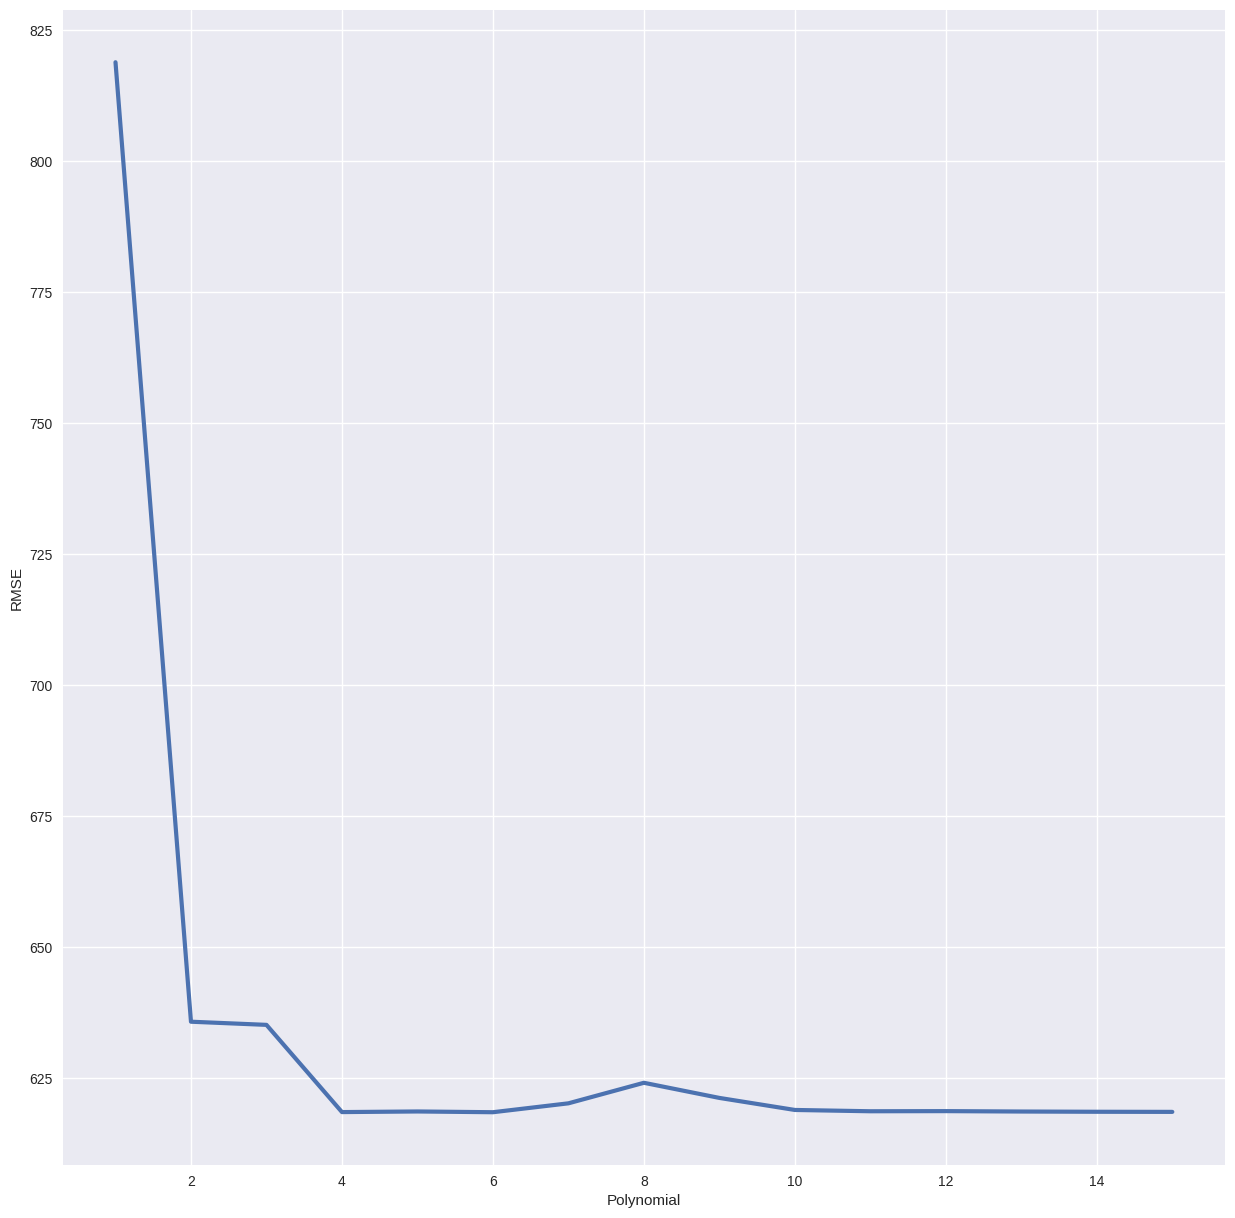

In [114]:
plt.figure(figsize=(15,15))
plt.plot(rt['Polynominal'],rt['RMSE'], linewidth = 3)
plt.xlabel('Polynomial')
plt.ylabel('RMSE')
plt.show()

In [115]:
poly_model = PolynomialFeatures(degree=4)
poly_x_values = poly_model.fit_transform(x)
poly_model.fit(poly_x_values, y)
lm = LinearRegression()
lm.fit(poly_x_values, y)
ypred = lm.predict(poly_x_values)
s = abs(cross_val_score(lm, poly_x_values, y, cv=10, scoring='neg_root_mean_squared_error')).mean()
f = abs(cross_val_score(lm, poly_x_values, y, cv=10, scoring='neg_mean_absolute_error')).mean()
m = (mean_absolute_percentage_error(y,ypred))*100
r = lm.score(poly_x_values, y,)
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 618.5369479998029
MAE 504.25267911432275
MAPE 6.1276528907924055
R2 0.44599915965825454


In [116]:
lm.coef_

array([ 0.00000000e+00,  2.33152727e+03, -2.47774152e+02,  9.83216064e+00,
       -1.28652489e-01])

In [117]:
np.count_nonzero(lm.coef_)

4

In [118]:
lm.intercept_

1942.361221690272

**LINEAR REGRESSION FOR DAILY DEMAND**

In [119]:
x = qw[['TEMPERATURE',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = qw['TOTALDEMAND'].values

In [120]:
rm = LinearRegression()
rm.fit(x,y)
ypred = rm.predict(x)
s = abs(cross_val_score(rm, x, y, cv=10, scoring='neg_root_mean_squared_error')).mean()
f = abs(cross_val_score(rm, x, y, cv=10, scoring='neg_mean_absolute_error')).mean()
r = rm.score(x,y)
m = (mean_absolute_percentage_error(y,ypred))*100
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 594.2160917124997
MAE 480.4869123250063
MAPE 5.605021731885515
R2 0.5035387772713469


In [121]:
rm.coef_

array([  50.71004007,  180.51011005,  123.77731957, -399.21727951,
       -600.57863553,  234.70831476,  254.04551983,  206.75465084,
       -563.58715223,  647.39175541, -542.04543324,  -43.76242238,
        -58.61798183, 1128.56017279, 1018.72614851, -351.19895746,
        217.28210546, -544.46124045, -656.66700708, -251.6199875 ])

In [122]:
rm.intercept_

7173.26320398214

**AMEO MODEL ACCURACIES**

In [123]:
s = np.sqrt(abs(mean_squared_error(qw['TOTALDEMAND'],qw['FORECASTDEMAND'])))
f = mean_absolute_error(qw['TOTALDEMAND'],qw['FORECASTDEMAND'])
r = r2_score(qw['TOTALDEMAND'],qw['FORECASTDEMAND'])
m = (mean_absolute_percentage_error(qw['TOTALDEMAND'],qw['FORECASTDEMAND']))*100
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 141.17280612436502
MAE 107.24645725483664
MAPE 1.3243142142056126
R2 0.9705113969091735


**SARIMA MODEL**

In [124]:
na = pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/final.csv')
na

Unnamed: 0        Date                 Time  TEMPERATURE  \
0                0  2010-01-01  1900-01-01 00:00:00         23.1   
1                1  2010-01-01  1900-01-01 00:30:00         22.9   
2                2  2010-01-01  1900-01-01 01:00:00         22.6   
3                3  2010-01-01  1900-01-01 01:30:00         22.5   
4                4  2010-01-01  1900-01-01 02:00:00         22.5   
...            ...         ...                  ...          ...   
216132      216132  2022-07-31  1900-01-01 22:00:00         14.0   
216133      216133  2022-07-31  1900-01-01 22:30:00         13.2   
216134      216134  2022-07-31  1900-01-01 23:00:00         13.3   
216135      216135  2022-07-31  1900-01-01 23:30:00         12.7   
216136      216136  2022-08-01  1900-01-01 00:00:00         12.1   

        FORECASTDEMAND  TOTALDEMAND        Diff Day of Week Month  
0          7825.092754      7997.41 -172.317246      Friday   Jan  
1          7682.062714      7683.34   -1.277286      Friday   Jan  
2          7431.655915      7270.08  161.575915      Friday   Jan  
3          7086.970417      6961.98  124.990417      Friday   Jan  
4          6753.418630      6675.59   77.828630      Friday   Jan  
...                ...          ...         ...         ...   ...  
216132     9282.487761      9009.20  273.287761      Sunday   Jul  
216133     8999.193676      8700.90  298.293676      Sunday   Jul  
216134     8719.393043      8378.96  340.433043      Sunday   Jul  
216135     8470.453000      8289.80  180.653000      Sunday   Jul  
216136     8231.479437      8027.28  204.199437      Monday   Aug  

[216137 rows x 9 columns]

In [125]:
na['Date'] = pd.to_datetime(na['Date'],format='%Y-%m-%d')
na['Time'] = pd.to_datetime(na['Time']).dt.time
na['Time'] = pd.to_datetime(na['Time'],format ='%H:%M:%S')

In [126]:
year = pd.DataFrame(na.groupby('Date')['FORECASTDEMAND','TOTALDEMAND','TEMPERATURE'].mean())
year = year.reset_index()
year

<ipython-input-126-b6927bcfded9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year = pd.DataFrame(na.groupby('Date')['FORECASTDEMAND','TOTALDEMAND','TEMPERATURE'].mean())


Date  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE
0    2010-01-01     7722.720736  7795.355000    25.185417
1    2010-01-02     7804.613175  8006.835000    24.795833
2    2010-01-03     7491.520488  7390.398750    19.462500
3    2010-01-04     8592.014274  8235.844167    20.847917
4    2010-01-05     8907.999454  8823.863333    22.660417
...         ...             ...          ...          ...
4552 2022-07-28     8752.042205  8713.980833    12.420833
4553 2022-07-29     9051.648260  8825.371458    11.479167
4554 2022-07-30     8630.231246  8590.743125     8.725000
4555 2022-07-31     8543.443221  8699.208125    10.525000
4556 2022-08-01     8231.479437  8027.280000    12.100000

[4557 rows x 4 columns]

In [127]:
mask = (year['Date'] > '2021-08-01') & (year['Date'] < '2022-08-02')
df22 = year.loc[mask]
df22 = df22.reset_index()
del df22['index']
df22

Date  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE
0   2021-08-02     8329.244582  8090.591458    11.727083
1   2021-08-03     8302.990885  8081.596875    14.285417
2   2021-08-04     8628.430746  8451.799375    11.516667
3   2021-08-05     8427.555577  8232.330625    12.268750
4   2021-08-06     8156.890909  8027.922500    12.085417
..         ...             ...          ...          ...
353 2022-07-28     8752.042205  8713.980833    12.420833
354 2022-07-29     9051.648260  8825.371458    11.479167
355 2022-07-30     8630.231246  8590.743125     8.725000
356 2022-07-31     8543.443221  8699.208125    10.525000
357 2022-08-01     8231.479437  8027.280000    12.100000

[358 rows x 4 columns]

In [128]:
series = df22['TOTALDEMAND']
temp = df22['TEMPERATURE']

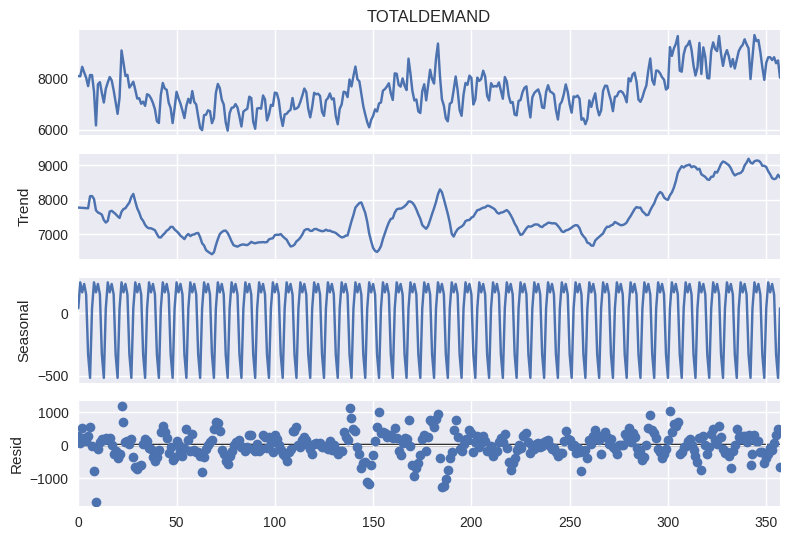

In [129]:
result =seasonal_decompose(series, model='additive', filt=None, period=7, two_sided=False, extrapolate_trend=28)
result.plot()
plt.show()

In [130]:
def tsplot(y, lags=None, figsize=(15, 15), title=None):
    fig = plt.figure(figsize=figsize)

    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    title = 'Time Series Analysis Plots'

    smts.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smts.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

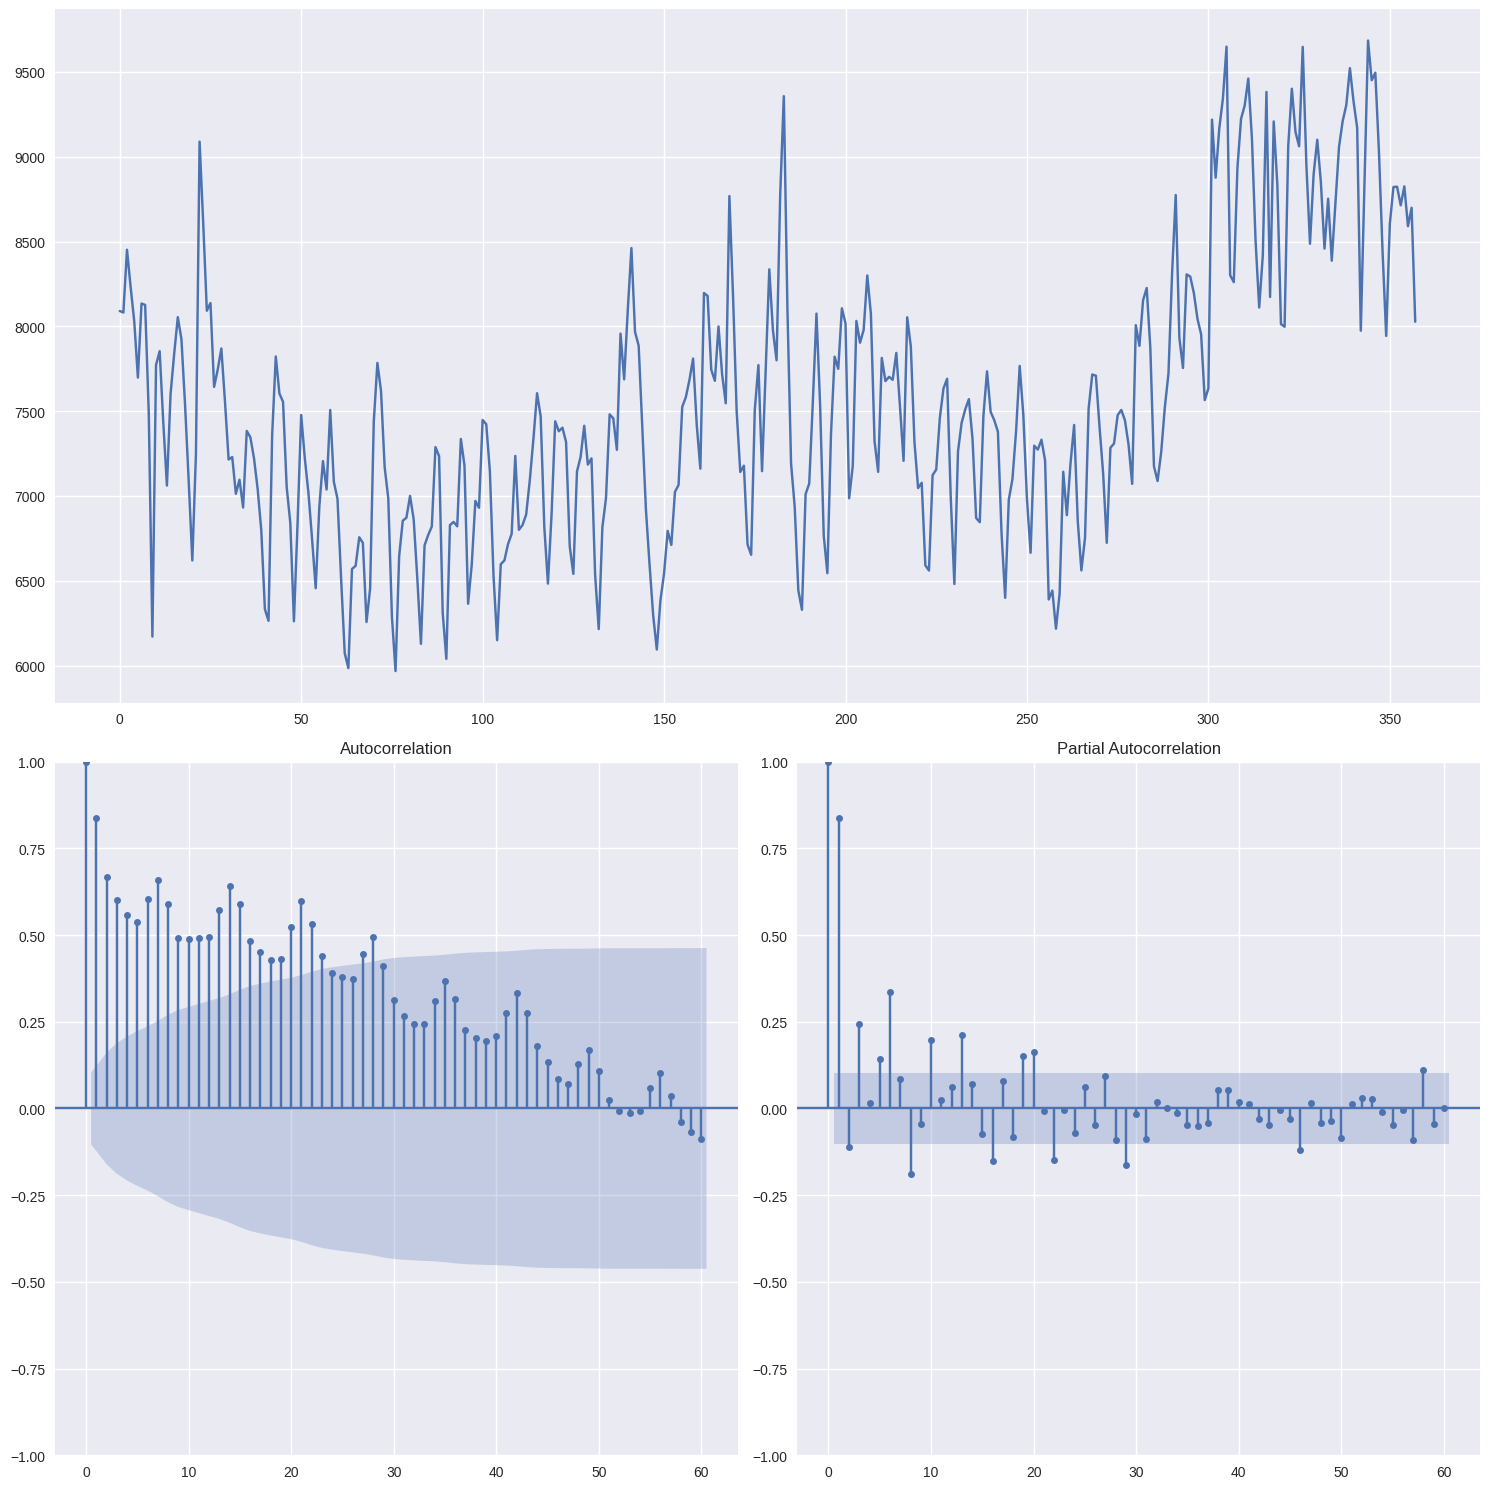

In [131]:
tsplot(series,lags = 60)

In [132]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary',pvalue,adf)
    else:
        print('The series is NOT stationary',pvalue,adf)

In [133]:
check_stationarity(series)

The series is NOT stationary 0.6973195537679262 -1.1437352993067151


In [134]:
diff = series - series.shift(7)
diff = diff.dropna()

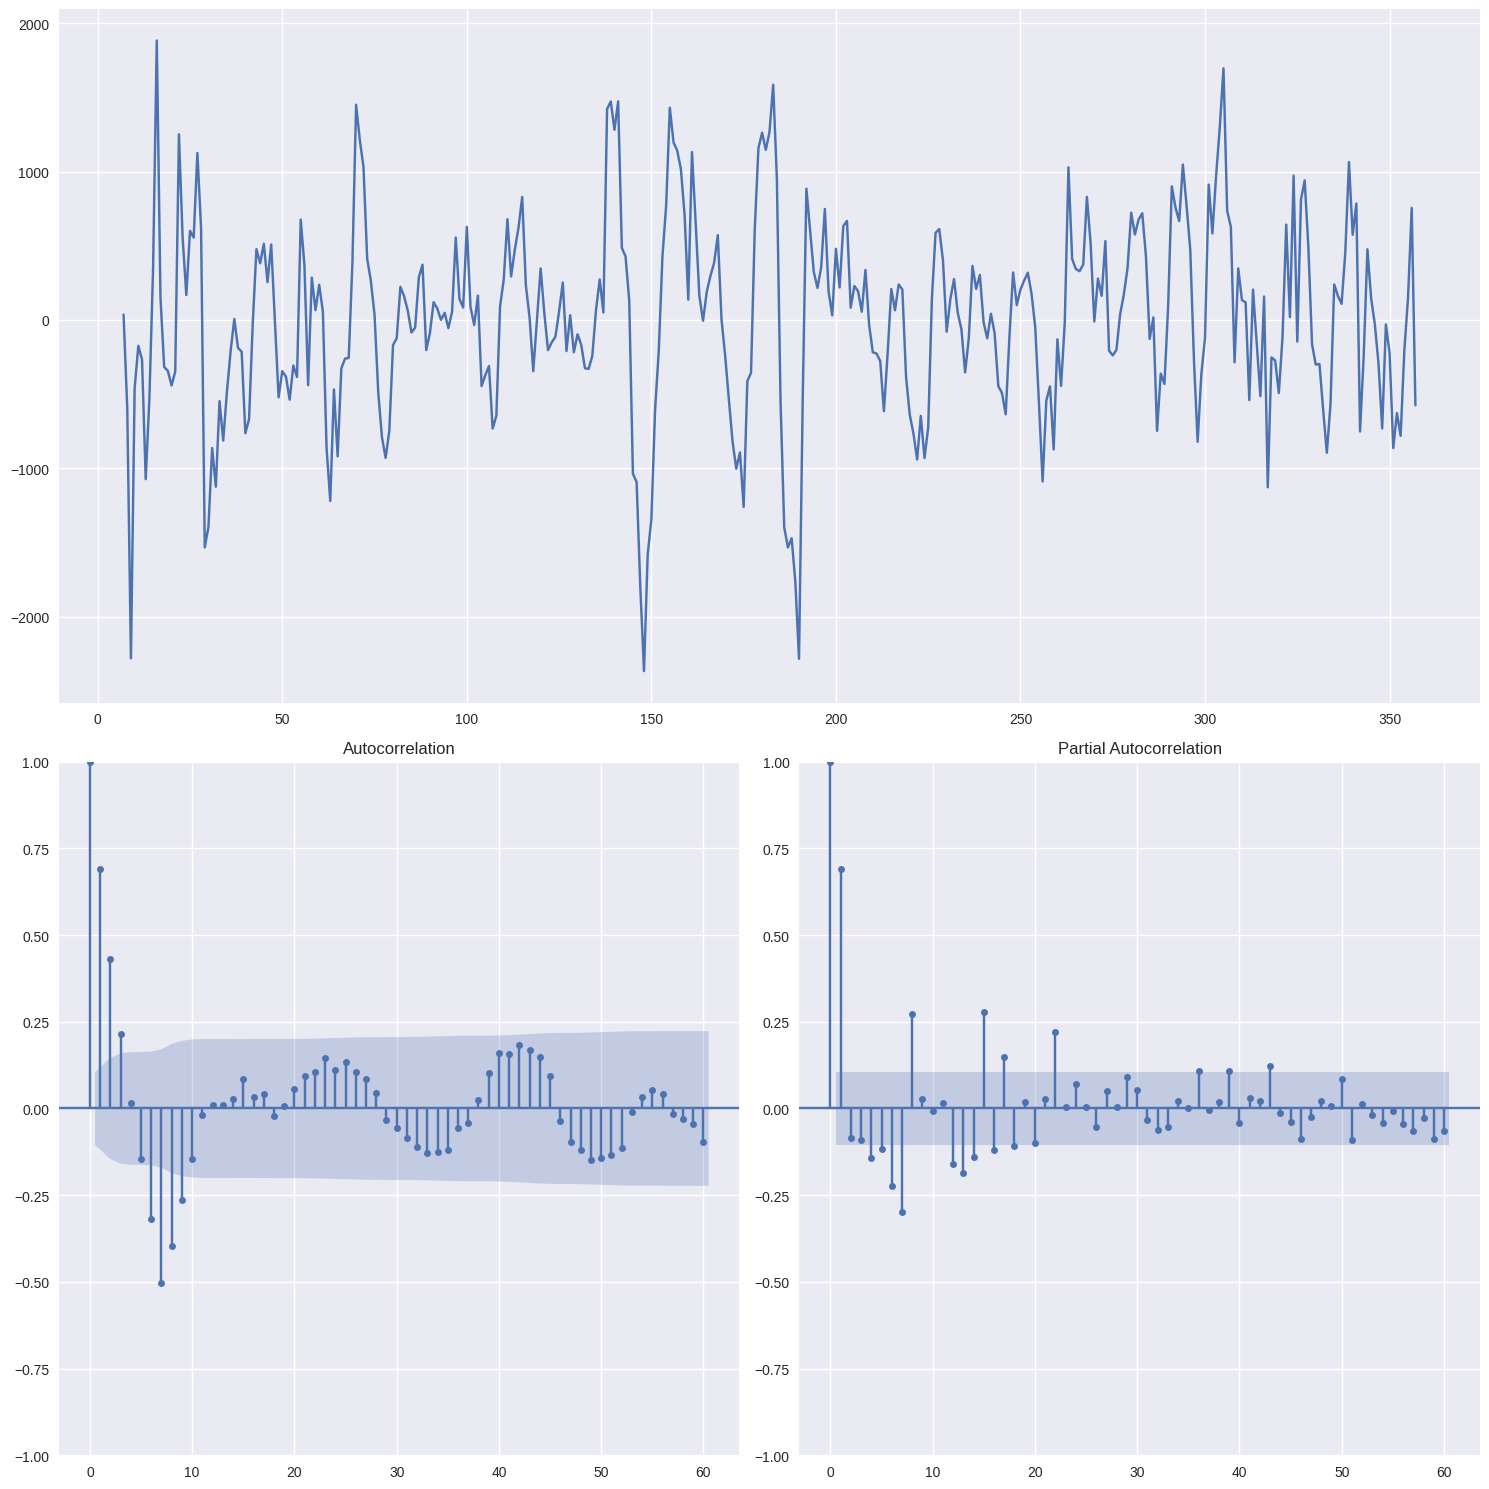

In [135]:
tsplot(diff,lags = 60)

In [136]:
check_stationarity(diff)

The series is stationary 8.353977292281274e-06 -5.210864567996726


In [137]:
ps = range(4, 5)
d = range(1, 2)
qs = range(2, 3)
p = 0
q = 4
Ps = range(6, 7)
D = range(0, 1)
Qs = range(0, 1)
P = 0
Q = 1
s = range(7,8)
parameters = product(ps,d, qs, Ps, D,Qs,s,)
parameters_list = list(parameters)
len(parameters_list)

1

In [138]:
def gs_arima(series, parameters_list, opt_method='powell'):
    results = []
    models = {}
    best_aic = float("inf")
    for param in parameters_list:
        print(param)
        model = sm.tsa.statespace.SARIMAX(
                series, temp,
                order=(param[0], param[1], param[2]),
                seasonal_order=(param[3], param[4], param[5], param[6]),enforce_stationarity=False).fit(method='powell', disp=False)
        x = model.predict(start=0,end=(len(series)-1),dynamic = False)
        rmse = np.sqrt(mean_squared_error(x,series))
        aic = model.aic
        print(rmse)
        results.append([param,rmse,aic])
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'rmse','aic']
    result_table = result_table.sort_values(by='rmse', ascending=True).reset_index(drop=True)
    return result_table

In [139]:
result_table = gs_arima(series,parameters_list)
result_table

(4, 1, 2, 6, 0, 0, 7)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


569.6728925127715


parameters        rmse          aic
0  (4, 1, 2, 6, 0, 0, 7)  569.672893  4523.637139

In [140]:
sar = pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/sarima.csv')
sar

Unnamed: 0.1  Unnamed: 0             parameters          rmse  \
0                0         NaN  (4, 1, 2, 6, 0, 0, 7)  6.567368e+02   
1                0         NaN  (4, 1, 2, 6, 0, 0, 7)  6.567368e+02   
2                0         NaN  (4, 1, 2, 5, 0, 0, 7)  6.579666e+02   
3                1         NaN  (4, 1, 2, 5, 0, 0, 7)  6.579666e+02   
4                2         NaN  (4, 1, 2, 8, 0, 0, 7)  6.588404e+02   
...            ...         ...                    ...           ...   
7789          7771      7771.0  (5, 2, 0, 2, 4, 4, 7)  3.578198e+10   
7790          7772      7772.0  (4, 4, 0, 0, 4, 1, 7)  2.424886e+11   
7791          7773      7773.0  (4, 4, 0, 0, 4, 3, 7)  5.454770e+12   
7792          7774      7774.0  (5, 4, 0, 1, 5, 0, 7)  1.788521e+15   
7793          7775      7775.0  (5, 4, 0, 1, 5, 1, 7)  1.213294e+16   

              aic  
0     4468.384189  
1     4468.384189  
2     4575.759668  
3     4575.759668  
4     4263.758103  
...           ...  
7789  1997.319152  
7790  2572.108724  
7791  2344.925184  
7792  1848.376908  
7793  1853.077180  

[7794 rows x 5 columns]

**SARIMA Without Temperature as Regressor**

In [141]:
model1 = sm.tsa.statespace.SARIMAX(
                series,
                order=(4, 1, 2),
                seasonal_order=(6, 0, 0,7)).fit(method='powell', disp=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 7.278471
         Iterations: 6
         Function evaluations: 816


In [142]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        TOTALDEMAND   No. Observations:                  358
Model:             SARIMAX(4, 1, 2)x(6, 0, [], 7)   Log Likelihood               -2605.693
Date:                            Sat, 07 Oct 2023   AIC                           5237.385
Time:                                    08:35:01   BIC                           5287.796
Sample:                                         0   HQIC                          5257.436
                                            - 358                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0132      3.201      0.004      0.997      -6.262       6.288
ar.L2          0.3622      2.241      0.162      0.872      -4.030       4.754
ar.L3         -0.0366      0.416     -0.088      0.930      -0.852       0.779
ar.L4          0.0224      0.183      0.123      0.902      -0.336       0.381
ma.L1         -0.2371      3.204     -0.074      0.941      -6.517       6.043
ma.L2         -0.6402      2.973     -0.215      0.829      -6.466       5.186
ar.S.L7        0.0602      0.062      0.972      0.331      -0.061       0.182
ar.S.L14       0.0927      0.055      1.700      0.089      -0.014       0.200
ar.S.L21       0.2309      0.054      4.250      0.000       0.124       0.337
ar.S.L28       0.1872      0.067      2.799      0.005       0.056       0.318
ar.S.L35       0.0178      0.064      0.276      0.783      -0.108       0.144
ar.S.L42       0.1560      0.070      2.223      0.026       0.018       0.294
sigma2      1.255e+05   7694.563     16.311      0.000     1.1e+05    1.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                90.84
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.30
Prob(H) (two-sided):                  0.64   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

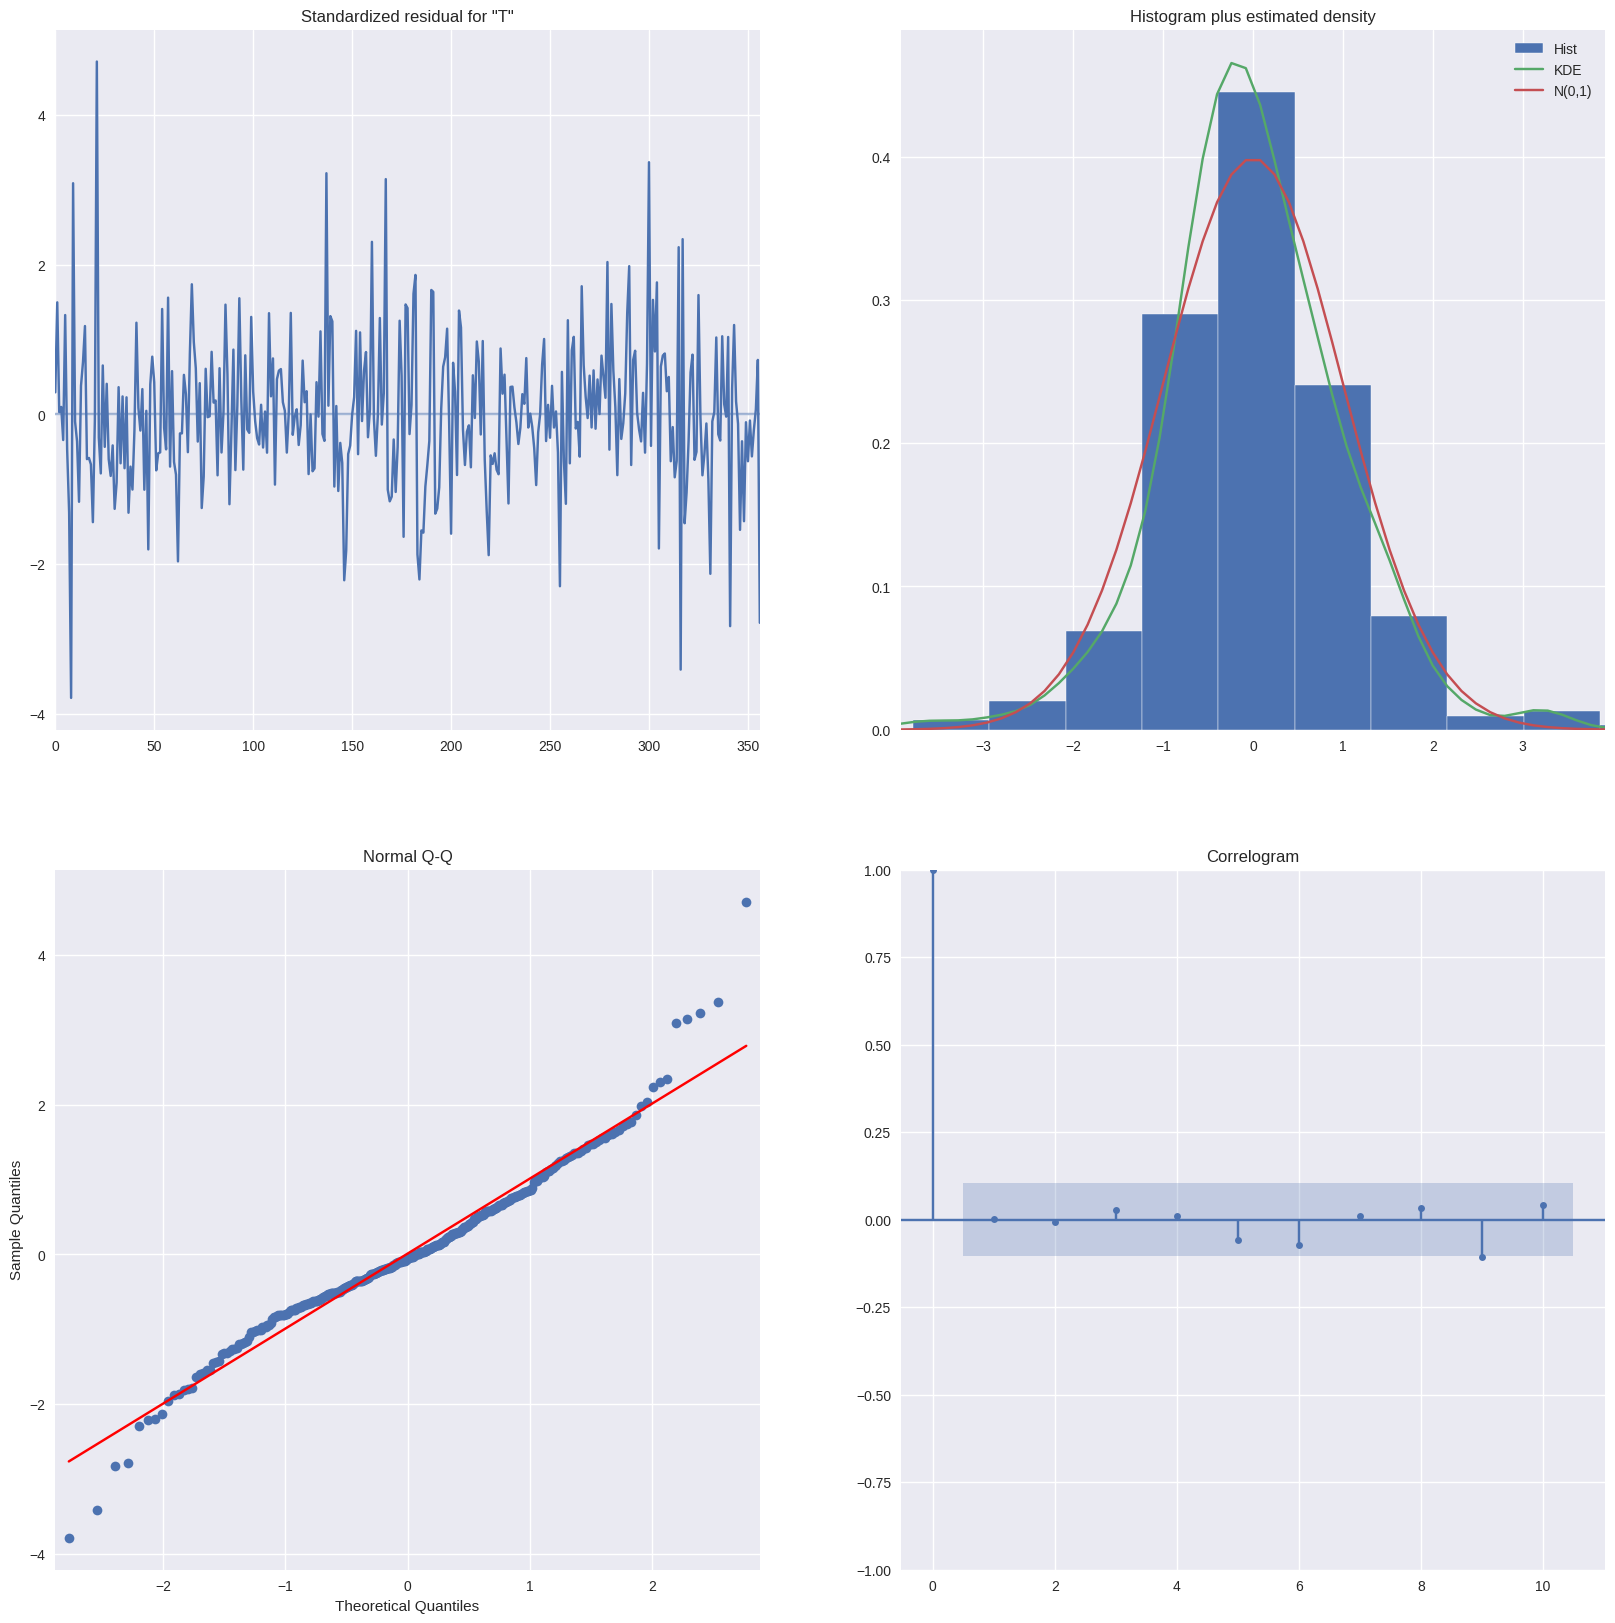

In [143]:
model1.plot_diagnostics(figsize=(20, 20))
plt.show()

In [144]:
df22['No R Predict'] = model1.predict(start=0,end=(len(series)-1),dynamic=False)

In [145]:
df22.replace(df22.iloc[0,4], df22.iloc[0,2], inplace=True)
df22

Date  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  No R Predict
0   2021-08-02     8329.244582  8090.591458    11.727083   8090.591458
1   2021-08-03     8302.990885  8081.596875    14.285417   7951.888590
2   2021-08-04     8628.430746  8451.799375    11.516667   7800.044456
3   2021-08-05     8427.555577  8232.330625    12.268750   8219.014760
4   2021-08-06     8156.890909  8027.922500    12.085417   7985.771927
..         ...             ...          ...          ...           ...
353 2022-07-28     8752.042205  8713.980833    12.420833   8912.480508
354 2022-07-29     9051.648260  8825.371458    11.479167   8897.158058
355 2022-07-30     8630.231246  8590.743125     8.725000   8567.175478
356 2022-07-31     8543.443221  8699.208125    10.525000   8441.288380
357 2022-08-01     8231.479437  8027.280000    12.100000   9012.864544

[358 rows x 5 columns]

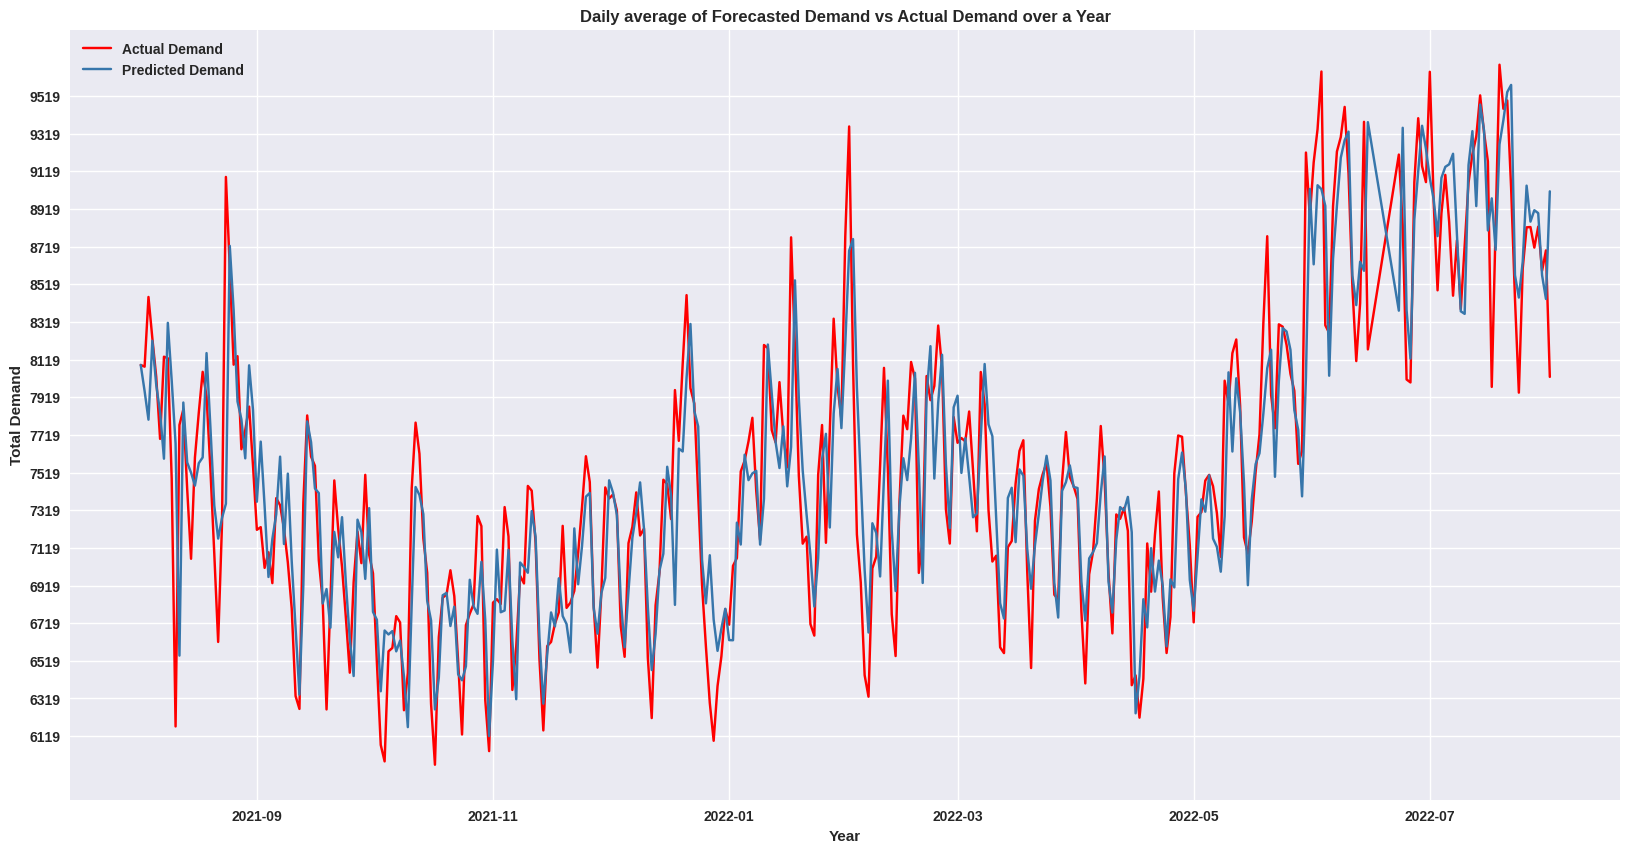

In [146]:
plt.figure(figsize=(20,10))
plt.plot(df22['Date'], df22['TOTALDEMAND'], label = "Actual Demand", color = 'r')
plt.plot(df22['Date'], df22['No R Predict'], label = "Predicted Demand", color = '#3776ab')
plt.xticks(fontweight='bold')
plt.yticks(np.arange(int(df22['No R Predict'].min()), int(df22['No R Predict'].max()), step=200),fontweight='bold')
plt.title('Daily average of Forecasted Demand vs Actual Demand over a Year',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Total Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()

**SARIMA Model Accuracy**

In [147]:
s = np.sqrt(abs(mean_squared_error(df22['TOTALDEMAND'],df22['No R Predict'])))
f = mean_absolute_error(df22['TOTALDEMAND'],df22['No R Predict'])
r = r2_score(df22['TOTALDEMAND'],df22['No R Predict'])
m = (mean_absolute_percentage_error(df22['TOTALDEMAND'],df22['No R Predict']))*100
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 360.13022919345207
MAE 263.1963694731041
MAPE 3.490723064153034
R2 0.8073876921630314


**SARIMA With Temperature as Regressor**

In [148]:
model2 = sm.tsa.statespace.SARIMAX(
                series,temp,
                order=(4, 1, 2),
                seasonal_order=(6, 0, 0,7),time_varying_regression = True, mle_regression = False).fit(method='powell', disp=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 7.140498
         Iterations: 8
         Function evaluations: 1154


In [149]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        TOTALDEMAND   No. Observations:                  358
Model:             SARIMAX(4, 1, 2)x(6, 0, [], 7)   Log Likelihood               -2556.298
Date:                            Sat, 07 Oct 2023   AIC                           5140.597
Time:                                    08:35:41   BIC                           5194.846
Sample:                                         0   HQIC                          5162.176
                                            - 358                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1              -0.0038      3.297     -0.001      0.999      -6.465       6.458
ar.L2               0.1657      1.052      0.158      0.875      -1.895       2.227
ar.L3               0.1352      0.315      0.429      0.668      -0.483       0.754
ar.L4               0.0952      0.425      0.224      0.823      -0.738       0.928
ma.L1              -0.3180      0.084     -3.781      0.000      -0.483      -0.153
ma.L2              -0.0960      1.052     -0.091      0.927      -2.158       1.966
ar.S.L7            -0.3144      0.181     -1.733      0.083      -0.670       0.041
ar.S.L14           -0.2843      0.157     -1.810      0.070      -0.592       0.024
ar.S.L21            0.1483      0.104      1.432      0.152      -0.055       0.351
ar.S.L28            0.7321      0.097      7.534      0.000       0.542       0.923
ar.S.L35            0.3035      0.170      1.784      0.074      -0.030       0.637
ar.S.L42            0.4101      0.180      2.283      0.022       0.058       0.762
var.TEMPERATURE    54.2559     16.472      3.294      0.001      21.972      86.540
sigma2           6.456e+04   7147.448      9.032      0.000    5.05e+04    7.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):                43.48
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.34
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

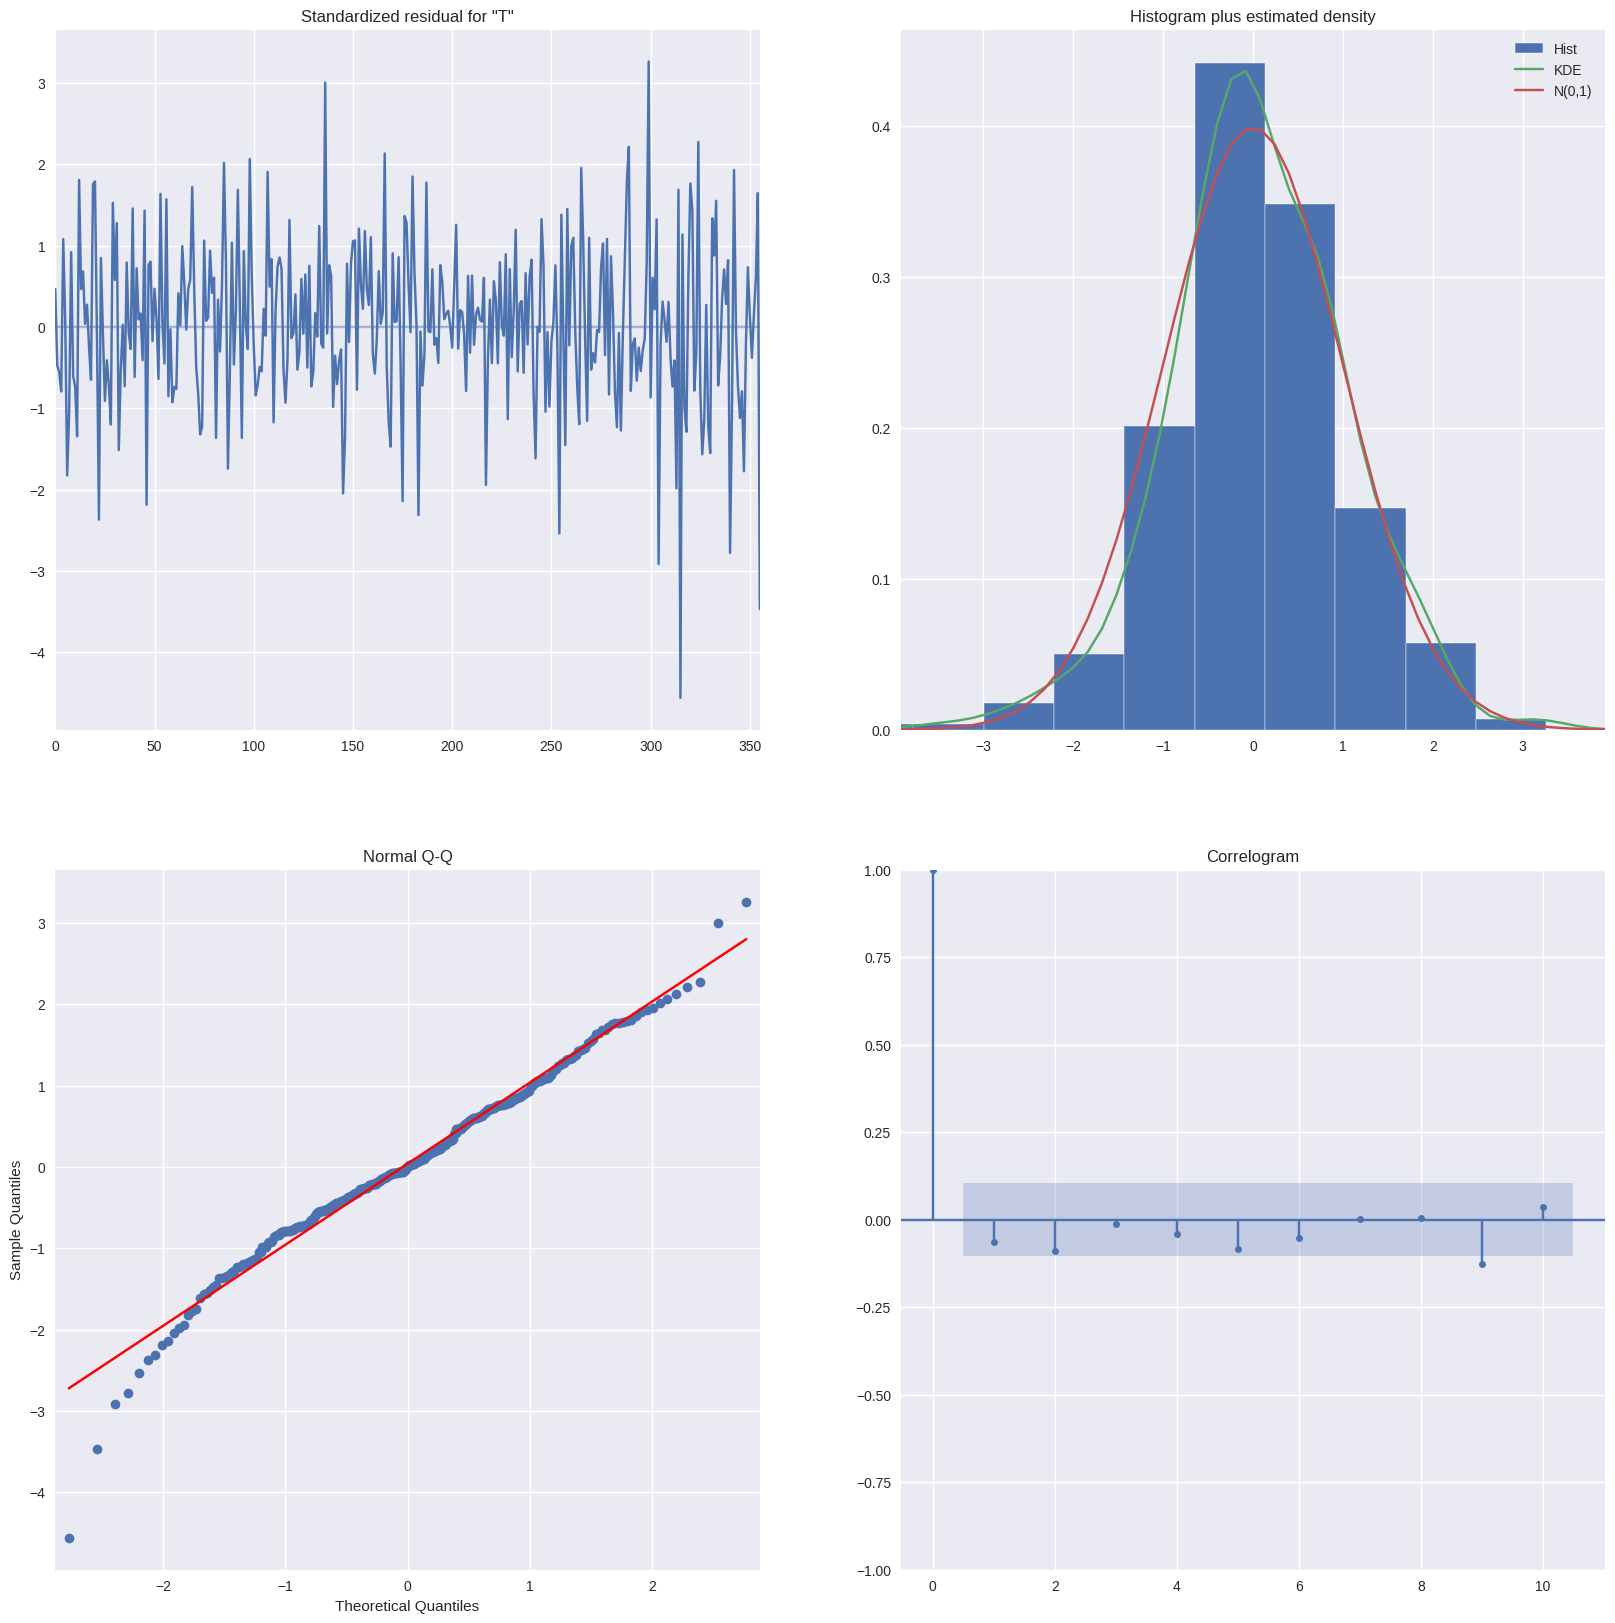

In [150]:
model2.plot_diagnostics(figsize=(20, 20))
plt.show()

In [151]:
df22['With R Predict'] = model2.predict(start=0,end=(len(series)-1),dynamic=False, exog = df22['TEMPERATURE'])

In [152]:
df22.replace(df22.iloc[0,5], df22.iloc[0,2], inplace=True)
df22

Date  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  No R Predict  \
0   2021-08-02     8329.244582  8090.591458    11.727083   8090.591458   
1   2021-08-03     8302.990885  8081.596875    14.285417   7951.888590   
2   2021-08-04     8628.430746  8451.799375    11.516667   7800.044456   
3   2021-08-05     8427.555577  8232.330625    12.268750   8219.014760   
4   2021-08-06     8156.890909  8027.922500    12.085417   7985.771927   
..         ...             ...          ...          ...           ...   
353 2022-07-28     8752.042205  8713.980833    12.420833   8912.480508   
354 2022-07-29     9051.648260  8825.371458    11.479167   8897.158058   
355 2022-07-30     8630.231246  8590.743125     8.725000   8567.175478   
356 2022-07-31     8543.443221  8699.208125    10.525000   8441.288380   
357 2022-08-01     8231.479437  8027.280000    12.100000   9012.864544   

     With R Predict  
0       8090.591458  
1       9842.861042  
2       8090.324294  
3       8455.691175  
4       8282.363722  
..              ...  
353     8822.664413  
354     8785.105498  
355     8412.938074  
356     8229.996305  
357     9036.704209  

[358 rows x 6 columns]

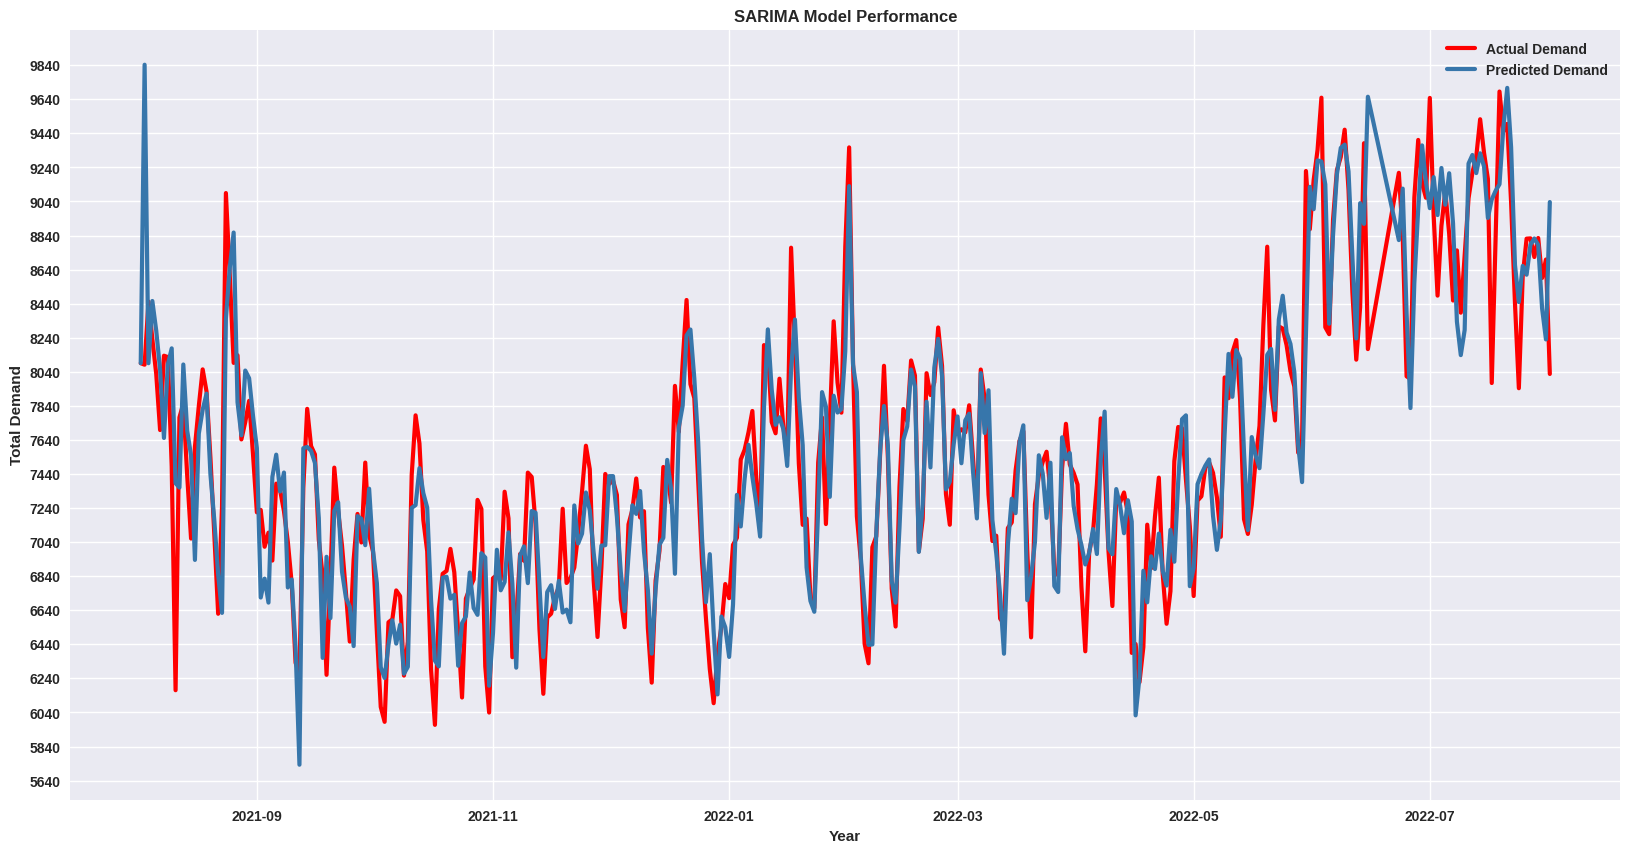

In [153]:
plt.figure(figsize=(20,10))
plt.plot(df22['Date'], df22['TOTALDEMAND'], label = "Actual Demand", color = 'r', linewidth = 3)
plt.plot(df22['Date'], df22['With R Predict'], label = "Predicted Demand", color = '#3776ab',linewidth = 3)
plt.xticks(fontweight='bold')
plt.yticks(np.arange(int(df22['With R Predict'].min())-93, int(df22['With R Predict'].max())+7, step=200),fontweight='bold')
plt.title('SARIMA Model Performance',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Total Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()

**SARIMA Model Accuracy**

In [154]:
s = np.sqrt(abs(mean_squared_error(df22['TOTALDEMAND'],df22['With R Predict'])))
f = mean_absolute_error(df22['TOTALDEMAND'],df22['With R Predict'])
r = r2_score(df22['TOTALDEMAND'],df22['With R Predict'])
m = (mean_absolute_percentage_error(df22['TOTALDEMAND'],df22['With R Predict']))*100
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 337.79792791966975
MAE 247.55377788144224
MAPE 3.3004618071107537
R2 0.8305354578686384


**AMEO Model Accuracy**

In [155]:
s = np.sqrt(abs(mean_squared_error(df22['TOTALDEMAND'],df22['FORECASTDEMAND'])))
f = mean_absolute_error(df22['TOTALDEMAND'],df22['FORECASTDEMAND'])
r = r2_score(df22['TOTALDEMAND'],df22['FORECASTDEMAND'])
m = (mean_absolute_percentage_error(df22['TOTALDEMAND'],df22['FORECASTDEMAND']))*100
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)
print('RMSE:',s)
print('MAE:',f)
print('R2:',r)

RMSE: 138.76358120854775
MAE 107.04402402428435
MAPE 1.4099426188454258
R2 0.9714033026412118
RMSE: 138.76358120854775
MAE: 107.04402402428435
R2: 0.9714033026412118


**LSTM MODEL**

In [156]:
fc = pd.read_csv('/content/drive/MyDrive/DS Project/Data/forecastdemand_nsw.csv')
ac = pd.read_csv('/content/drive/MyDrive/DS Project/Data/totaldemand_nsw.csv')
temp = pd.read_csv('/content/drive/MyDrive/DS Project/Data/temperature_nsw.csv')

In [162]:
fc['DATETIME'] = pd.to_datetime(fc['DATETIME'])
daily_fc = fc.resample('D', on = 'DATETIME').mean()
ac['DATETIME'] = pd.to_datetime(ac['DATETIME'])
daily_ac = ac.resample('D', on = 'DATETIME').mean()
temp['DATETIME'] = pd.to_datetime(temp['DATETIME'])
daily_temp = temp.resample('D', on = 'DATETIME').mean()
all = daily_fc.merge(daily_ac,on='DATETIME').merge(daily_temp,on='DATETIME')

<ipython-input-162-bd21885a162b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_fc = fc.resample('D', on = 'DATETIME').mean()
<ipython-input-162-bd21885a162b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_ac = ac.resample('D', on = 'DATETIME').mean()


In [163]:
dataset = all
# convert to daily by taking the mean
dataset = dataset.reset_index()
dataset['DATETIME'] = pd.to_datetime(dataset['DATETIME'])
dataset = dataset.resample('D', on = 'DATETIME').mean()
# Add time features
orig = dataset.reset_index()
orig['DATETIME'] = pd.to_datetime(orig['DATETIME'])
orig['Month'] = orig['DATETIME'].dt.month_name()
orig['Day'] = orig['DATETIME'].dt.day_name()
# Convert date to datetime format
orig = pd.get_dummies(orig)
# Subset the data further for fast processing in colab, later will add some more historical data to the model
df_uni = orig[(orig['DATETIME'] >= '2014-01-01') ]
# prepare univariate model data
df_uni = df_uni[['DATETIME', 'TOTALDEMAND']]
df_uni = df_uni[(df_uni['DATETIME'] >= '2014-01-01')]
df_uni = df_uni.set_index('DATETIME')
# prepare multivariate model with temp as the predictor
df_multi_te = orig[['DATETIME', 'TOTALDEMAND','TEMPERATURE']]
df_multi_te = df_multi_te[(df_multi_te['DATETIME'] >= '2014-01-01')]
df_multi_te = df_multi_te.set_index('DATETIME')
# prepare multivariate model with time features and temperature
df_multi_all = orig
df_multi_all = df_multi_all[(df_multi_all['DATETIME'] >= '2014-01-01')]
df_multi_all1 = df_multi_all[['DATETIME', 'TOTALDEMAND','FORECASTDEMAND']]
df_multi_all = df_multi_all[['DATETIME', 'TOTALDEMAND','TEMPERATURE', 'Day_Monday', 'Day_Tuesday', 'Day_Wednesday','Day_Thursday','Day_Friday','Day_Saturday','Day_Sunday','Month_January','Month_February','Month_March',
                             'Month_April','Month_May','Month_June','Month_July','Month_August','Month_September','Month_October',
                             'Month_November','Month_December']]
# prepare multivariate model with time features only
df_multi_tim= df_multi_all[['DATETIME', 'TOTALDEMAND','Day_Monday', 'Day_Tuesday', 'Day_Wednesday','Day_Thursday','Day_Friday','Day_Saturday','Day_Sunday','Month_January','Month_February','Month_March',
                             'Month_April','Month_May','Month_June','Month_July','Month_August','Month_September','Month_October',
                             'Month_November','Month_December']]
# reset index
df_multi_all = df_multi_all.set_index('DATETIME')
df_multi_tim = df_multi_tim.set_index('DATETIME')

In [164]:
def learning(file):
  # Set up training data and test data
  # scale the data first
  scaler = MinMaxScaler()
  scaler = scaler.fit(file.values)
  data1 = scaler.transform(file.values)
  # split into standard weeks
  # train data: 2017-01-03 to 2020-12-28 and test: 2020-12-29 to 2022-08-01 First Tuesday to last Wednesday
  train, test = data1[1098:2554],data1[2554:3150]
  # restructure into windows of weekly data
  train = array(split(train, len(train)/7))
  test = array(split(test, len(test)/7))
  n_input = 7 # Specify how much data we want to look back for prediction
  n_out = 7   # Specify how much multi-step data we want to forecast
  # In this project, we will lookback on 7 (temp) past data, to forecast future 7 multi-step ahead of data.
  # y is the demand being predicted. the first array is the 7 days from the 8th sample in data, the 2nd array is the 7 days from the 9th sample.
  # convert history into inputs and outputs
  def to_supervised(train, n_input, n_out=7):
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
      # define the end of the input sequence
      in_end = in_start + n_input
      out_end = in_end + n_out
      # ensure we have enough data for this instance
      if out_end <= len(data):
        X.append(data[in_start:in_end, :])
        y.append(data[in_end:out_end, 0])
      # move along one time step
      in_start += 1
    return array(X), array(y)
  # train the model
  def build_model(train, n_input):
    # prepare data
    # here the data is split to train_x which holds data with more than 1 features and train_y holds data with 1 feature and is the Y value (future values of demand)
    train_x, train_y = to_supervised(train, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 50, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    # define model
    # Encoder-Decoder LSTM
    model = Sequential()
    model.add(LSTM(150, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    #model.add(Dropout(0.2))
    model.add(TimeDistributed(Dense(200, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay = 1e-6)
    model.compile(loss='mse', optimizer=opt)
    # fit network
    model.fit(train_x, train_y,  epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model
  # fit model
  model = build_model(train, n_input)
  # history is a list of weekly data
  history = [x for x in train]
  def forecast(model, history, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    # retrieve last observations for input data
    input_x = data[-n_input:, :]
    # reshape into [1, n_input, n]
    input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
    # forecast the next week
    # input_x comes from the training data and is fed into the model for prediction
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat
  # prediction is made by iterating the test data repeatedly
  # walk-forward validation over each week
  predictions = list()
  for i in range(len(test)):
    # predict the week
    # you can see that the forecast function is used here
    # creating corresponding forecast for every week of the test data by
    # looking back n_input days in the past
    yhat_sequence = forecast(model, history, n_input)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next week
    history.append(test[i, :])
  # evaluate predictions days for each week
  # predictions will output an array with repeated contents
  predictions = array(predictions)
  # invert predictions (make many copies as long as the test data coz that is what we are comparing this with)
  inverted_predictions = list()
  for i in range(len(predictions)):
    # create array from forecast
    forecast = array(predictions[i])
    # invert scaling
    forecast_copies = np.repeat(forecast, file.shape[1], axis = -1)
    inv_scale = scaler.inverse_transform(forecast_copies)[:,0]
    #inv_scale = inv_scale[0, :]
    inverted_predictions.append(inv_scale)
  # Evaluate predictions
  # Set up test and predicted data
  # use actual test data
  a = file[2554:3150]
  b = np.array(a)[:,0]
  actual = b.reshape(83,7)
  pred = np.array(inverted_predictions)
  # Metrics for individual days
  scores_RMSE = list()
  scores_MAE = list()
  scores_MAPE = list()
  scores_R2 = list()
  # calculate an evaluation metrics for each day
  # range is from 0 to 7
  for i in range(actual.shape[1]):
    # calculate mse: There are 51 individual values for each day which will produce an  MSE for each day
    mse = metrics.mean_squared_error(actual[:,i], pred[:,i])
    mae = metrics.mean_absolute_error(actual[:,i], pred[:,i])
    mape = metrics.mean_absolute_percentage_error(actual[:,i], pred[:,i])
    r2 = metrics.r2_score(actual[:,i], pred[:,i])
    # calculate rmse
    rmse = sqrt(mse)
    # store
    scores_RMSE.append(rmse)
    scores_MAE.append(mae)
    scores_MAPE.append(mape)
    scores_R2.append(r2)
  # Metrics for overall model
  # mean of actual data
  m = 0
  # there are 51 rows
  for row in range(actual.shape[0]):
    # there are 7 cols
    for col in range(actual.shape[1]):
      m += actual[row, col]
  mn = m/(actual.shape[0] * pred.shape[1])
  s = 0
  y = 0
  z = 0
  x = 0
  w = 0
  # there are 51 rows
  for row in range(actual.shape[0]):
    # there are 7 cols
    for col in range(actual.shape[1]):
      s += (actual[row, col] - pred[row, col])**2
      y += abs(actual[row, col] - pred[row, col])
      z += abs(actual[row, col] - pred[row, col])/actual[row, col]
      m += actual[row, col]
      x += ((actual[row, col] - pred[row, col])**2)
      w += ((actual[row, col] - mn)**2)
  score_RMSE = sqrt(s / (actual.shape[0] * pred.shape[1]))
  score_MAE = y/(actual.shape[0] * pred.shape[1])
  score_MAPE = z/(actual.shape[0] * pred.shape[1])
  score_R2 = 1-(x/w)
  s_scores = ', '.join(['%.1f' % s for s in scores_RMSE])
  print('%s: [%.3f] %s' % ('RMSE', score_RMSE, s_scores))
  # plot scores
  days = ['tue', 'wed', 'thr', 'fri', 'sat','sun', 'mon']
  plt.figure(figsize=(6,3))
  pyplot.plot(days, scores_RMSE, marker='o', label='RMSE')
  pyplot.show()
  s_scores = ', '.join(['%.1f' % s for s in scores_MAE])
  print('%s: [%.3f] %s' % ('MAE', score_MAE, s_scores))
  # plot scores
  days = ['tue', 'wed', 'thr', 'fri', 'sat','sun', 'mon']
  plt.figure(figsize=(6,3))
  pyplot.plot(days, scores_MAE, marker='o', label='MAE')
  pyplot.show()
  s_scores = ', '.join(['%.1f' % s for s in scores_MAPE])
  print('%s: [%.3f] %s' % ('MAPE', score_MAPE,  s_scores))
  # plot scores
  days = ['tue', 'wed', 'thr', 'fri', 'sat','sun', 'mon']
  plt.figure(figsize=(6,3))
  pyplot.plot(days, scores_MAPE, marker='o', label='MAPE')
  pyplot.show()
  s_scores = ', '.join(['%.1f' % s for s in scores_R2])
  print('%s: [%.3f] %s' % ('R2',  score_R2, s_scores))
  # plot scores
  days = ['tue', 'wed', 'thr', 'fri', 'sat','sun', 'mon']
  plt.figure(figsize=(6,3))
  pyplot.plot(days, scores_R2, marker='o', label='R2')
  pyplot.show()
  # Plot training data
  df = file.reset_index()
  # Separate dates for future plotting, we will have this in the x axis
  train_dates = df[['DATETIME']]
  train_dates = pd.to_datetime(train_dates['DATETIME'])
  test_dates = df[2800:]
  test_dates = pd.to_datetime(test_dates['DATETIME'])
  forecast_period_dates = pd.date_range(list(test_dates)[1], periods = len(pred[35:83])*7, freq = '1d').tolist()
  # Convert timestamp to date
  forecast_dates = []
  for time_i in forecast_period_dates:
      forecast_dates.append(time_i.date())
  pred1 = pred[35:83]
  flat = pred1.flatten()
  df_forecast = pd.DataFrame({'DATETIME':np.array(forecast_dates), 'PREDICTEDDEMAND': flat})
  df_forecast['DATETIME'] = pd.to_datetime(df_forecast['DATETIME'])
  original = df[['DATETIME', 'TOTALDEMAND']]
  original['DATETIME'] = pd.to_datetime(original['DATETIME'])
  original = original.loc[original['DATETIME'] >= '2021-09-01']
  # Plot forecasts against training data
  orig_for_plot = original[['DATETIME', 'TOTALDEMAND']]
  plt.figure(figsize=(12,6))
  plt.plot(orig_for_plot['DATETIME'], orig_for_plot['TOTALDEMAND'], color = 'purple')
  plt.plot(df_forecast['DATETIME'], df_forecast['PREDICTEDDEMAND'], color = 'orange')
  # 7-day prediction
  history = [x for x in test]
  # flatten data
  data = array(history)
  data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
  # retrieve last observations for input data
  input_x = data[-n_input:, :]
  # reshape into [1, n_input, n]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  # # forecast the next week
  # # input_x comes from the training data and is fed into the model for prediction
  yhat = model.predict(input_x, verbose=0)
  predictions = yhat
  inverted_predictions = list()
  for i in range(len(predictions)):
    # create array from forecast
    forecast = array(predictions[i])
    # invert scaling
    forecast_copies = np.repeat(forecast, file.shape[1], axis = -1)
    inv_scale = scaler.inverse_transform(forecast_copies)[:,0]
    #inv_scale = inv_scale[0, :]
    inverted_predictions.append(inv_scale)
  print(inverted_predictions)

**Model 1: Predict future demand using Temperature as an explanatory variable**

Run model

RMSE: [521.797] 443.5, 446.6, 487.1, 502.9, 512.1, 637.1, 592.8


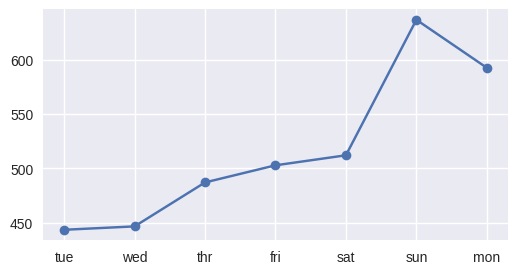

MAE: [409.836] 332.3, 335.8, 386.2, 397.2, 412.7, 522.3, 482.5


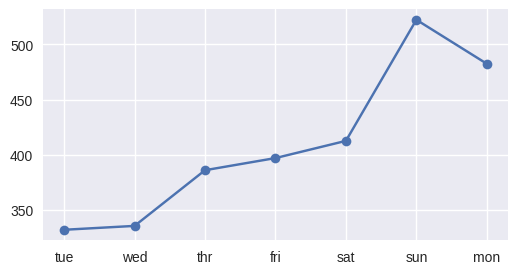

MAPE: [0.055] 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1


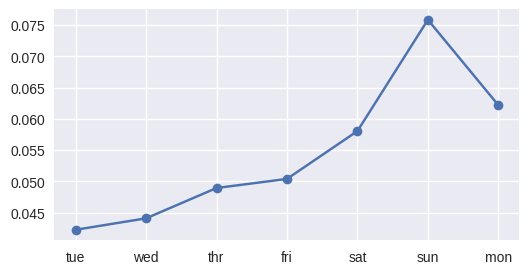

R2: [0.606] 0.7, 0.7, 0.6, 0.6, 0.5, 0.3, 0.5


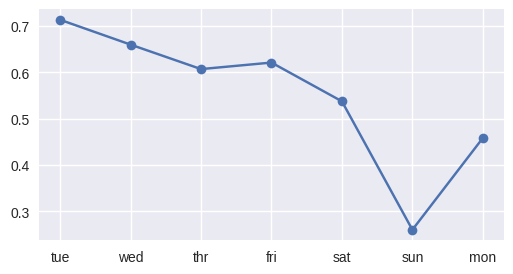

<ipython-input-164-cb5dd98b1be4>:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['DATETIME'] = pd.to_datetime(original['DATETIME'])


[array([8361.044, 8729.074, 8837.93 , 8801.756, 8617.001, 8384.726,
       8176.104], dtype=float32)]


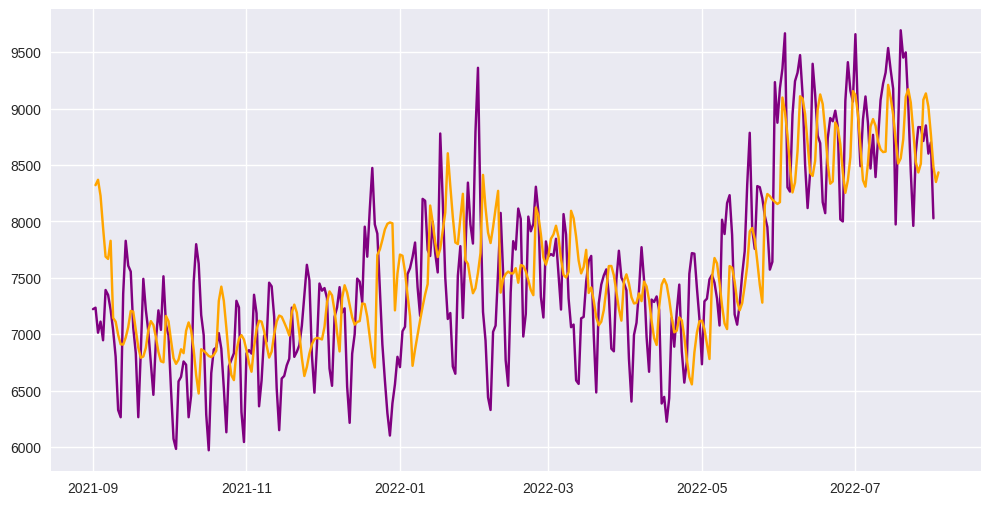

In [165]:
learning(df_multi_te)

Plot training and validation loss

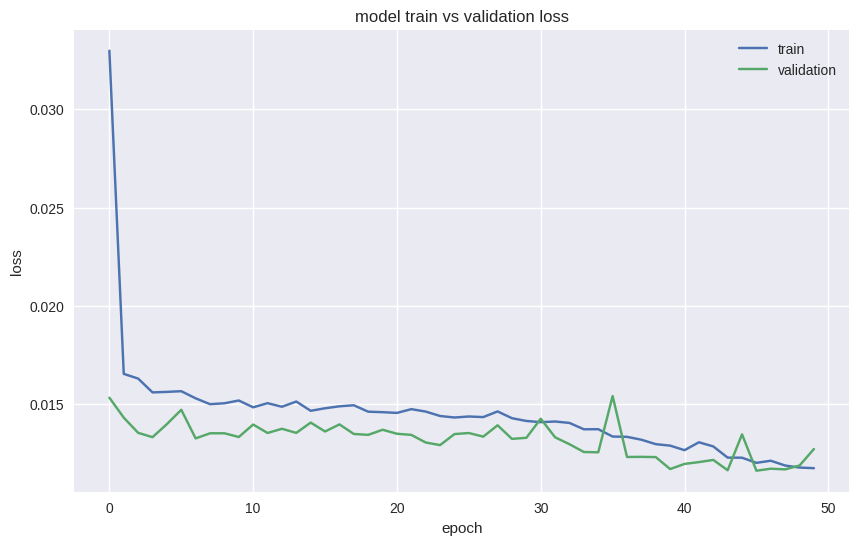

In [166]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_multi_te.values)
data1 = scaler.transform(df_multi_te.values)
# split into standard weeks
# train data: 2017-01-03 to 2020-12-28 and test: 2020-12-29 to 2022-08-01 First Tuesday to last Wednesday
train, test = data1[1098:2554],data1[2554:3150]
# restructure into windows of weekly data
train = array(split(train, len(train)/7))
test = array(split(test, len(test)/7))
n_input = 7 # Specify how much data we want to look back for prediction
n_out = 7   # Specify how much multi-step data we want to forecast

def to_supervised(train, n_input, n_out=7):
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
      # define the end of the input sequence
      in_end = in_start + n_input
      out_end = in_end + n_out
      # ensure we have enough data for this instance
      if out_end <= len(data):
        X.append(data[in_start:in_end, :])
        y.append(data[in_end:out_end, 0])
      # move along one time step
      in_start += 1
    return array(X), array(y)
# here the data is split to train_x which holds data with 2 features and train_y holds data with 1 feature and is the Y value (future values of demand)
test_x, test_y = to_supervised(test, n_input)
train_x, train_y = to_supervised(train, n_input)
# define parameters
verbose, epochs, batch_size = 0, 50, 16
# timesteps = 7, features = 2 , outputs = 7
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# reshape output into [samples, timesteps, features]
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
# define model
# Encoder-Decoder LSTM
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(200, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay = 1e-6)
#opt = 'sgd'
model.compile(loss='mse', optimizer=opt)
# fit network
history = model.fit(train_x, train_y,  epochs=epochs, validation_data = (test_x, test_y), batch_size=batch_size, verbose=verbose)
#mod = build_model(train, n_input)
loss = history.history.get('loss')
accuracy = history.history.get('accuracy')
plt.figure(figsize=(10,6))
# plot train and validation loss
pyplot.plot(loss)
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

**Model 2 : Predict future demand using Temperature, Days and Months**


Run model

RMSE: [601.928] 472.8, 556.6, 637.5, 673.2, 618.9, 564.3, 664.6


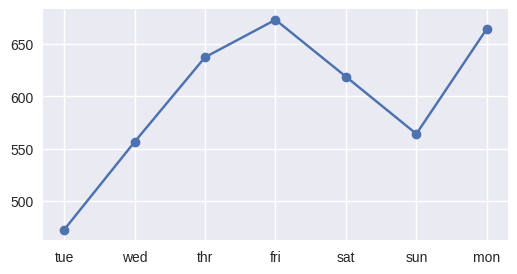

MAE: [435.839] 351.4, 409.3, 462.6, 464.9, 429.8, 430.3, 502.6


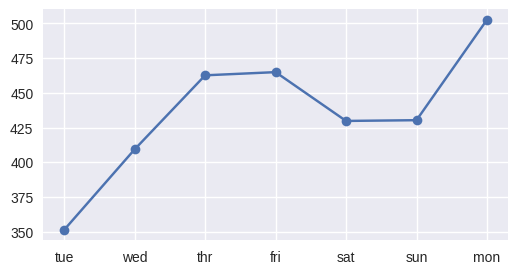

MAPE: [0.059] 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1


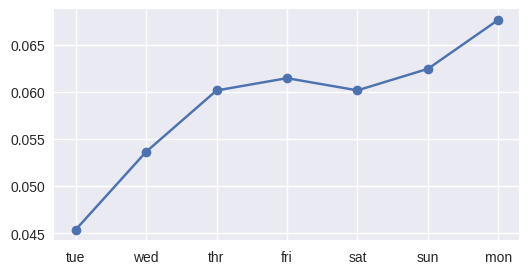

R2: [0.476] 0.7, 0.5, 0.3, 0.3, 0.3, 0.4, 0.3


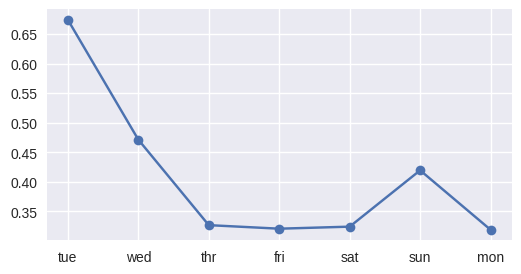

<ipython-input-164-cb5dd98b1be4>:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['DATETIME'] = pd.to_datetime(original['DATETIME'])


[array([8662.951 , 8668.909 , 8816.068 , 8898.952 , 8409.184 , 8162.0938,
       8816.63  ], dtype=float32)]


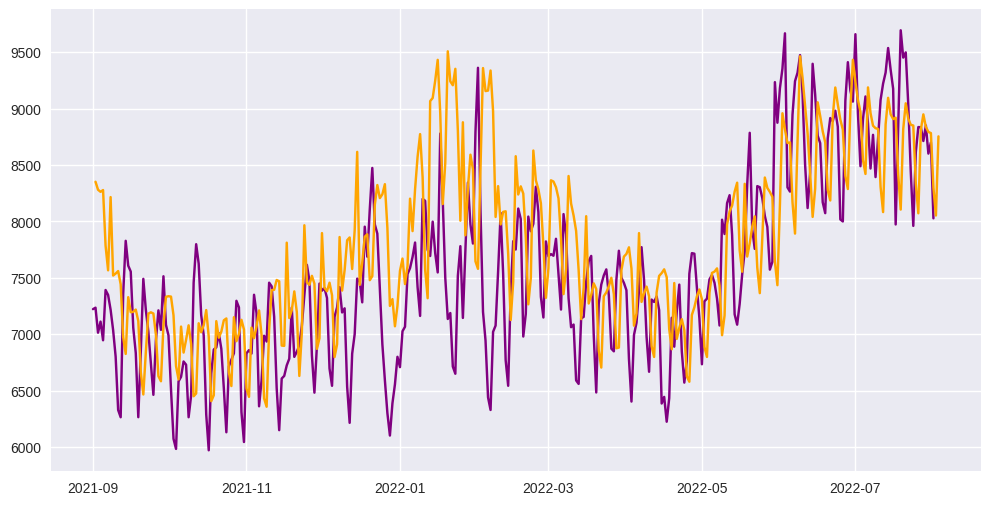

In [167]:
learning(df_multi_all)

Plot training and validation loss

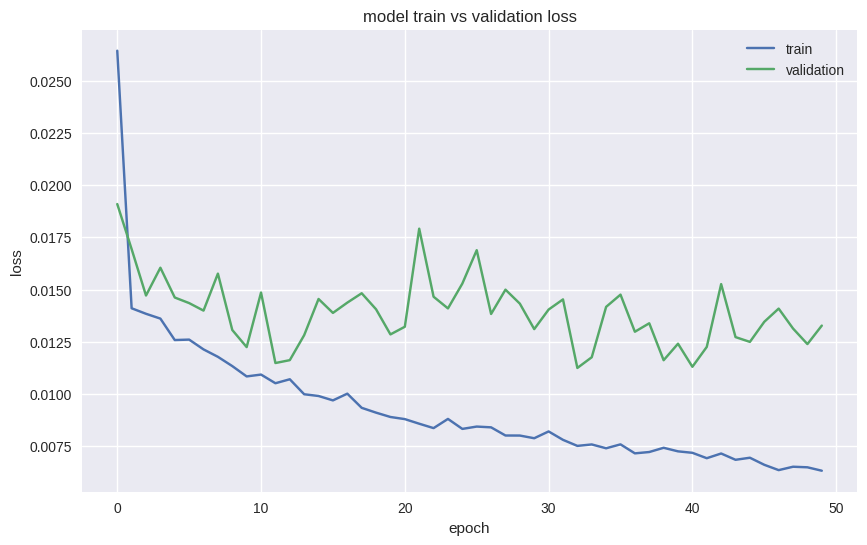

In [168]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_multi_all.values)
data1 = scaler.transform(df_multi_all.values)
# split into standard weeks
# train data: 2017-01-03 to 2020-12-28 and test: 2020-12-29 to 2022-08-01 First Tuesday to last Wednesday
train, test = data1[1098:2554],data1[2554:3150]
# restructure into windows of weekly data
train = array(split(train, len(train)/7))
test = array(split(test, len(test)/7))
n_input = 7 # Specify how much data we want to look back for prediction
n_out = 7   # Specify how much multi-step data we want to forecast

def to_supervised(train, n_input, n_out=7):
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
      # define the end of the input sequence
      in_end = in_start + n_input
      out_end = in_end + n_out
      # ensure we have enough data for this instance
      if out_end <= len(data):
        X.append(data[in_start:in_end, :])
        y.append(data[in_end:out_end, 0])
      # move along one time step
      in_start += 1
    return array(X), array(y)
# here the data is split to train_x which holds data with 2 features and train_y holds data with 1 feature and is the Y value (future values of demand)
test_x, test_y = to_supervised(test, n_input)
train_x, train_y = to_supervised(train, n_input)
# define parameters
verbose, epochs, batch_size = 0, 50, 16
# timesteps = 7, features = 2 , outputs = 7
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# reshape output into [samples, timesteps, features]
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
# define model
# Encoder-Decoder LSTM
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(200, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay = 1e-6)
#opt = 'sgd'
model.compile(loss='mse', optimizer=opt)
# fit network
history = model.fit(train_x, train_y,  epochs=epochs, validation_data = (test_x, test_y), batch_size=batch_size, verbose=verbose)

#mod = build_model(train, n_input)
loss = history.history.get('loss')
accuracy = history.history.get('accuracy')
plt.figure(figsize=(10,6))
# plot train and validation loss
pyplot.plot(loss)
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

**Model 3: Predict future demand using Days and Months**


Run Model

RMSE: [581.275] 450.6, 544.8, 658.0, 701.8, 556.1, 494.0, 621.8


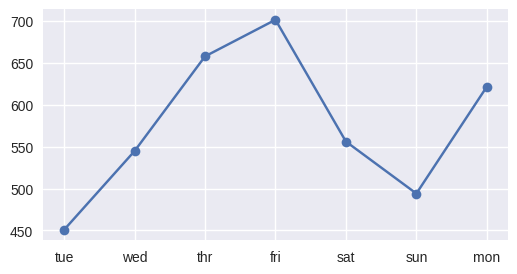

MAE: [428.685] 336.0, 412.7, 481.1, 508.7, 403.9, 377.4, 481.0


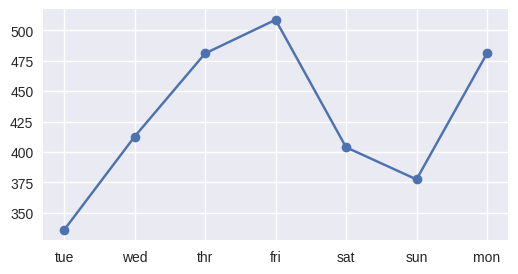

MAPE: [0.057] 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1


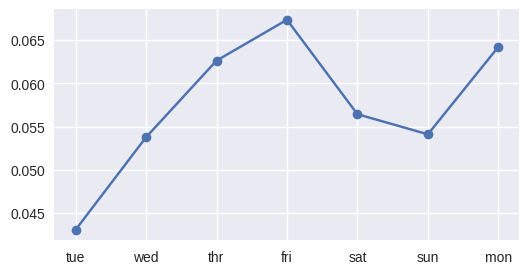

R2: [0.511] 0.7, 0.5, 0.3, 0.3, 0.5, 0.6, 0.4


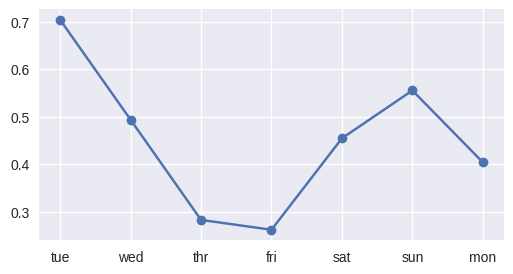

<ipython-input-164-cb5dd98b1be4>:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['DATETIME'] = pd.to_datetime(original['DATETIME'])


[array([8507.914 , 8595.8   , 8727.925 , 8802.122 , 8427.843 , 8139.4526,
       8601.938 ], dtype=float32)]


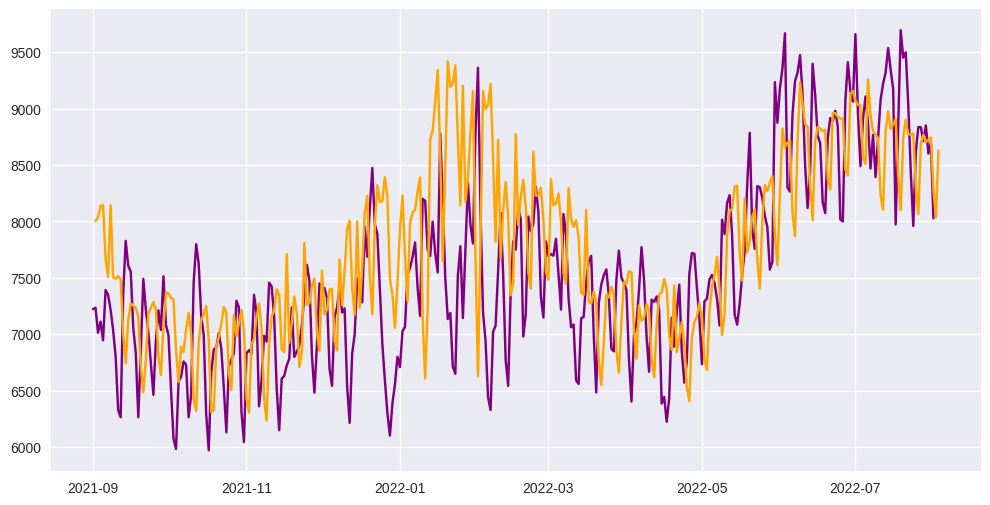

In [169]:
learning(df_multi_tim)

Plot training and validation loss

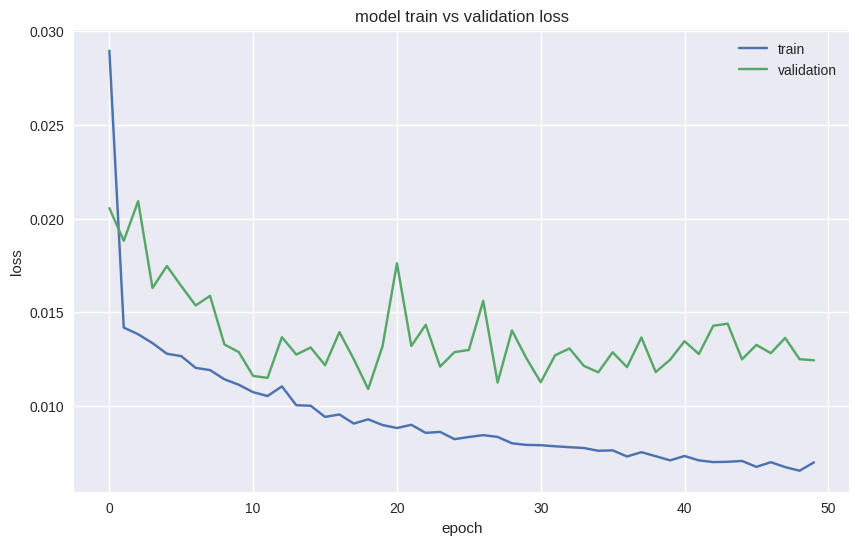

In [170]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_multi_tim.values)
data1 = scaler.transform(df_multi_tim.values)
# split into standard weeks
# train data: 2017-01-03 to 2020-12-28 and test: 2020-12-29 to 2022-08-01 First Tuesday to last Wednesday
train, test = data1[1098:2554],data1[2554:3150]
# restructure into windows of weekly data
train = array(split(train, len(train)/7))
test = array(split(test, len(test)/7))
n_input = 7 # Specify how much data we want to look back for prediction
n_out = 7   # Specify how much multi-step data we want to forecast
def to_supervised(train, n_input, n_out=7):
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
      # define the end of the input sequence
      in_end = in_start + n_input
      out_end = in_end + n_out
      # ensure we have enough data for this instance
      if out_end <= len(data):
        X.append(data[in_start:in_end, :])
        y.append(data[in_end:out_end, 0])
      # move along one time step
      in_start += 1
    return array(X), array(y)
# here the data is split to train_x which holds data with 2 features and train_y holds data with 1 feature and is the Y value (future values of demand)
test_x, test_y = to_supervised(test, n_input)
train_x, train_y = to_supervised(train, n_input)
# define parameters
verbose, epochs, batch_size = 0, 50, 16
# timesteps = 7, features = 2 , outputs = 7
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# reshape output into [samples, timesteps, features]
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
# define model
# Encoder-Decoder LSTM
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(200, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay = 1e-6)
#opt = 'sgd'
model.compile(loss='mse', optimizer=opt)
# fit network
history = model.fit(train_x, train_y,  epochs=epochs, validation_data = (test_x, test_y), batch_size=batch_size, verbose=verbose)
#mod = build_model(train, n_input)
loss = history.history.get('loss')
accuracy = history.history.get('accuracy')
plt.figure(figsize=(10,6))
# plot train and validation loss
pyplot.plot(loss)
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

**Predict future demand using only its past data, this is the univariate case**

Run Model

RMSE: [538.033] 407.9, 480.3, 533.5, 549.5, 511.9, 640.6, 608.5


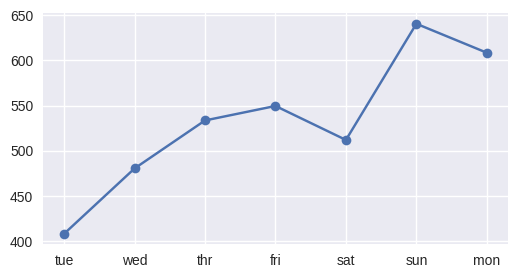

MAE: [414.693] 322.9, 384.1, 401.0, 412.6, 393.9, 496.4, 492.0


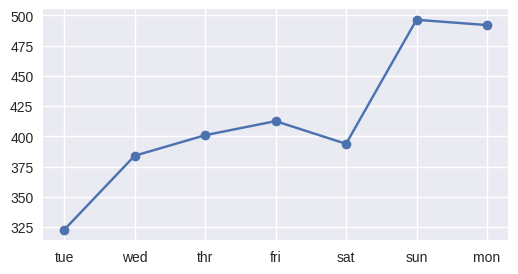

MAPE: [0.055] 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1


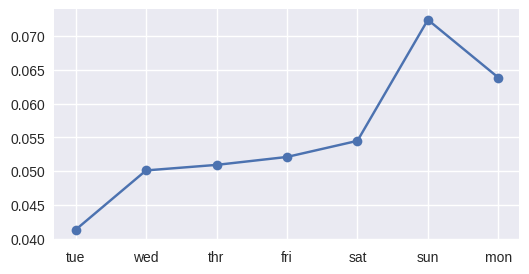

R2: [0.581] 0.8, 0.6, 0.5, 0.5, 0.5, 0.3, 0.4


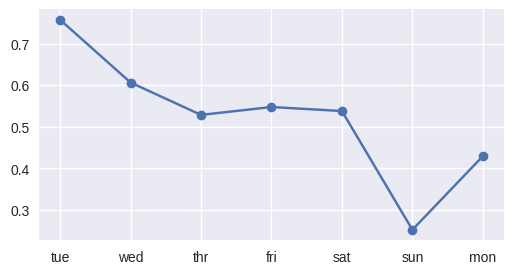

[array([8243.185, 8452.916, 8614.068, 8645.162, 8544.524, 8397.18 ,
       8286.959], dtype=float32)]


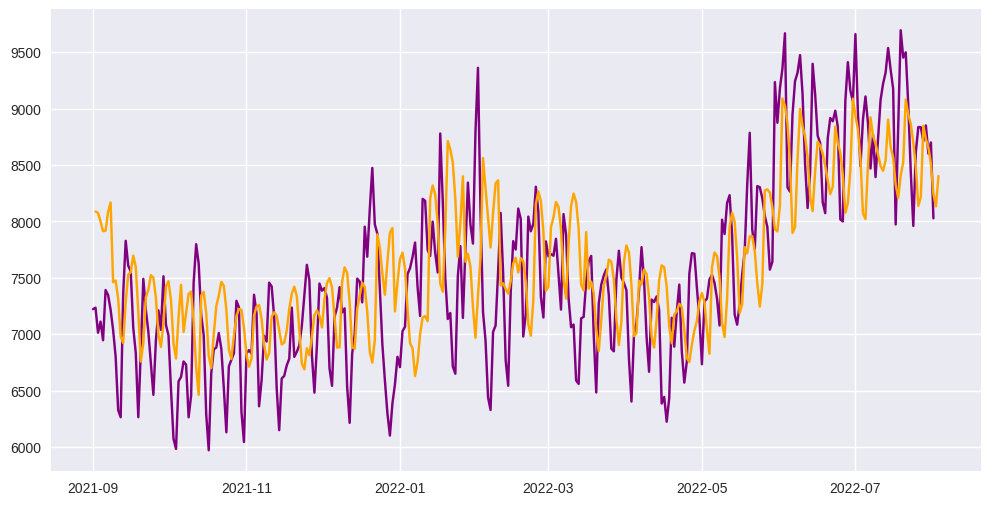

In [171]:
learning(df_uni)

Plot training and validation loss

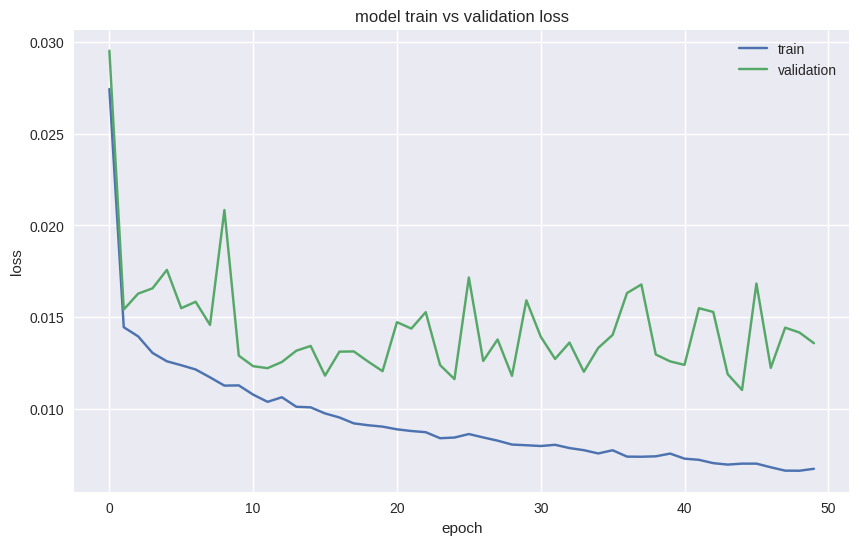

In [172]:
# here the data is split to train_x which holds data with 2 features and train_y holds data with 1 feature and is the Y value (future values of demand)
test_x, test_y = to_supervised(test, n_input)
train_x, train_y = to_supervised(train, n_input)
# define parameters
verbose, epochs, batch_size = 0, 50, 16
# timesteps = 7, features = 2 , outputs = 7
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# reshape output into [samples, timesteps, features]
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
# define model
# Encoder-Decoder LSTM
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(200, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay = 1e-6)
#opt = 'sgd'
model.compile(loss='mse', optimizer=opt)
# fit network
history = model.fit(train_x, train_y,  epochs=epochs, validation_data = (test_x, test_y), batch_size=batch_size, verbose=verbose)
#mod = build_model(train, n_input)
loss = history.history.get('loss')
accuracy = history.history.get('accuracy')
plt.figure(figsize=(10,6))
# plot train and validation loss
pyplot.plot(loss)
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

**LSTM Model Accuracy**

In [173]:
df_multi_all_forRMSE = all.reset_index()
df_multi_all_forRMSE['DATETIME'] = pd.to_datetime(df_multi_all_forRMSE['DATETIME'])
df_multi_all_forRMSE = df_multi_all_forRMSE[(df_multi_all_forRMSE['DATETIME'] >= '2020-12-29') & (df_multi_all_forRMSE['DATETIME'] <= '2022-08-01')]
df_multi_all_forRMSE['yhatmy'] = np.square(df_multi_all_forRMSE['FORECASTDEMAND'] - df_multi_all_forRMSE['TOTALDEMAND'])
np.sqrt(np.sum(df_multi_all_forRMSE['yhatmy'])/len(df_multi_all_forRMSE))

<ipython-input-173-237ea95a7eaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_all_forRMSE['yhatmy'] = np.square(df_multi_all_forRMSE['FORECASTDEMAND'] - df_multi_all_forRMSE['TOTALDEMAND'])


147.8142692776006

In [174]:
lstm =pd.read_csv( r'/content/drive/MyDrive/DS Project/Data/lstm.csv')
lstm['Date'] = pd.to_datetime(lstm['DATETIME'],format='%Y-%m-%d').dt.date
lstm['Date'] = pd.to_datetime(lstm['Date'],format='%Y-%m-%d')

DATETIME            object
PREDICTEDDEMAND    float64
dtype: object

In [175]:
lstm.dtypes

DATETIME                   object
PREDICTEDDEMAND           float64
Date               datetime64[ns]
dtype: object

In [176]:
lstm.shape

(336, 3)

In [177]:
lstm = lstm.head(334)
lstm.tail()

DATETIME  PREDICTEDDEMAND       Date
329  2022-07-28         9200.765 2022-07-28
330  2022-07-29         9161.892 2022-07-29
331  2022-07-30         9075.591 2022-07-30
332  2022-07-31         8826.536 2022-07-31
333  2022-08-01         8514.436 2022-08-01

In [178]:
dlst=df.groupby('Date')[['TOTALDEMAND']].mean().reset_index()
dlst.shape

(4564, 2)

In [179]:
me = pd.merge(dlst,lstm, on='Date')
me.shape

(327, 4)

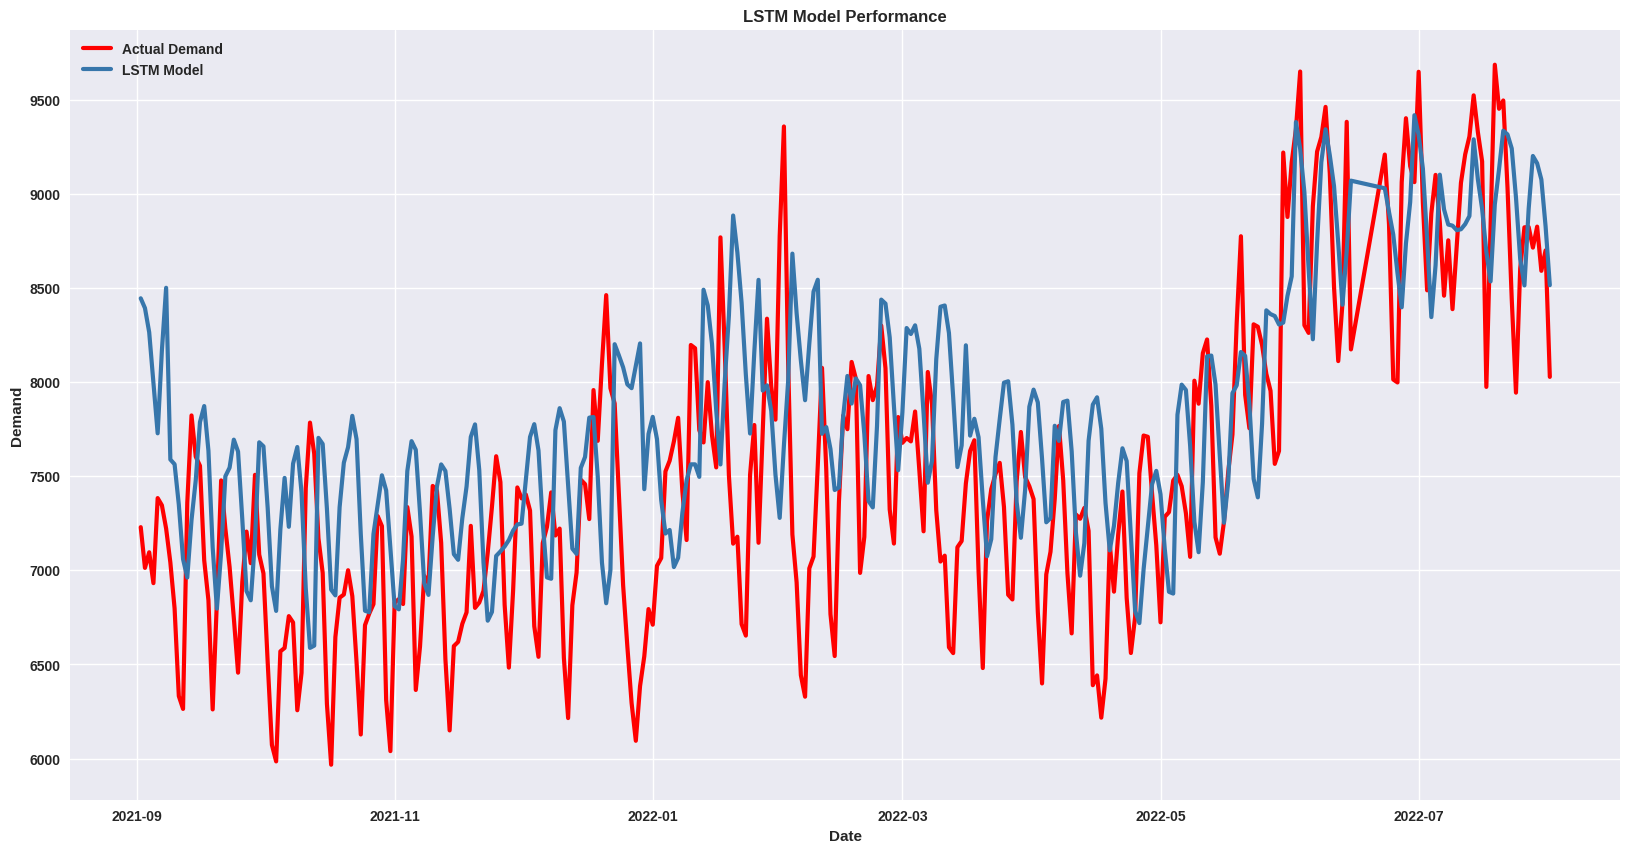

In [180]:
plt.figure(figsize=(20, 10))
plt.plot(me['Date'], me['TOTALDEMAND'], label = "Actual Demand", color = 'r', linewidth = 3)
plt.plot(me['Date'], me['PREDICTEDDEMAND'], label = "LSTM Model", color = '#3776ab', linewidth = 3)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('LSTM Model Performance',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()

**LSTM Model Accuracy**

In [181]:
s = np.sqrt(abs(mean_squared_error(me['TOTALDEMAND'],me['PREDICTEDDEMAND'])))
f = mean_absolute_error(me['TOTALDEMAND'],me['PREDICTEDDEMAND'])
r = r2_score(me['TOTALDEMAND'],me['PREDICTEDDEMAND'])
m = (mean_absolute_percentage_error(me['TOTALDEMAND'],me['PREDICTEDDEMAND']))*100
print('RMSE:',s)
print('MAE',f)
print('MAPE',m)
print('R2',r)

RMSE: 726.1275576646766
MAE 588.8068233570963
MAPE 8.18500118547087
R2 0.24924520925324467


**FUTURE DEMAND PREDICTION**

In [182]:
df22['Date'] = pd.to_datetime(df22['Date'],format='%Y-%m-%d')
from pandas.tseries.offsets import DateOffset
pred_date=[df22.iloc[-1,0]+ DateOffset(days=x)for x in range(0,8)]

In [183]:
pdf=pd.DataFrame(index=pred_date[1:],columns=df22.columns).reset_index()
del pdf['Date']
pdf = pdf.rename(columns={'index': 'Date'})
pdf["TEMPERATURE"] = [19.7,24,21.4,22.8,19.5,18.8,18.4]
pdf['Date'] = pd.to_datetime(pdf['Date'],format='%Y-%m-%d')
df22=pd.concat([df22,pdf])
df22 = df22.reset_index()
del df22['index']
df22['Date'] = pd.to_datetime(df22['Date'],format='%Y-%m-%d')
df22.tail(10)

Date  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  No R Predict  \
355 2022-07-30     8630.231246  8590.743125        8.725   8567.175478   
356 2022-07-31     8543.443221  8699.208125       10.525   8441.288380   
357 2022-08-01     8231.479437  8027.280000       12.100   9012.864544   
358 2022-08-02             NaN          NaN       19.700           NaN   
359 2022-08-03             NaN          NaN       24.000           NaN   
360 2022-08-04             NaN          NaN       21.400           NaN   
361 2022-08-05             NaN          NaN       22.800           NaN   
362 2022-08-06             NaN          NaN       19.500           NaN   
363 2022-08-07             NaN          NaN       18.800           NaN   
364 2022-08-08             NaN          NaN       18.400           NaN   

     With R Predict  
355     8412.938074  
356     8229.996305  
357     9036.704209  
358             NaN  
359             NaN  
360             NaN  
361             NaN  
362             NaN  
363             NaN  
364             NaN

In [184]:
x = df22['TEMPERATURE'].tail(7).values
df22['Future'] = model2.predict(start = 357, end = 364, dynamic= True, exog = x)

In [185]:
dfp = df22.tail(7)
dfp["poly"] = yfut
dfp['LSTM'] = [8501.85,8807.668,8985.053,8969.205,8785.387,8511.316,8267.432]
dfp = dfp.drop(['FORECASTDEMAND',	'TOTALDEMAND','No R Predict',	'TEMPERATURE','With R Predict'], axis=1)
dfp

<ipython-input-185-6c87584989c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["poly"] = yfut
<ipython-input-185-6c87584989c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['LSTM'] = [8501.85,8807.668,8985.053,8969.205,8785.387,8511.316,8267.432]


Date       Future         poly      LSTM
358 2022-08-02  8665.566772  6739.871094  8501.850
359 2022-08-03  8438.662718  6696.371094  8807.668
360 2022-08-04  8771.243273  6840.871094  8985.053
361 2022-08-05  8612.580782  6495.371094  8969.205
362 2022-08-06  8347.783787  6470.871094  8785.387
363 2022-08-07  8315.063294  6259.871094  8511.316
364 2022-08-08  8939.931515  6847.996094  8267.432

In [186]:
#dfp.to_csv('/content/drive/MyDrive/DS Project/Data/forecast.csv')
dfp = pd.read_csv(r'/content/drive/MyDrive/DS Project/Data/forecast.csv')

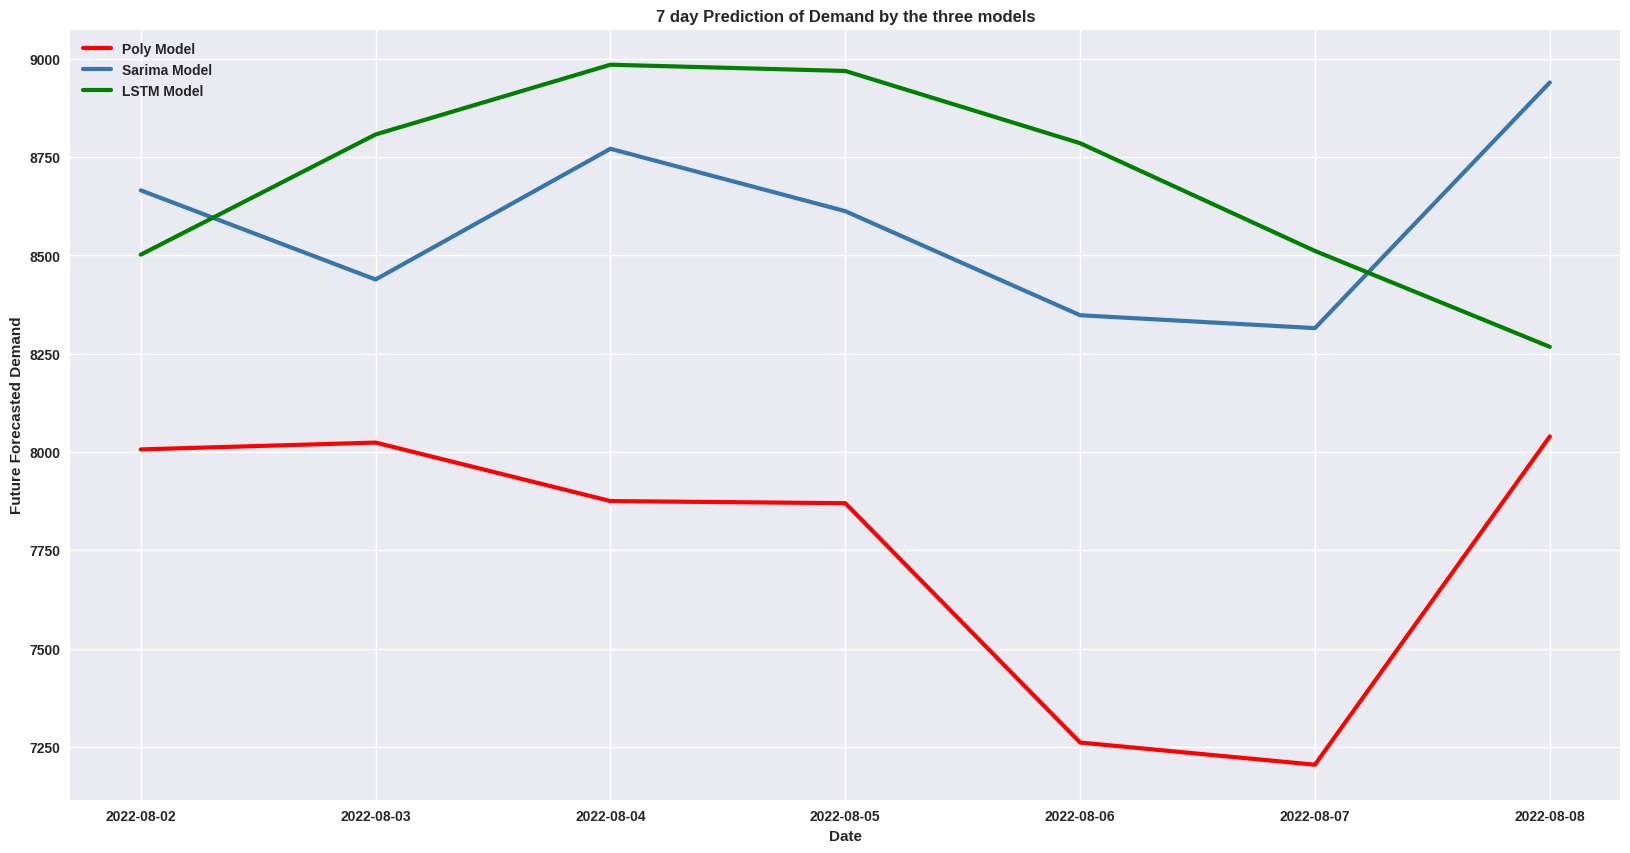

In [187]:
plt.figure(figsize=(20, 10))
plt.plot(dfp['Date'], dfp['poly'], label = "Poly Model", color = 'r', linewidth = 3)
plt.plot(dfp['Date'], dfp['Future'], label = "Sarima Model", color = '#3776ab', linewidth = 3)
plt.plot(dfp['Date'], dfp['LSTM'], label = "LSTM Model", color = 'g', linewidth = 3)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('7 day Prediction of Demand by the three models',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Future Forecasted Demand',fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop = legend_properties)
plt.show()